## PROJECT 4: ENSEMBLE TECHNIQUES BAGGING AND BOOSTING - TRAVEL PACKAGE PURCHASE PREDICTION - Sai K (02/11/2023)

### Description

**Background and Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

**Objective**

To predict which customer is more likely to purchase the newly introduced travel package.

**Data Dictionary**

**Customer details:**

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:** 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Importing necessary libraries

**Let's start by importing libraries we need.**

In [1]:
# Libraries to help with data manipulation, arrays and analysis
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to tune different models
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats
from sklearn import metrics
from sklearn import tree

# Libraries for diferent metric scores for regression
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer,precision_recall_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Libraries for diferent metric scores for classifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Libraries for confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

# Libraries to build models for classifier - Bagging technique  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries to build models for classifier - Boosting technique
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Libraries to build models for regression - Bagging Technique
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor 

# Libraries to build models for regression - Boosting Technique
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.float_format", lambda x: "%.3f" % x)  # to restrict the float value to 3 decimal places
pd.set_option("display.max_columns", None)  # Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_rows", 200)  # pd.set_option('display.max_rows', None)

### Reading the dataset

In [2]:
tourism = pd.read_excel("C:/Users/OneDrive/Desktop/Python/5_ensemble_techniques/project/tourism.xlsx")
data = tourism.copy()

### Overview of the dataset

**View the first 5 rows of the dataset**

In [3]:
data.head()

CustomerID  ProdTaken    Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1 41.000     Self Enquiry         3            6.000   
1      200001          0 49.000  Company Invited         1           14.000   
2      200002          1 37.000     Self Enquiry         1            8.000   
3      200003          0 33.000  Company Invited         1            9.000   
4      200004          0    NaN     Self Enquiry         1            8.000   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3              3.000   
1        Salaried    Male                       3              4.000   
2     Free Lancer    Male                       3              4.000   
3        Salaried  Female                       2              3.000   
4  Small Business    Male                       2              3.000   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                  3.000        Single          1.000   
1         Deluxe                  4.000      Divorced          2.000   
2          Basic                  3.000        Single          7.000   
3          Basic                  3.000      Divorced          2.000   
4          Basic                  4.000      Divorced          1.000   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                     0.000   
1         0                       3       1                     2.000   
2         1                       3       0                     0.000   
3         1                       5       1                     1.000   
4         0                       5       1                     0.000   

  Designation  MonthlyIncome  
0     Manager      20993.000  
1     Manager      20130.000  
2   Executive      17090.000  
3   Executive      17909.000  
4   Executive      18468.000

In [4]:
data.tail()

CustomerID  ProdTaken    Age    TypeofContact  CityTier  \
4883      204883          1 49.000     Self Enquiry         3   
4884      204884          1 28.000  Company Invited         1   
4885      204885          1 52.000     Self Enquiry         3   
4886      204886          1 19.000     Self Enquiry         3   
4887      204887          1 36.000     Self Enquiry         1   

      DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
4883            9.000  Small Business    Male                       3   
4884           31.000        Salaried    Male                       4   
4885           17.000        Salaried  Female                       4   
4886           16.000  Small Business    Male                       3   
4887           14.000        Salaried    Male                       4   

      NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
4883              5.000         Deluxe                  4.000     Unmarried   
4884              5.000          Basic                  3.000        Single   
4885              4.000       Standard                  4.000       Married   
4886              4.000          Basic                  3.000        Single   
4887              4.000          Basic                  4.000     Unmarried   

      NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
4883          2.000         1                       1       1   
4884          3.000         1                       3       1   
4885          7.000         0                       1       1   
4886          3.000         0                       5       0   
4887          3.000         1                       3       1   

      NumberOfChildrenVisiting     Designation  MonthlyIncome  
4883                     1.000         Manager      26576.000  
4884                     2.000       Executive      21212.000  
4885                     3.000  Senior Manager      31820.000  
4886                     2.000       Executive      20289.000  
4887                     2.000       Executive      24041.000

In [5]:
np.random.seed(1)
data.sample(n=10)

CustomerID  ProdTaken    Age    TypeofContact  CityTier  \
3015      203015          0 27.000  Company Invited         1   
1242      201242          0 40.000     Self Enquiry         3   
3073      203073          0 29.000     Self Enquiry         2   
804       200804          0 48.000  Company Invited         1   
3339      203339          0 32.000     Self Enquiry         1   
3080      203080          1 36.000  Company Invited         1   
2851      202851          0 46.000     Self Enquiry         1   
2883      202883          1 32.000  Company Invited         1   
1676      201676          0 22.000     Self Enquiry         1   
1140      201140          0 44.000     Self Enquiry         1   

      DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
3015            7.000        Salaried  Female                       4   
1242           13.000  Small Business    Male                       2   
3073           15.000  Small Business    Male                       4   
804             6.000  Small Business    Male                       2   
3339           18.000  Small Business    Male                       4   
3080           32.000        Salaried  Female                       4   
2851           17.000        Salaried    Male                       4   
2883           27.000        Salaried    Male                       4   
1676           11.000        Salaried    Male                       2   
1140           13.000  Small Business  Female                       2   

      NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
3015              6.000          Basic                  3.000       Married   
1242              3.000           King                  4.000        Single   
3073              5.000          Basic                  3.000       Married   
804               1.000   Super Deluxe                  3.000        Single   
3339              4.000         Deluxe                  5.000      Divorced   
3080              4.000          Basic                  4.000       Married   
2851              4.000          Basic                  3.000      Divorced   
2883              4.000       Standard                  3.000      Divorced   
1676              1.000          Basic                  4.000       Married   
1140              3.000           King                  3.000       Married   

      NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
3015          5.000         0                       4       1   
1242          2.000         0                       4       1   
3073          3.000         0                       2       0   
804           3.000         0                       2       0   
3339          3.000         1                       2       0   
3080          3.000         1                       3       0   
2851          5.000         0                       5       1   
2883          5.000         0                       3       1   
1676          2.000         1                       4       1   
1140          1.000         1                       4       1   

      NumberOfChildrenVisiting     Designation  MonthlyIncome  
3015                     3.000       Executive      23042.000  
1242                       NaN              VP      34833.000  
3073                     2.000       Executive      23614.000  
804                      0.000             AVP      31885.000  
3339                     3.000         Manager      25511.000  
3080                     1.000       Executive      20700.000  
2851                     1.000       Executive      21332.000  
2883                     1.000  Senior Manager      28502.000  
1676                     0.000       Executive      17328.000  
1140                     1.000              VP      34049.000

In [6]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the data set.")

There are 4888 rows and 20 columns in the data set.


In [7]:
data.drop(["CustomerID"], axis=1, inplace=True)

**Missing values**

In [8]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

**Duplicated values**

In [9]:
data.duplicated().sum()

141

In [10]:
data[data.duplicated()].count()

ProdTaken                   141
Age                         131
TypeofContact               141
CityTier                    141
DurationOfPitch             136
Occupation                  141
Gender                      141
NumberOfPersonVisiting      141
NumberOfFollowups           140
ProductPitched              141
PreferredPropertyStar       141
MaritalStatus               141
NumberOfTrips               139
Passport                    141
PitchSatisfactionScore      141
OwnCar                      141
NumberOfChildrenVisiting    135
Designation                 141
MonthlyIncome               132
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4747 non-null   int64  
 1   Age                       4531 non-null   float64
 2   TypeofContact             4722 non-null   object 
 3   CityTier                  4747 non-null   int64  
 4   DurationOfPitch           4501 non-null   float64
 5   Occupation                4747 non-null   object 
 6   Gender                    4747 non-null   object 
 7   NumberOfPersonVisiting    4747 non-null   int64  
 8   NumberOfFollowups         4703 non-null   float64
 9   ProductPitched            4747 non-null   object 
 10  PreferredPropertyStar     4721 non-null   float64
 11  MaritalStatus             4747 non-null   object 
 12  NumberOfTrips             4609 non-null   float64
 13  Passport                  4747 non-null   int64  
 14  PitchSat

**Inferences**

* The target variable is designated as ProdTaken.
* Missing values exist in significant numbers.
* A deficit of 4.77% is noted in the MonthlyIncome data.
* The Age column has a 4.62% shortfall in information.
* Categorical variables include Designation, Martial status, Product Pitched, Gender, Owncar, Passport, CityTier, PreferredPropertyStar, Occupation, and Type of Contact, while the remaining variables are numerical.
* Only less than 3% of data is missing from NumberOfChildrenVisiting, NumberOfFollowups, NumberOfTrips, PreferredPropertyStar, and TypeofContact.
* Further analysis is necessary as the DurationOfPitch column has a 5% deficit in data, potentially due to unfulfilled pitches.

In [13]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation"
]
data[cat_cols] = data[cat_cols].astype("category")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4531 non-null   float64 
 2   TypeofContact             4722 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4501 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4703 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4721 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4609 non-null   float64 
 13  Passport                  4747 non-null   int64 

In [15]:
data.nunique()

ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [16]:
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts(dropna=False))
    print("*" * 50)
    print(data[i].value_counts(1))
    print("*" * 50)

Unique values in TypeofContact are :
Self Enquiry       3350
Company Invited    1372
NaN                  25
Name: TypeofContact, dtype: int64
**************************************************
Self Enquiry      0.709
Company Invited   0.291
Name: TypeofContact, dtype: float64
**************************************************
Unique values in Occupation are :
Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Salaried         0.483
Small Business   0.427
Large Business   0.089
Free Lancer      0.000
Name: Occupation, dtype: float64
**************************************************
Unique values in Gender are :
Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64
**************************************************
Male      0.597
Female    0.373
Fe Male   0.030
Name: Gender, dtype: float64
**************************************************
Uni

**Replacing 'Fe Male' with 'Female'**

In [17]:
data['Gender'] = data['Gender'].replace('Fe Male','Female') 

In [18]:
data['Gender'].value_counts()

Male      2835
Female    1912
Name: Gender, dtype: int64

In [19]:
data.describe().T

count      mean      std      min       25%  \
ProdTaken                4747.000     0.188    0.391    0.000     0.000   
Age                      4531.000    37.586    9.329   18.000    31.000   
CityTier                 4747.000     1.655    0.917    1.000     1.000   
DurationOfPitch          4501.000    15.511    8.536    5.000     9.000   
NumberOfPersonVisiting   4747.000     2.912    0.724    1.000     2.000   
NumberOfFollowups        4703.000     3.705    1.009    1.000     3.000   
PreferredPropertyStar    4721.000     3.583    0.800    3.000     3.000   
NumberOfTrips            4609.000     3.233    1.848    1.000     2.000   
Passport                 4747.000     0.290    0.454    0.000     0.000   
PitchSatisfactionScore   4747.000     3.052    1.370    1.000     2.000   
OwnCar                   4747.000     0.618    0.486    0.000     0.000   
NumberOfChildrenVisiting 4687.000     1.194    0.860    0.000     1.000   
MonthlyIncome            4523.000 23602.239 5385.503 1000.000 20337.000   

                               50%       75%       max  
ProdTaken                    0.000     0.000     1.000  
Age                         36.000    44.000    61.000  
CityTier                     1.000     3.000     3.000  
DurationOfPitch             13.000    20.000   127.000  
NumberOfPersonVisiting       3.000     3.000     5.000  
NumberOfFollowups            4.000     4.000     6.000  
PreferredPropertyStar        3.000     4.000     5.000  
NumberOfTrips                3.000     4.000    22.000  
Passport                     0.000     1.000     1.000  
PitchSatisfactionScore       3.000     4.000     5.000  
OwnCar                       1.000     1.000     1.000  
NumberOfChildrenVisiting     1.000     2.000     3.000  
MonthlyIncome            22311.000 25535.500 98678.000

**Inferences**

* Minimum age of customer is 18 and Maximum age is 61 with mean of 37.
* Mean Duration of pitch is 15 mins to max of 127 mins.
* Mean Number of trips is 3 with maximum of 22.This needs to be verified
* Average monthly income of customer is 23619 with maximum of 98678. This needs to be verified
* 920 customer had taken package last time.

## Exploratory Data Analysis (EDA)

**Functions to carry out the Exploratory Data Analysis**

In [20]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

**ProdTaken**

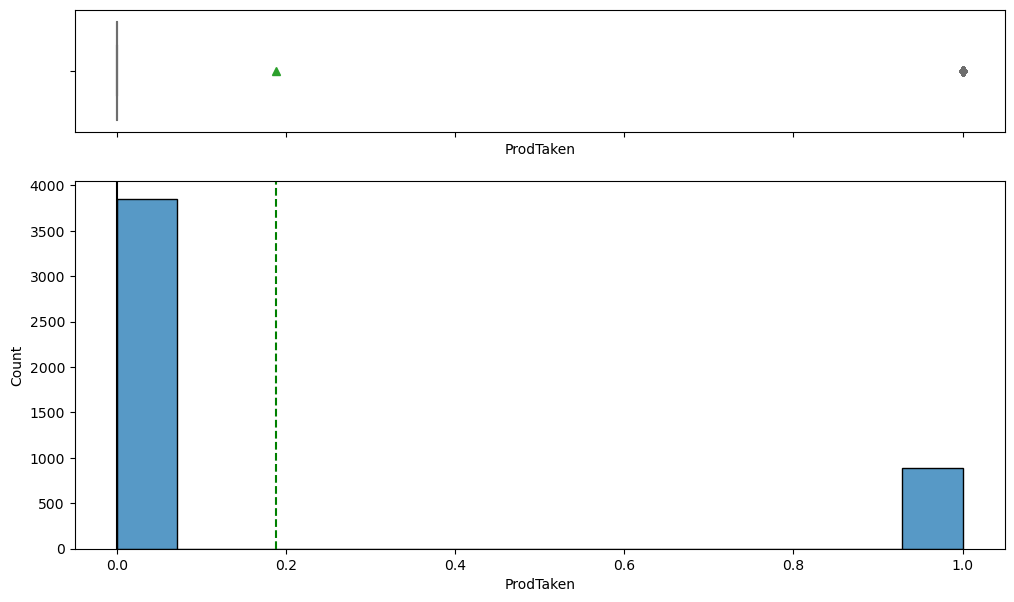

In [24]:
histogram_boxplot(data, "ProdTaken")

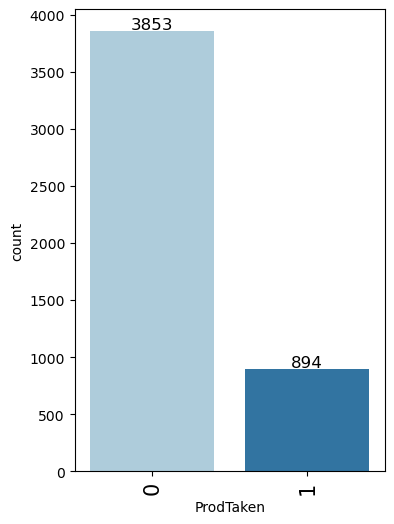

In [25]:
labeled_barplot(data, 'ProdTaken')

**Age**

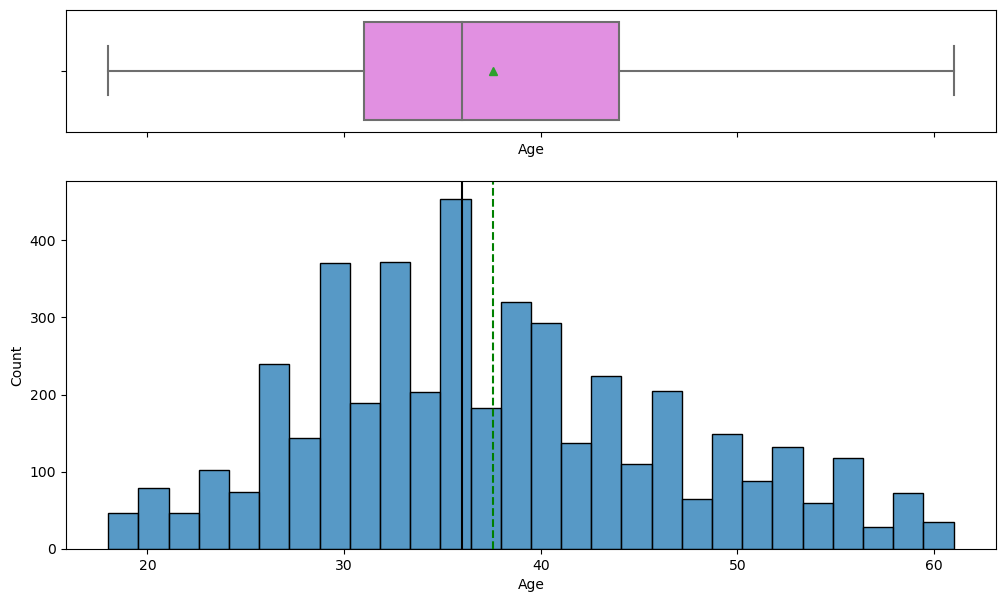

In [26]:
histogram_boxplot(data, "Age")

**Type of Contact**

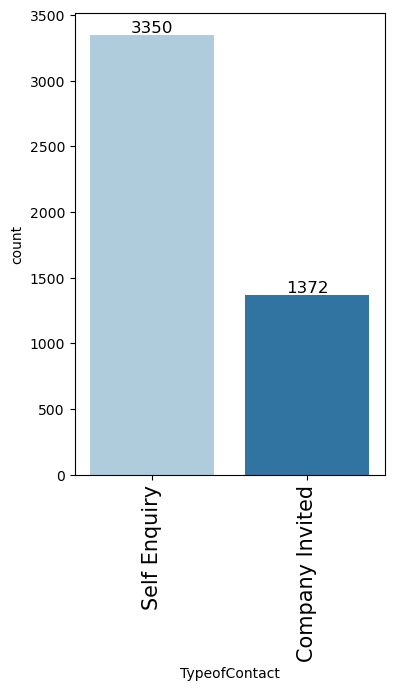

In [27]:
labeled_barplot(data, 'TypeofContact')

**City Tier**

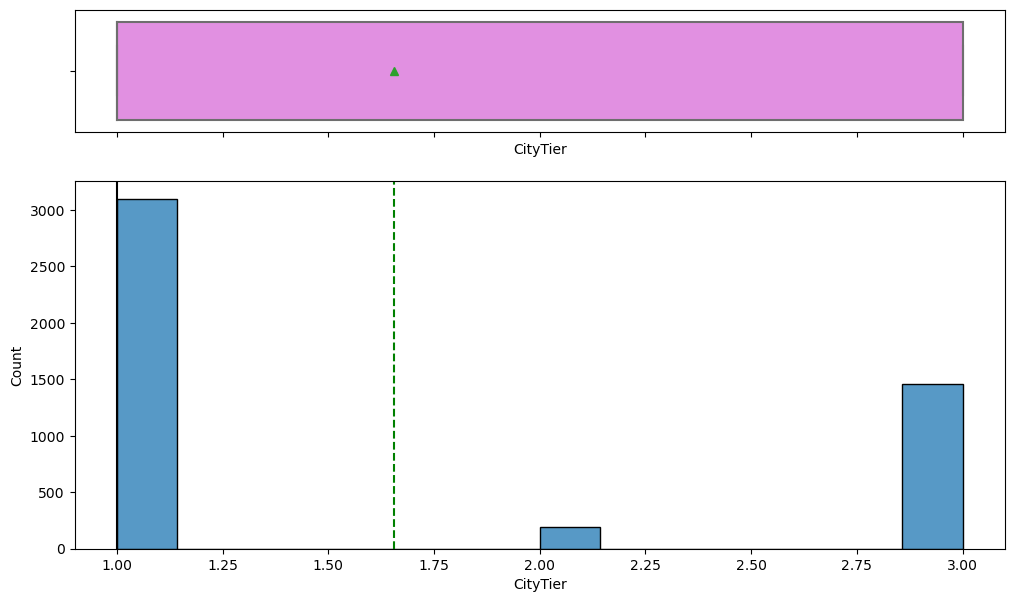

In [28]:
histogram_boxplot(data, "CityTier")

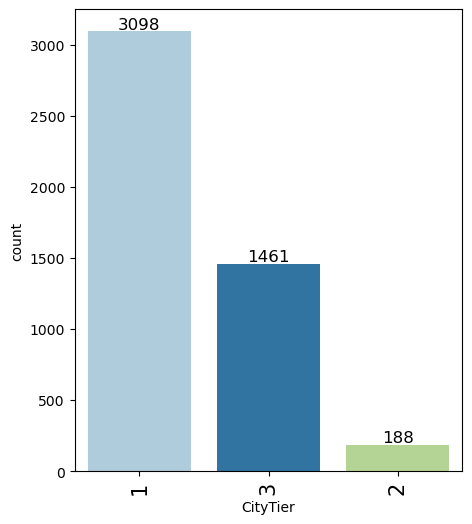

In [29]:
labeled_barplot(data, 'CityTier')

**Duration Of Pitch**

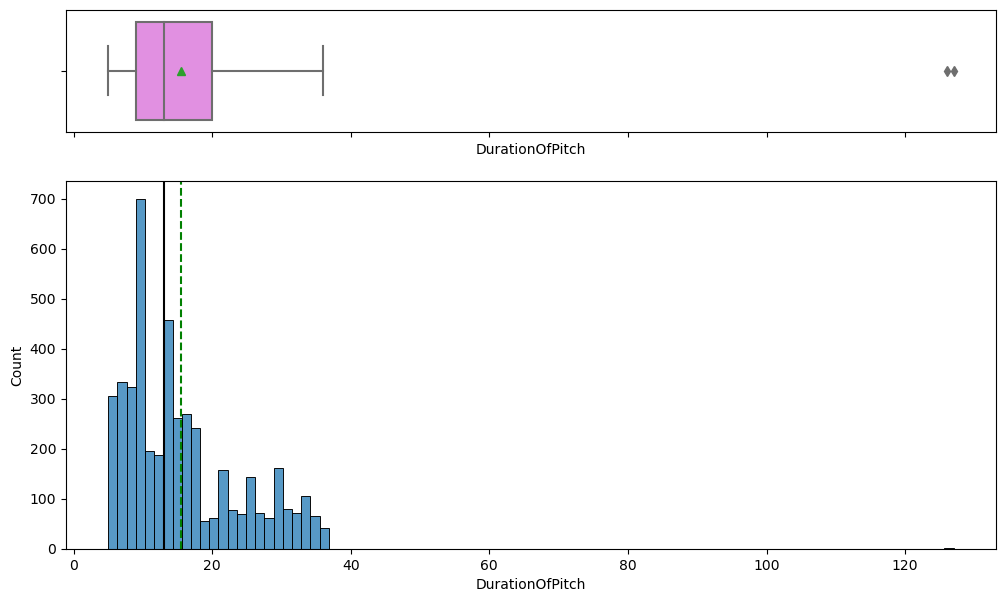

In [30]:
histogram_boxplot(data, "DurationOfPitch")

**Occupation**

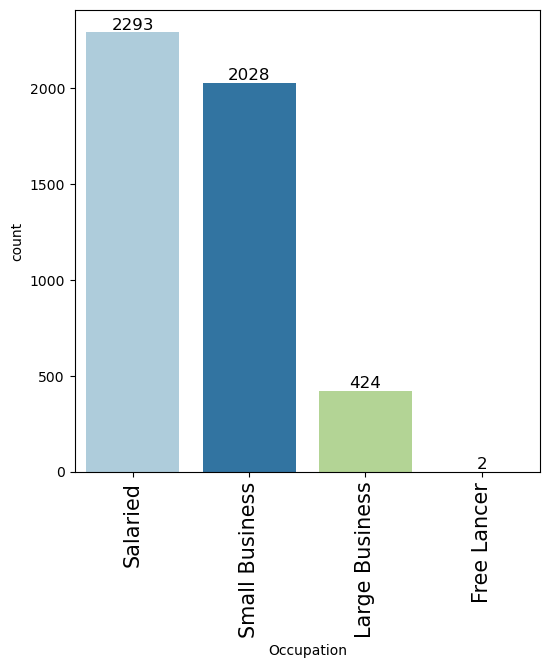

In [31]:
labeled_barplot(data, 'Occupation')

**Gender**

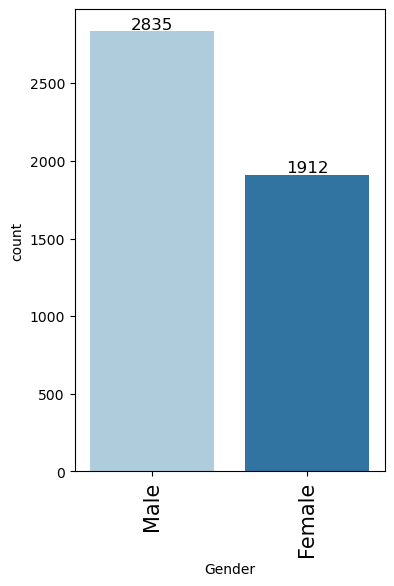

In [32]:
labeled_barplot(data, 'Gender')

**Number Of Person Visiting**

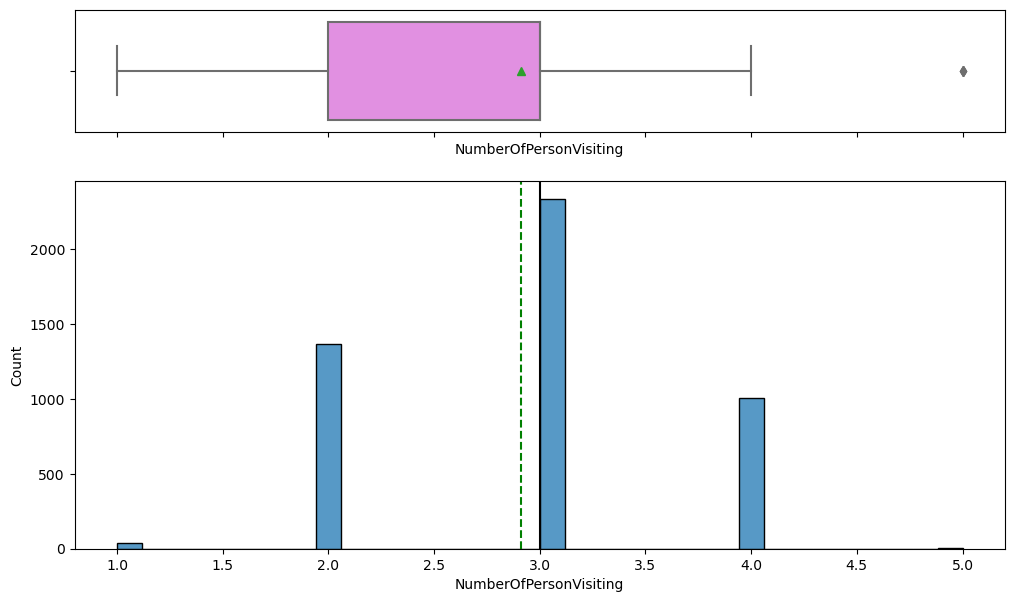

In [33]:
histogram_boxplot(data, "NumberOfPersonVisiting")

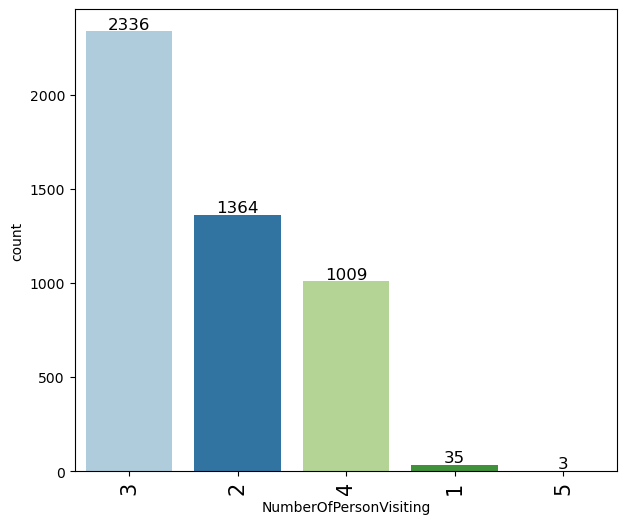

In [34]:
labeled_barplot(data, 'NumberOfPersonVisiting')

**Number Of Followups**

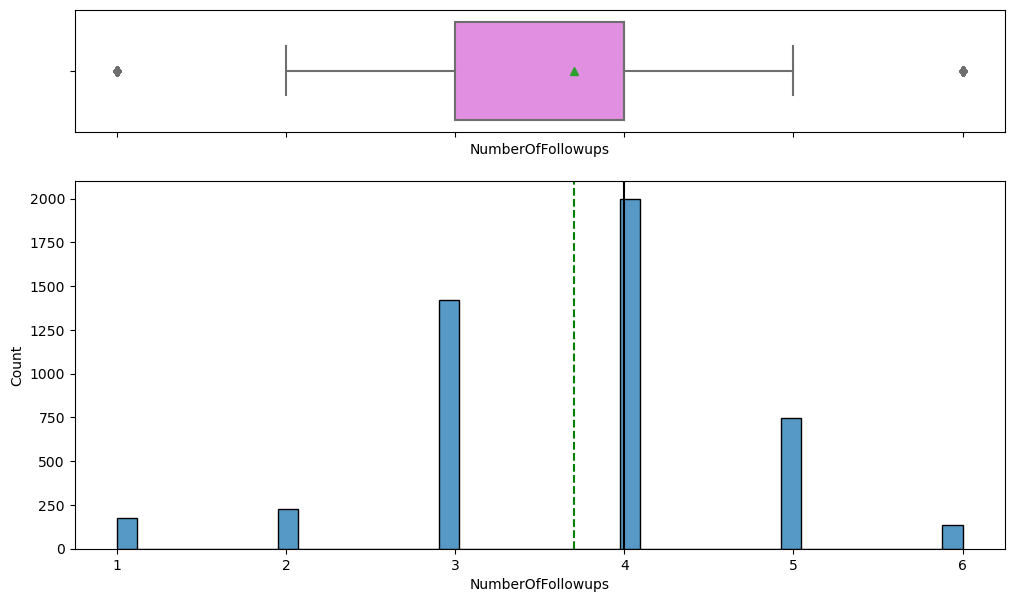

In [35]:
histogram_boxplot(data, "NumberOfFollowups")

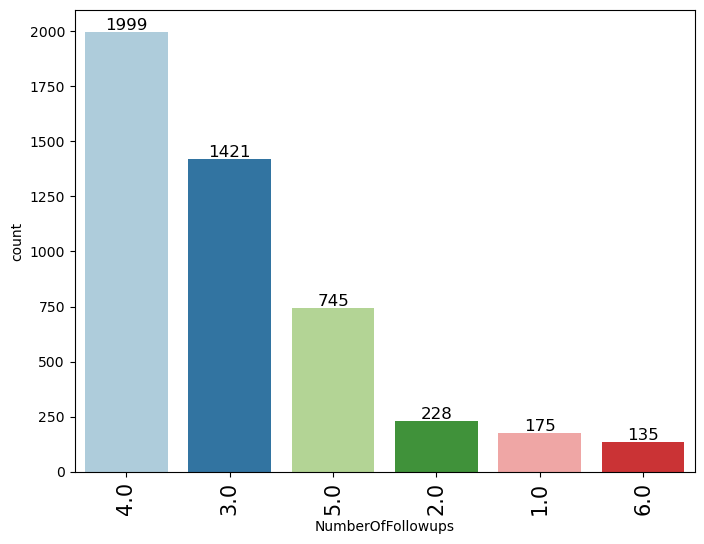

In [36]:
labeled_barplot(data, 'NumberOfFollowups')

**Product Pitched**

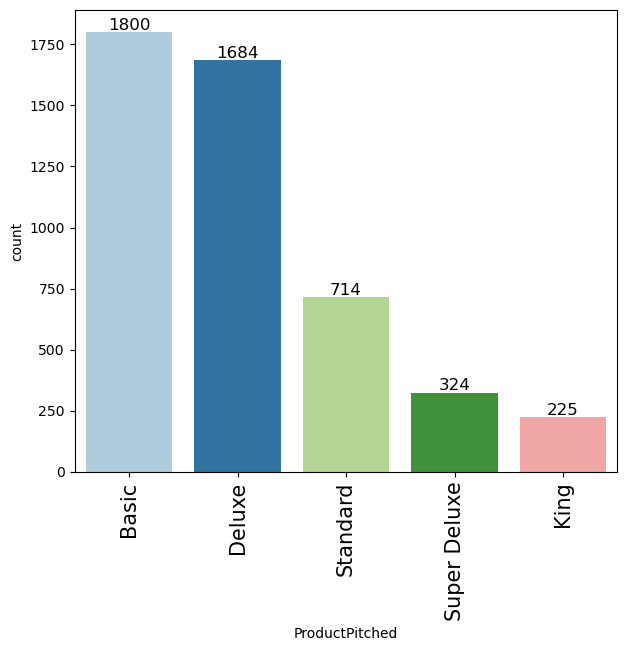

In [37]:
labeled_barplot(data, 'ProductPitched')

**Preferred Property Star**

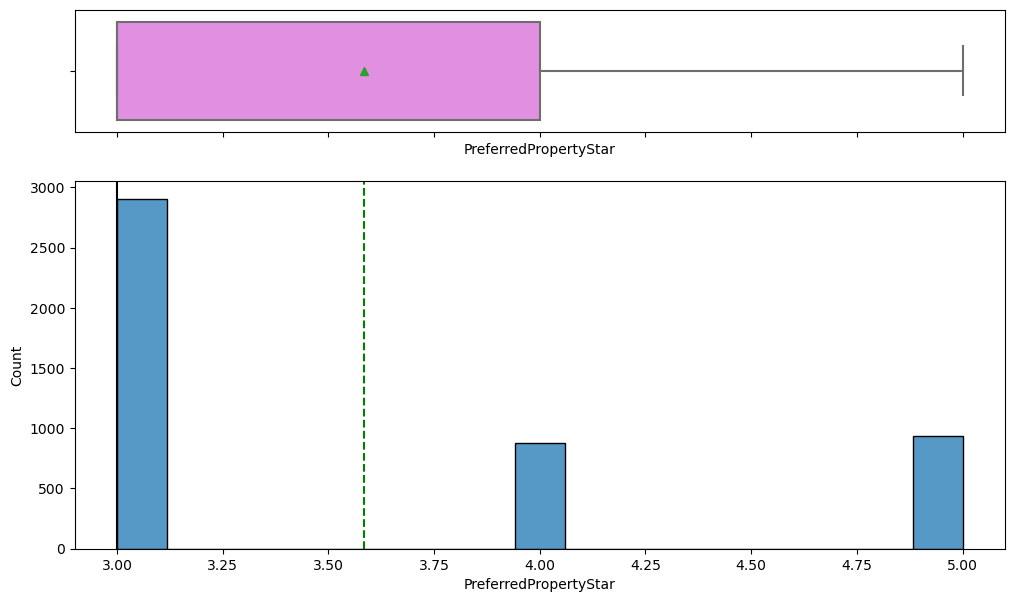

In [38]:
histogram_boxplot(data, "PreferredPropertyStar")

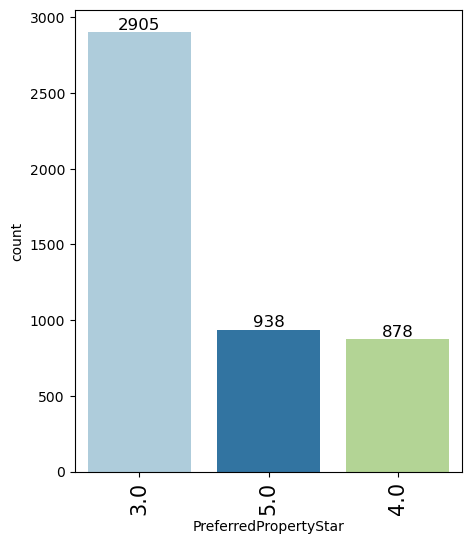

In [39]:
labeled_barplot(data, 'PreferredPropertyStar')

**Marital Status**

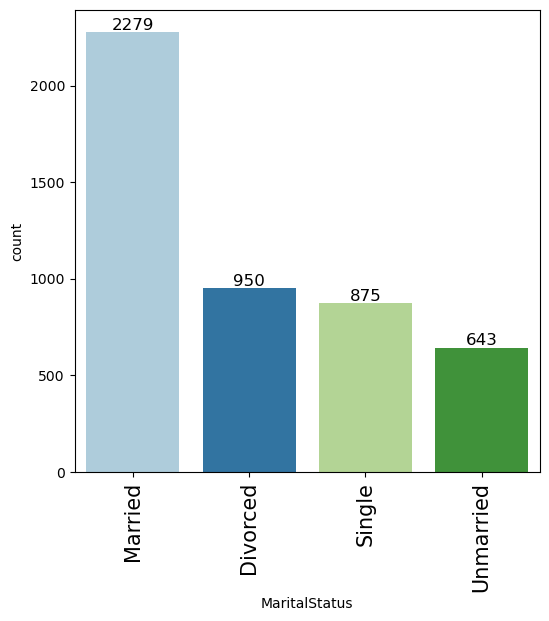

In [40]:
labeled_barplot(data, 'MaritalStatus')

**Number Of Trips**

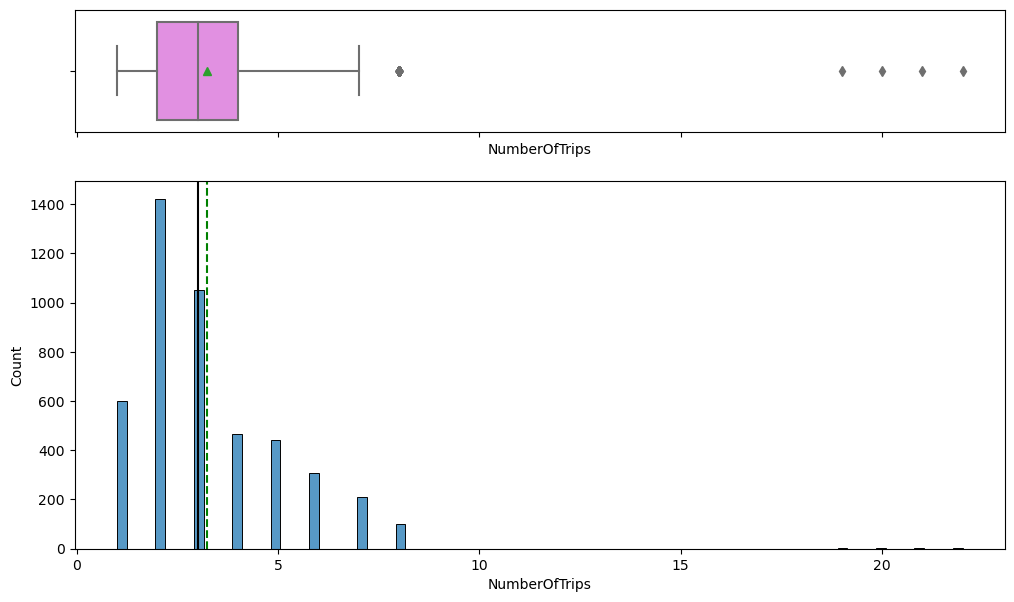

In [41]:
histogram_boxplot(data, "NumberOfTrips")

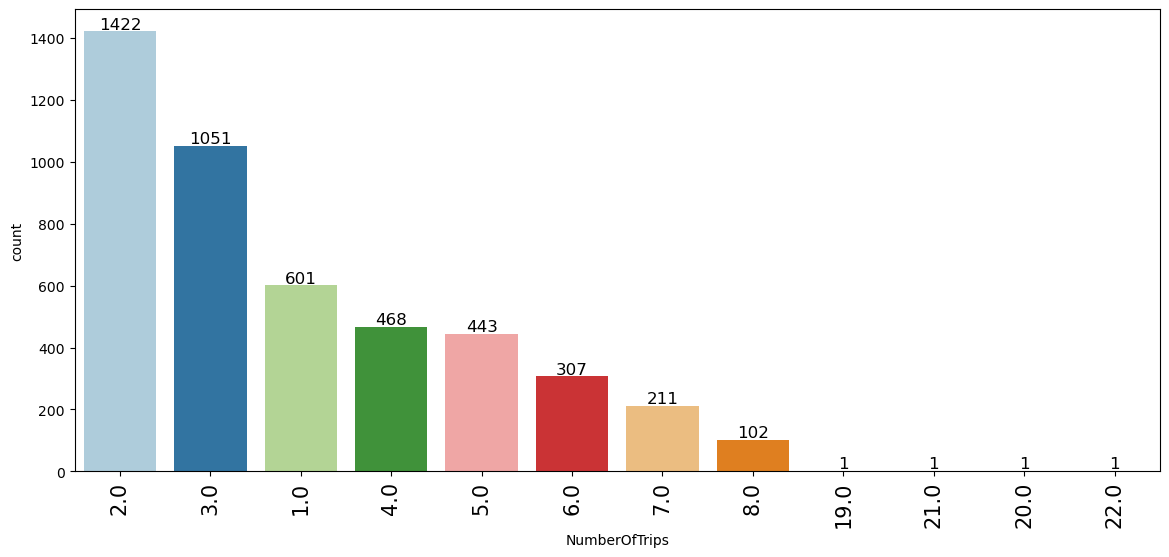

In [42]:
labeled_barplot(data, 'NumberOfTrips')

**Passport**

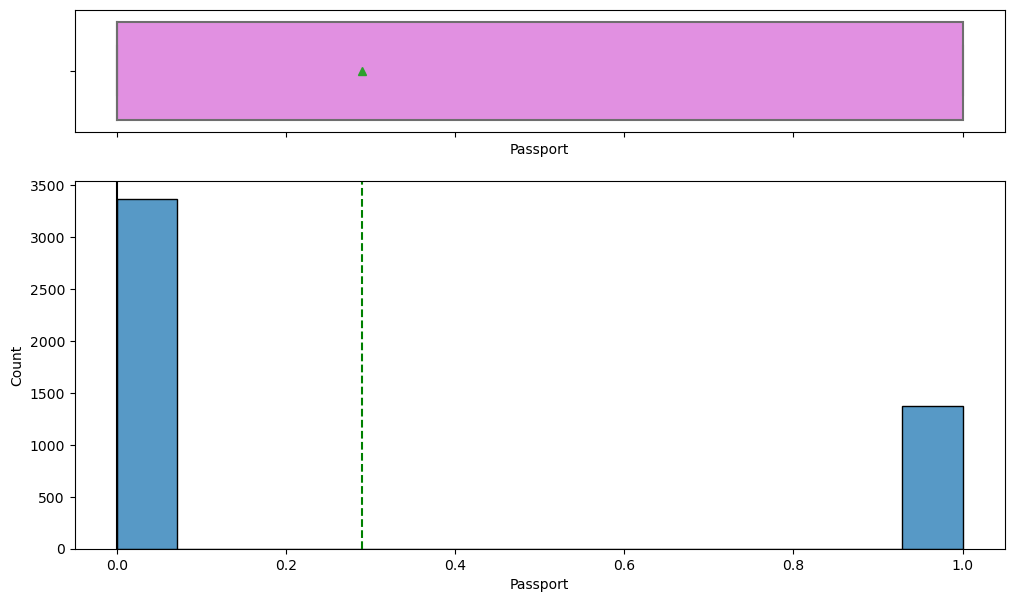

In [43]:
histogram_boxplot(data, "Passport")

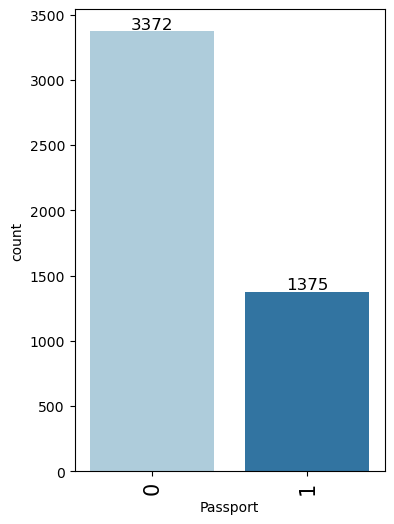

In [44]:
labeled_barplot(data, 'Passport')

**Pitch Satisfaction Score**

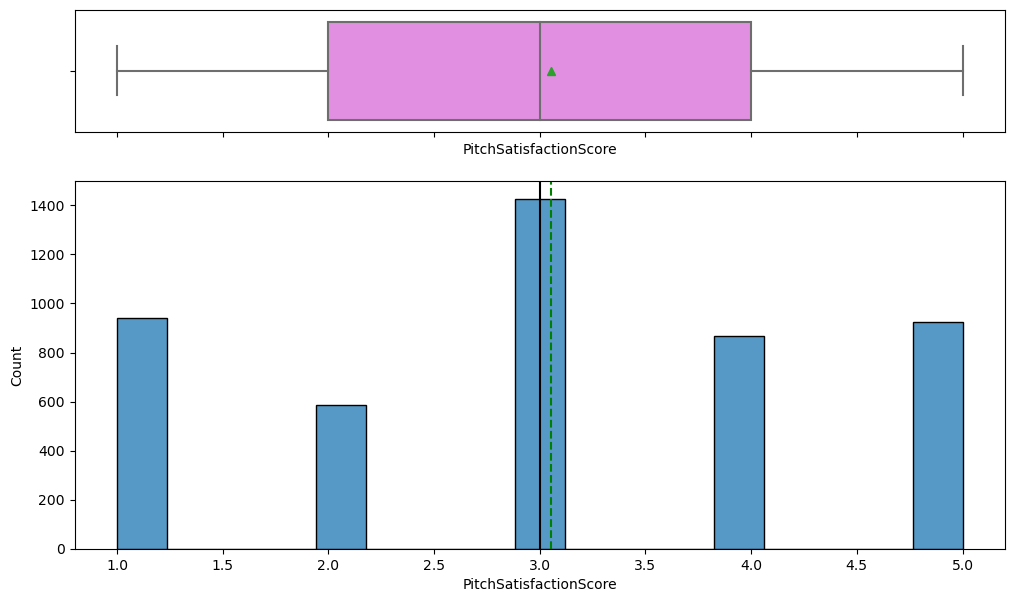

In [45]:
histogram_boxplot(data, "PitchSatisfactionScore")

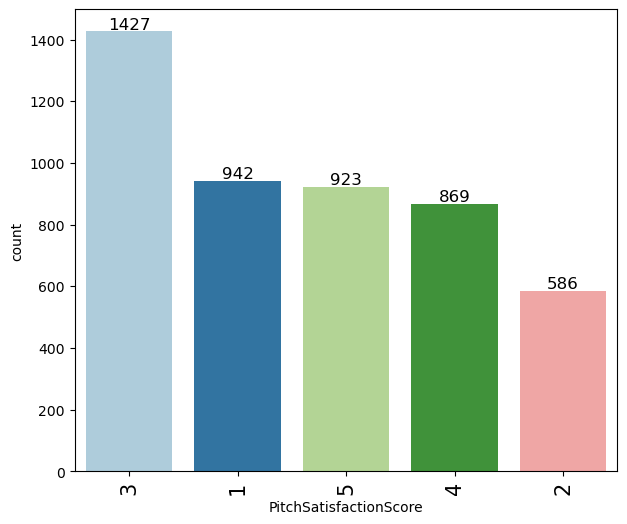

In [46]:
labeled_barplot(data, 'PitchSatisfactionScore')

**Own Car**

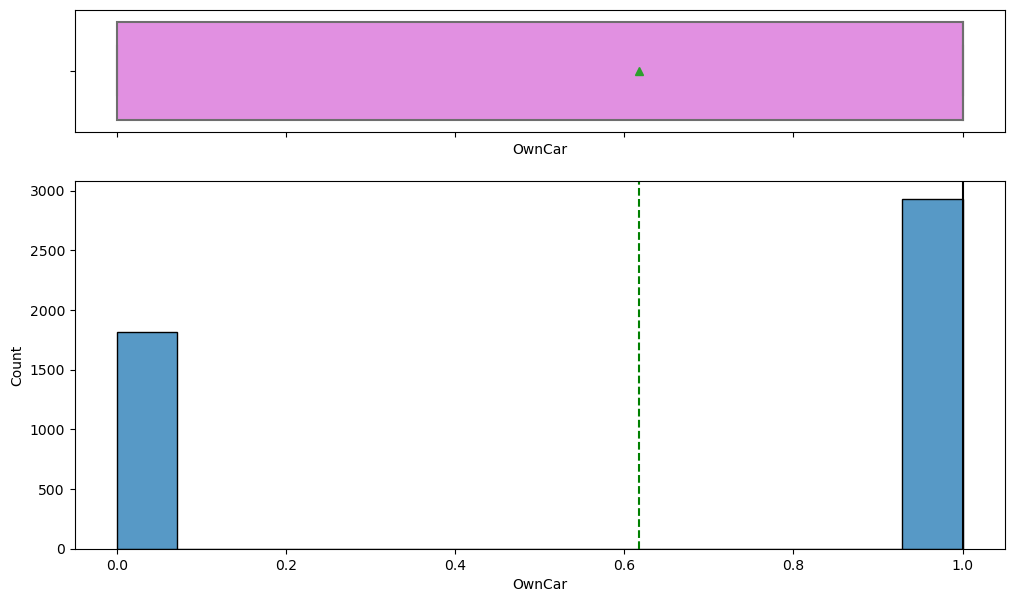

In [47]:
histogram_boxplot(data, "OwnCar")

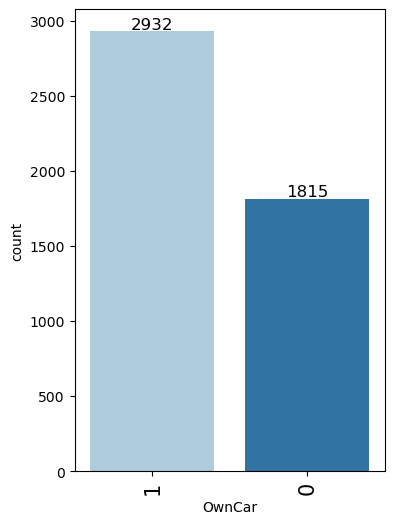

In [48]:
labeled_barplot(data, 'OwnCar')

**Number Of Children Visiting**

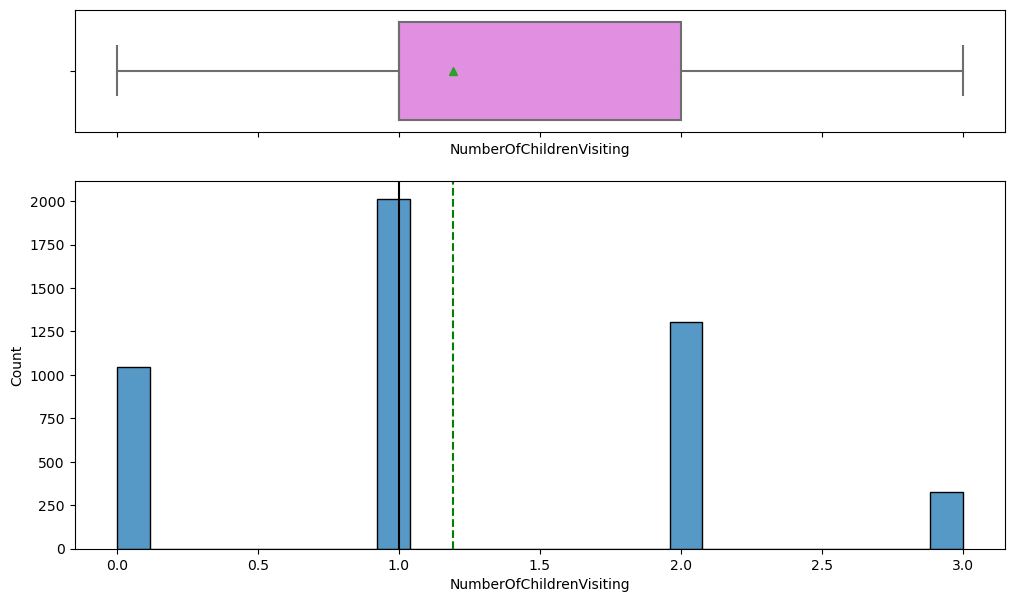

In [49]:
histogram_boxplot(data, "NumberOfChildrenVisiting")

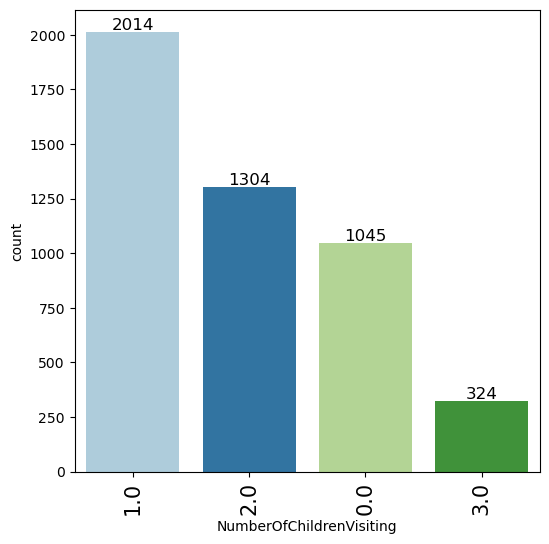

In [50]:
labeled_barplot(data, 'NumberOfChildrenVisiting')

**Designation**

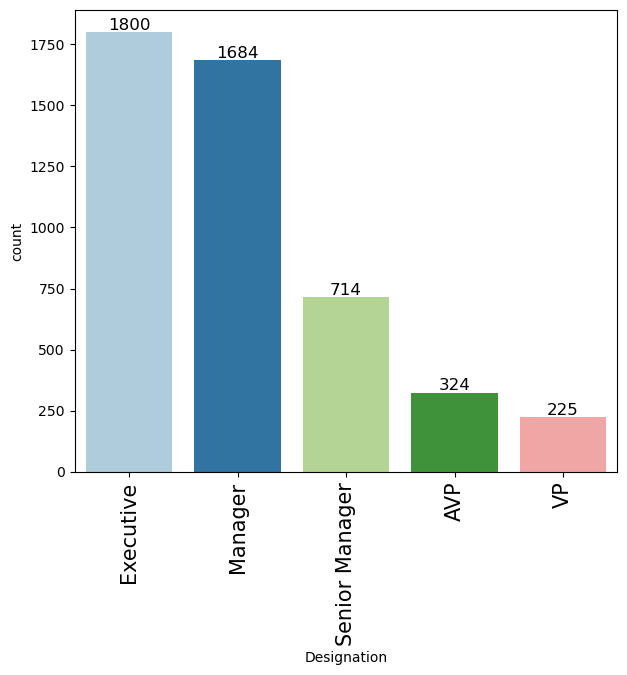

In [51]:
labeled_barplot(data, 'Designation')

**Monthly Income**

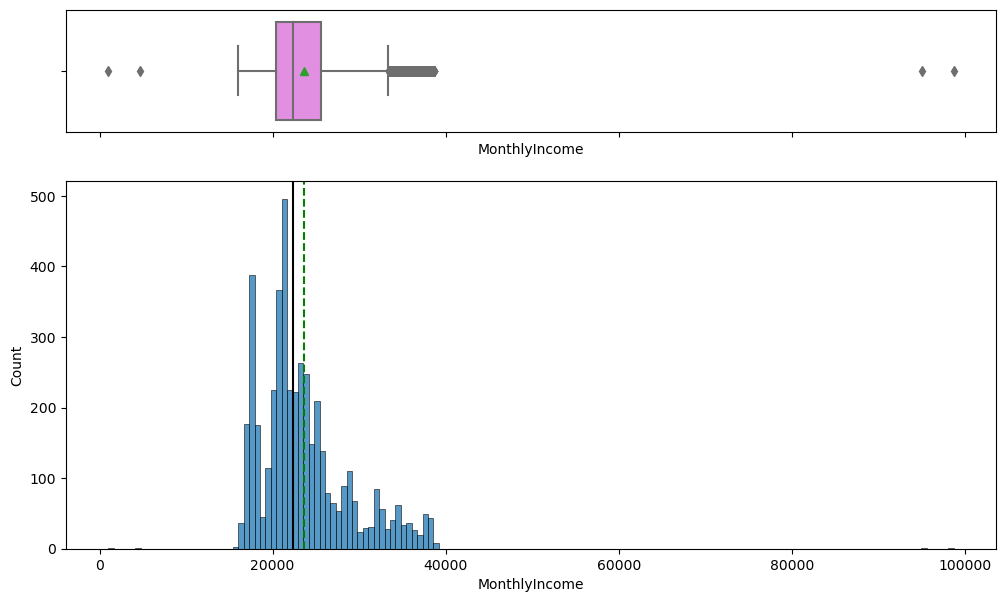

In [52]:
histogram_boxplot(data, "MonthlyIncome")

In [53]:
data[data['MonthlyIncome'] < 20000].value_counts().sum()

740

In [54]:
data['MonthlyIncome'].value_counts().sum()

4523

**Inferences**

* Age is normally distrubted and doesn't have any outliers
* Duration of pitch is Right skewed with some outliers greater than 120 .Need to see if this are to be treated.
* Number of visitors is usually 3 with a outlier of 5.
* Average number of folows up are 4 with extreme of 6
* Number of trips is right skewed with some outliers where trips are greater than 17.
* Monthly income is Right skewed. and has some outlier as higher end.

### Bivariate analysis

**Comparision with ProdTaken**

**Age vs ProdTaken**

ProdTaken     0    1   All
Age                       
All        3679  852  4531
29.0        120   57   177
30.0        146   47   193
31.0        149   40   189
32.0        150   40   190
34.0        164   39   203
33.0        145   37   182
26.0         68   36   104
35.0        199   32   231
27.0        106   29   135
28.0        117   26   143
20.0         13   25    38
36.0        198   25   223
37.0        158   24   182
21.0         18   23    41
41.0        127   23   150
40.0        121   22   143
19.0         11   21    32
25.0         53   20    73
42.0        119   18   137
24.0         38   18    56
51.0         71   17    88
45.0         93   17   110
44.0         83   16    99
22.0         31   15    46
38.0        157   15   172
52.0         54   14    68
39.0        135   13   148
23.0         33   13    46
59.0         30   12    42
56.0         43   12    55
47.0         75   12    87
50.0         72   12    84
46.0        106   11   117
48.0         53   11    64
5

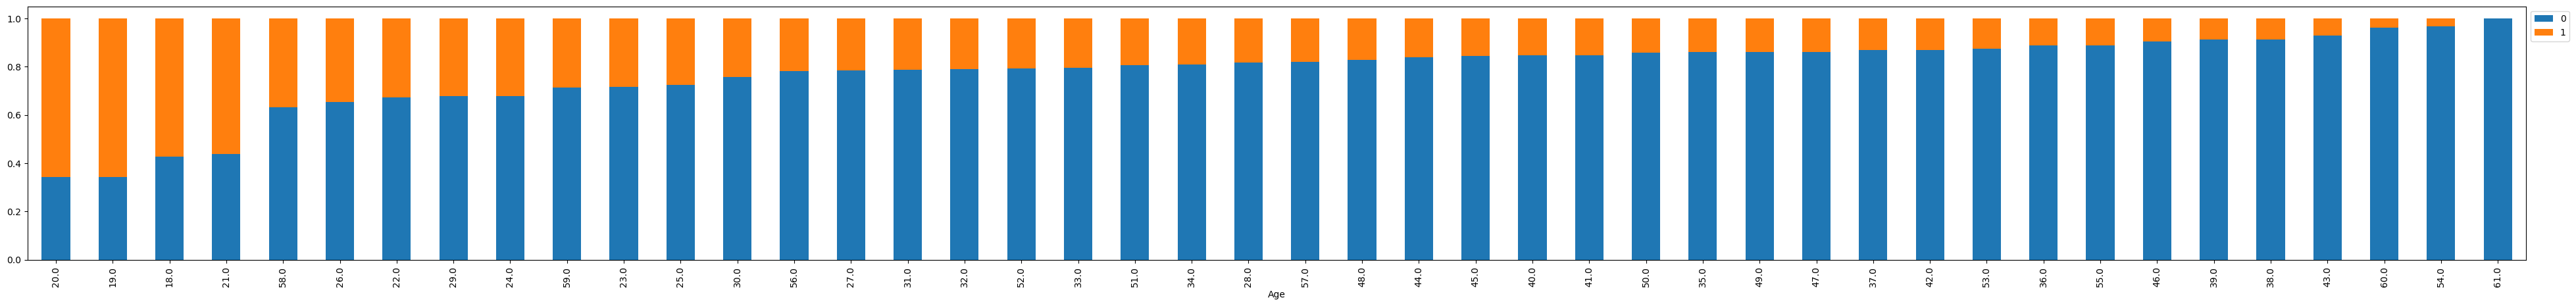

In [55]:
stacked_barplot(data, "Age", "ProdTaken")

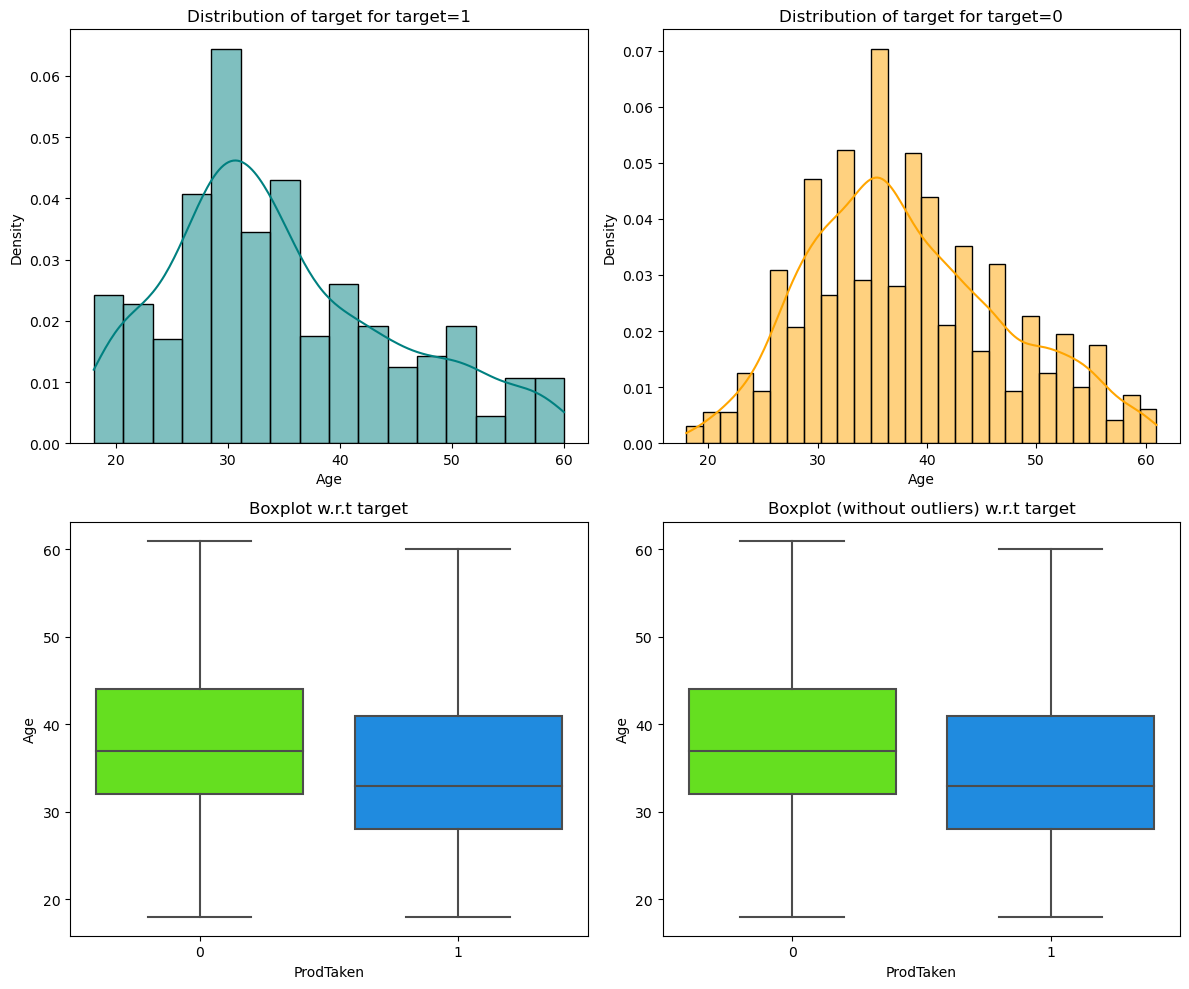

In [56]:
distribution_plot_wrt_target(data, "Age", "ProdTaken")

In [57]:
data.groupby(['ProdTaken'])['Age'].mean()

ProdTaken
0   38.245
1   34.739
Name: Age, dtype: float64

**Type of Contract vs ProdTaken**

ProdTaken           0    1   All
TypeofContact                   
All              3831  891  4722
Self Enquiry     2753  597  3350
Company Invited  1078  294  1372
------------------------------------------------------------------------------------------------------------------------


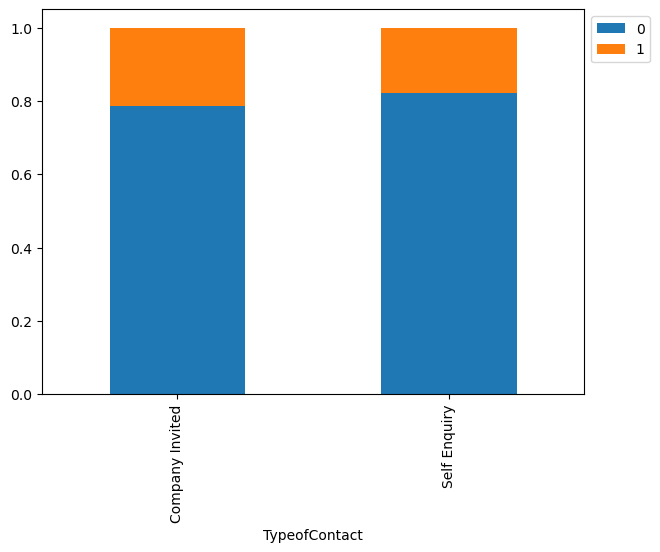

In [58]:
stacked_barplot(data, "TypeofContact", "ProdTaken")

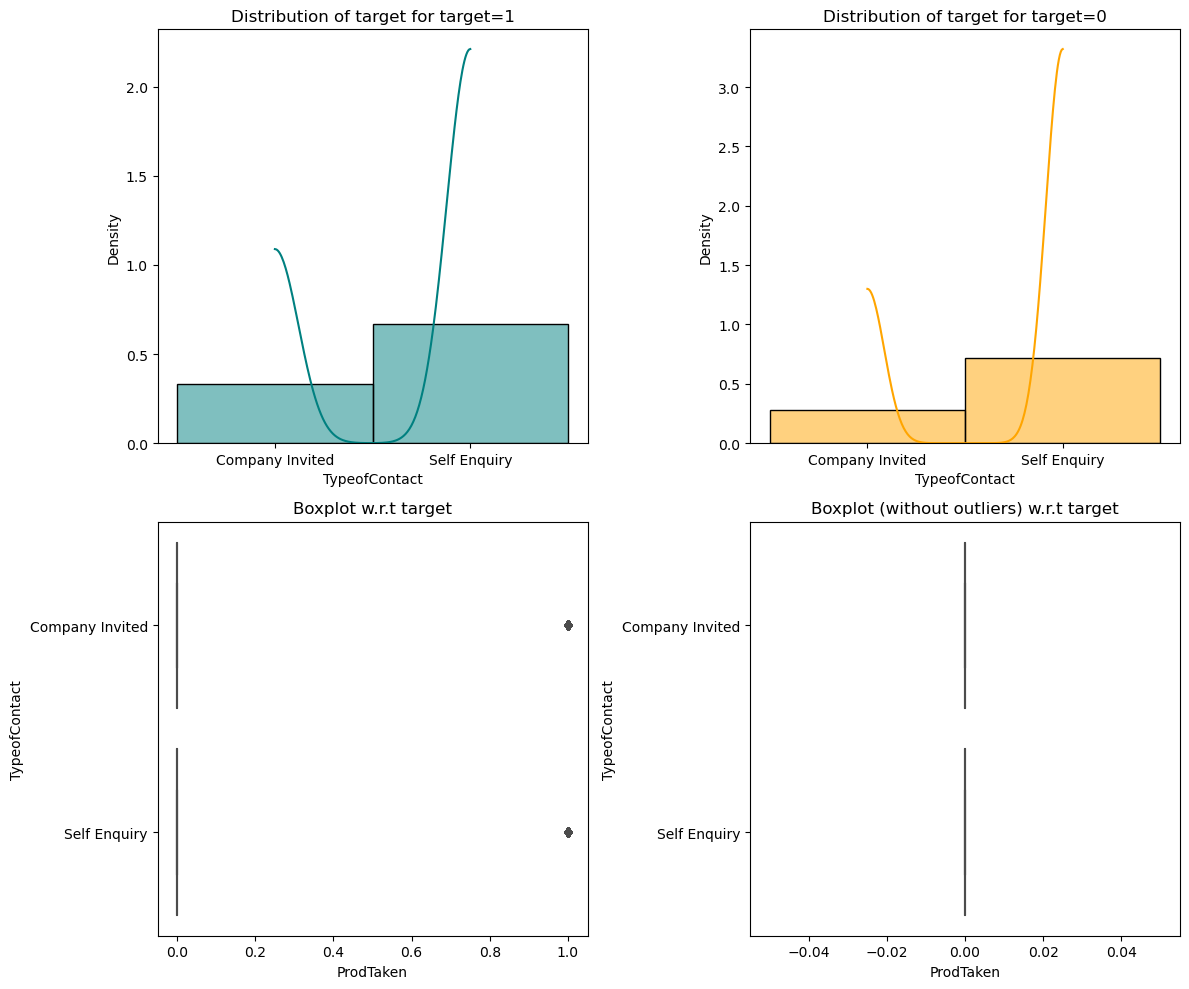

In [59]:
distribution_plot_wrt_target(data, "TypeofContact", "ProdTaken")

**City Tier vs ProdTaken**

ProdTaken     0    1   All
CityTier                  
All        3853  894  4747
1          2592  506  3098
3          1115  346  1461
2           146   42   188
------------------------------------------------------------------------------------------------------------------------


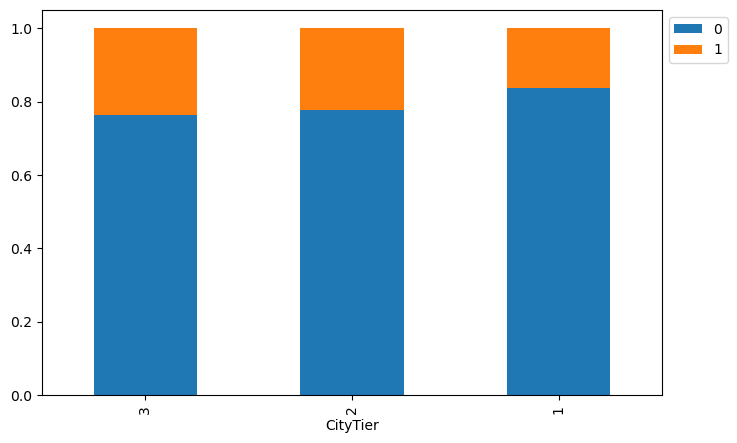

In [60]:
stacked_barplot(data, "CityTier", "ProdTaken")

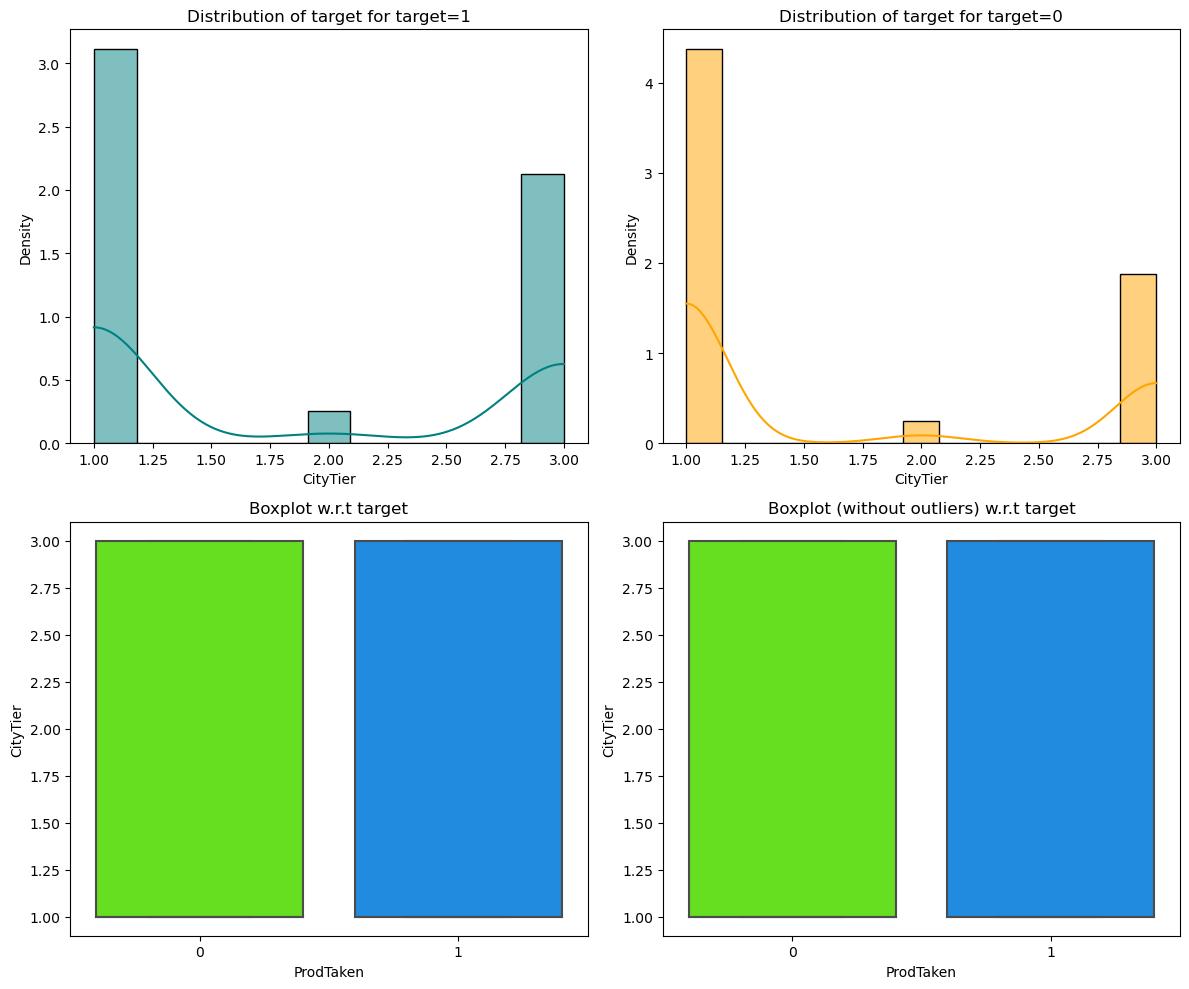

In [61]:
distribution_plot_wrt_target(data, "CityTier", "ProdTaken")

**Duration of Pitch vs ProdTaken**

ProdTaken           0    1   All
DurationOfPitch                 
All              3651  850  4501
9.0               388   78   466
8.0               265   59   324
16.0              215   55   270
15.0              210   52   262
7.0               287   47   334
10.0              191   43   234
14.0              204   41   245
6.0               261   38   299
11.0              162   34   196
12.0              155   32   187
13.0              181   32   213
31.0               50   30    80
30.0               62   28    90
17.0              146   23   169
22.0               66   22    88
19.0               35   20    55
29.0               51   20    71
23.0               58   19    77
18.0               55   18    73
20.0               43   18    61
28.0               44   17    61
32.0               57   15    72
21.0               55   15    70
24.0               54   15    69
27.0               58   14    72
25.0               58   14    72
26.0               59   12    71
33.0      

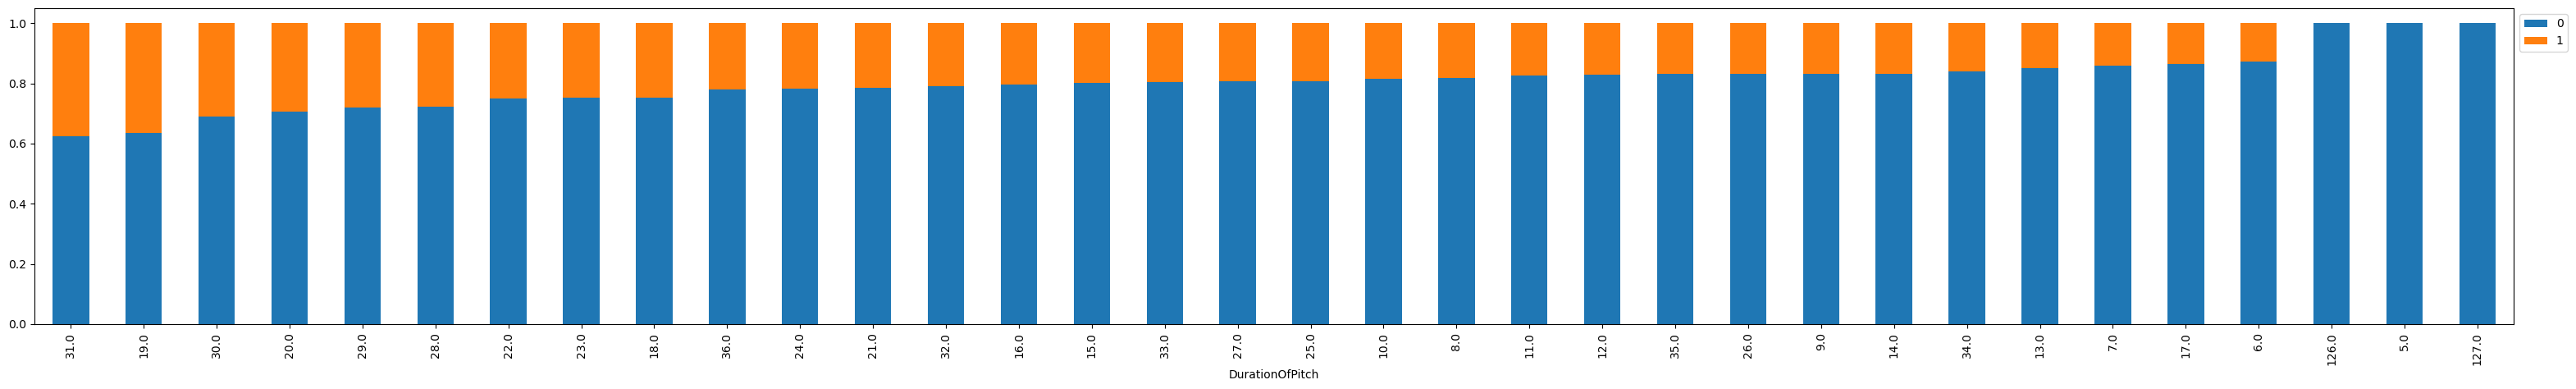

In [62]:
stacked_barplot(data, "DurationOfPitch", "ProdTaken")

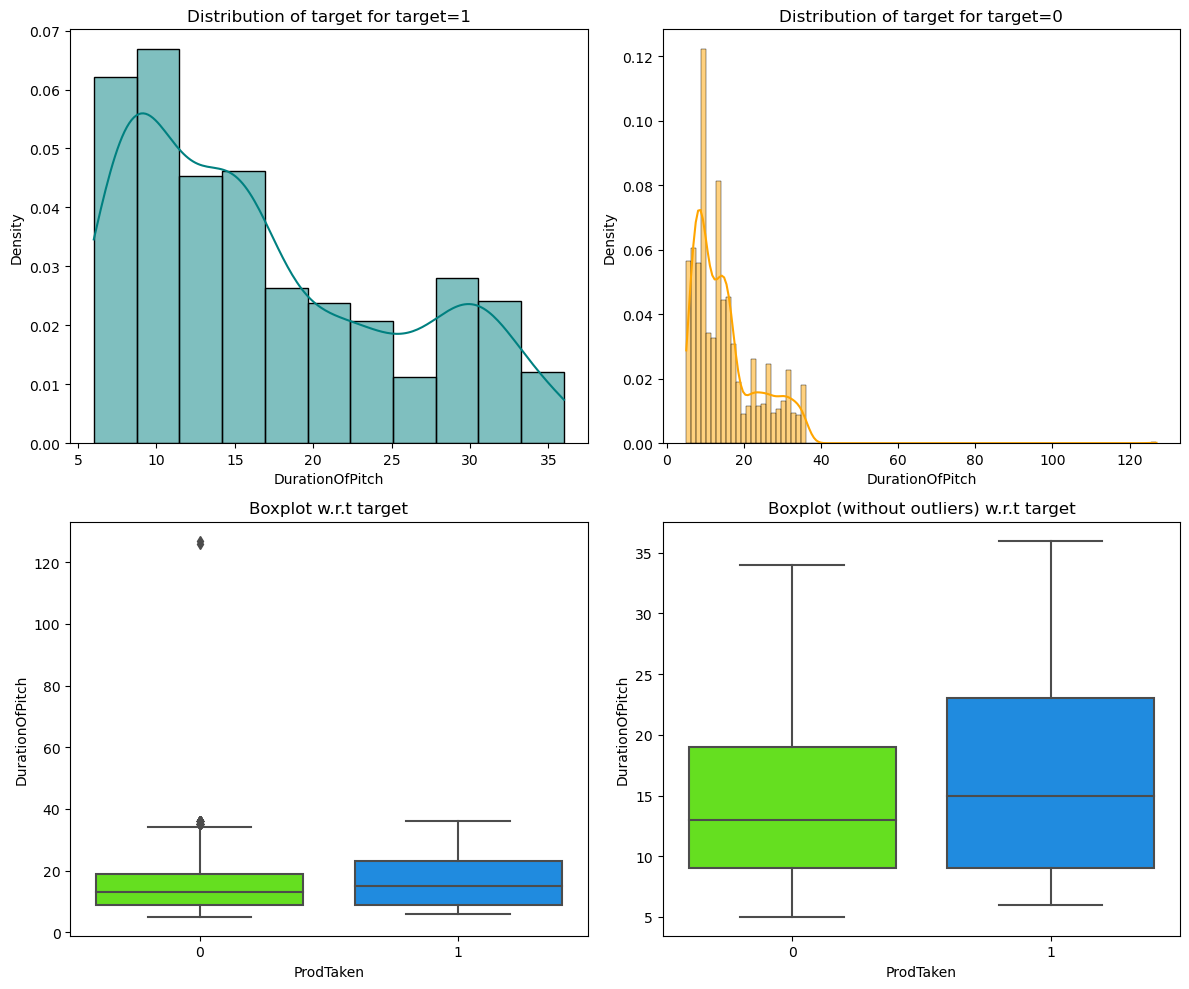

In [63]:
distribution_plot_wrt_target(data, "DurationOfPitch", "ProdTaken")

**Occupation vs ProdTaken**

ProdTaken          0    1   All
Occupation                     
All             3853  894  4747
Salaried        1893  400  2293
Small Business  1654  374  2028
Large Business   306  118   424
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


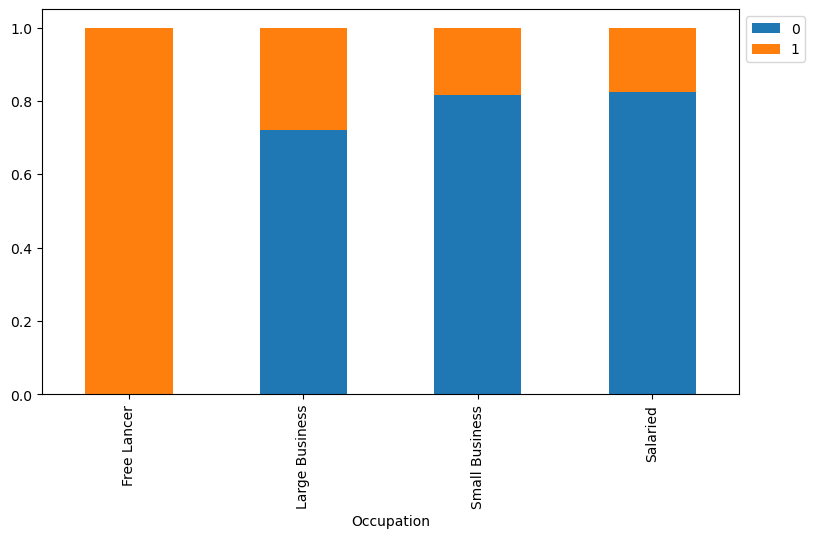

In [64]:
stacked_barplot(data, "Occupation", "ProdTaken")

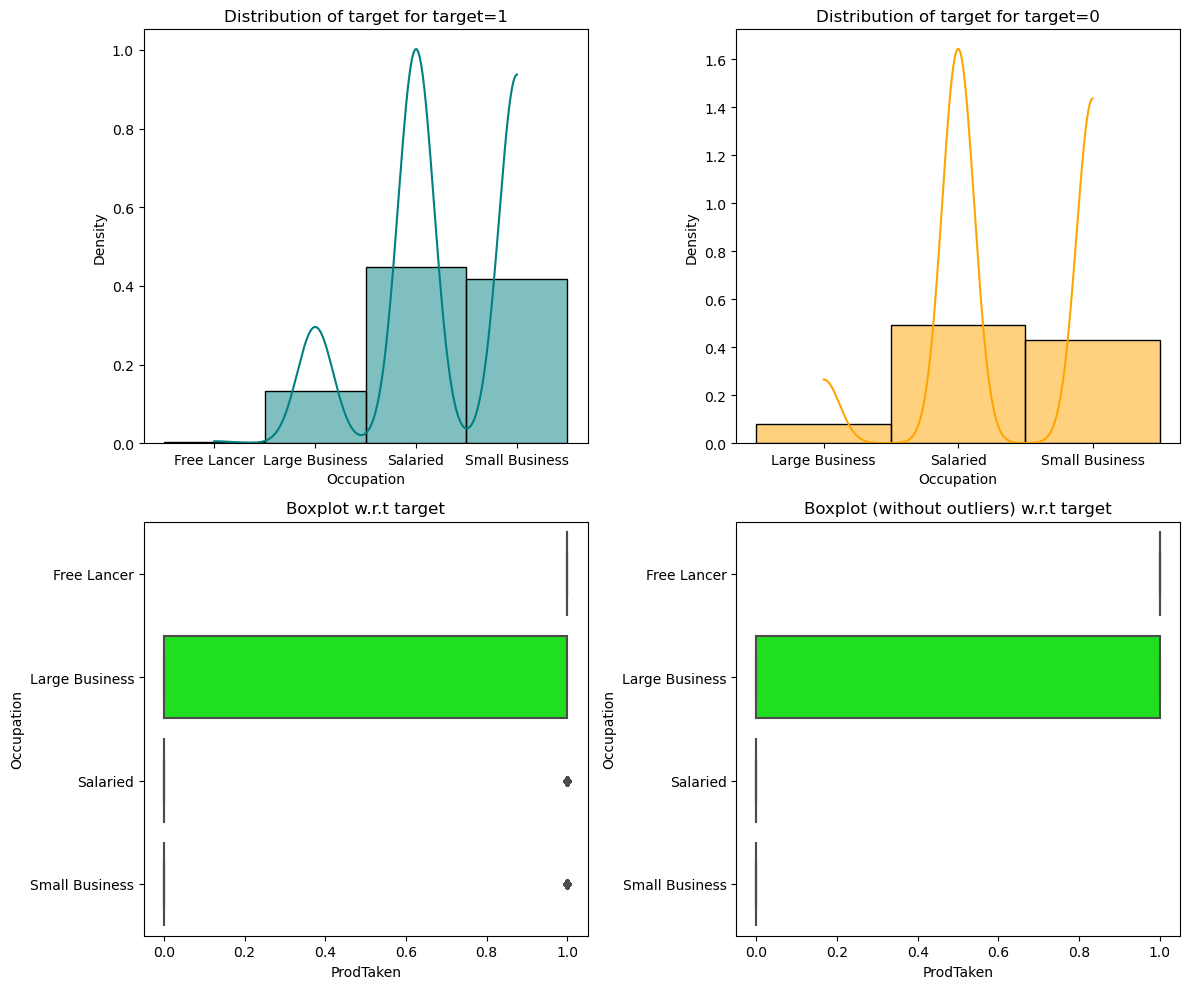

In [65]:
distribution_plot_wrt_target(data, "Occupation", "ProdTaken")

**Gender vs ProdTaken**

ProdTaken     0    1   All
Gender                    
All        3853  894  4747
Male       2273  562  2835
Female     1580  332  1912
------------------------------------------------------------------------------------------------------------------------


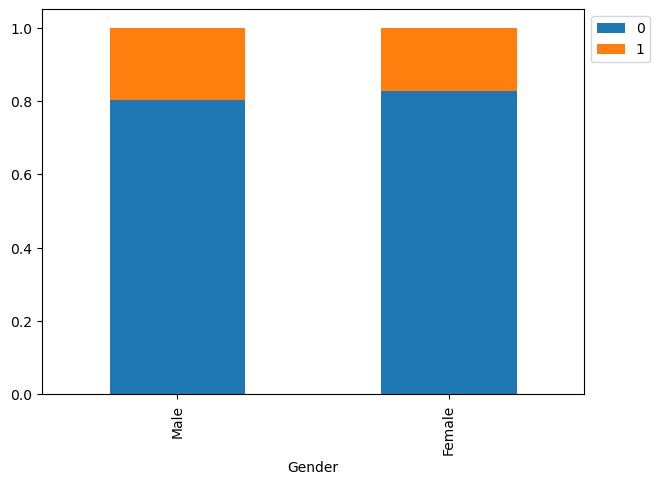

In [66]:
stacked_barplot(data, "Gender", "ProdTaken")

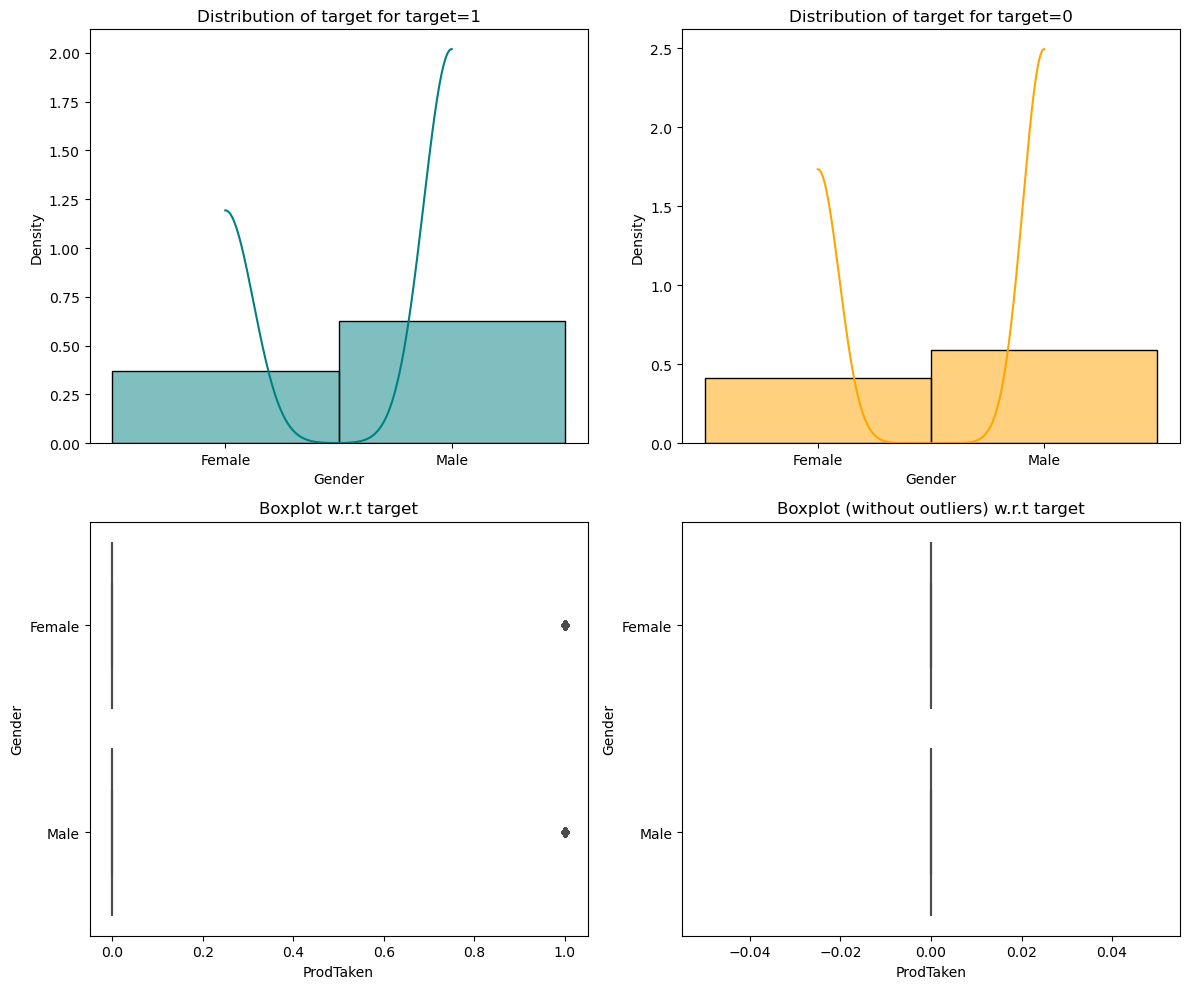

In [67]:
distribution_plot_wrt_target(data, "Gender", "ProdTaken")

**Number Of Person Visiting vs ProdTaken**

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3853  894  4747
3                       1889  447  2336
2                       1108  256  1364
4                        818  191  1009
1                         35    0    35
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


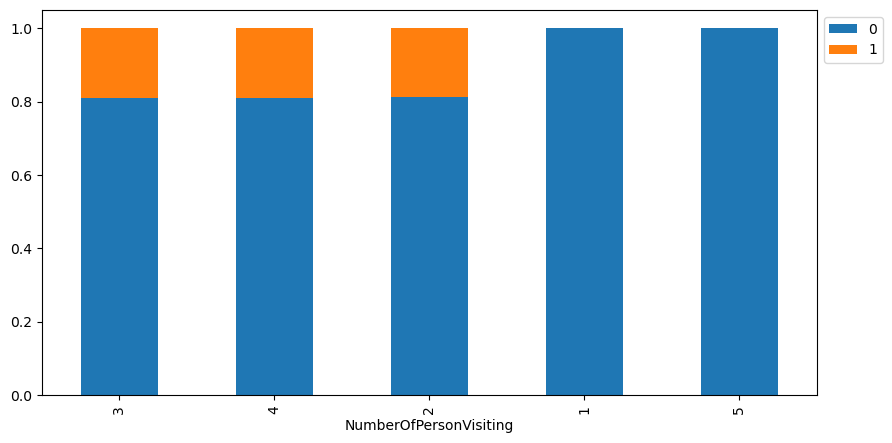

In [68]:
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken")

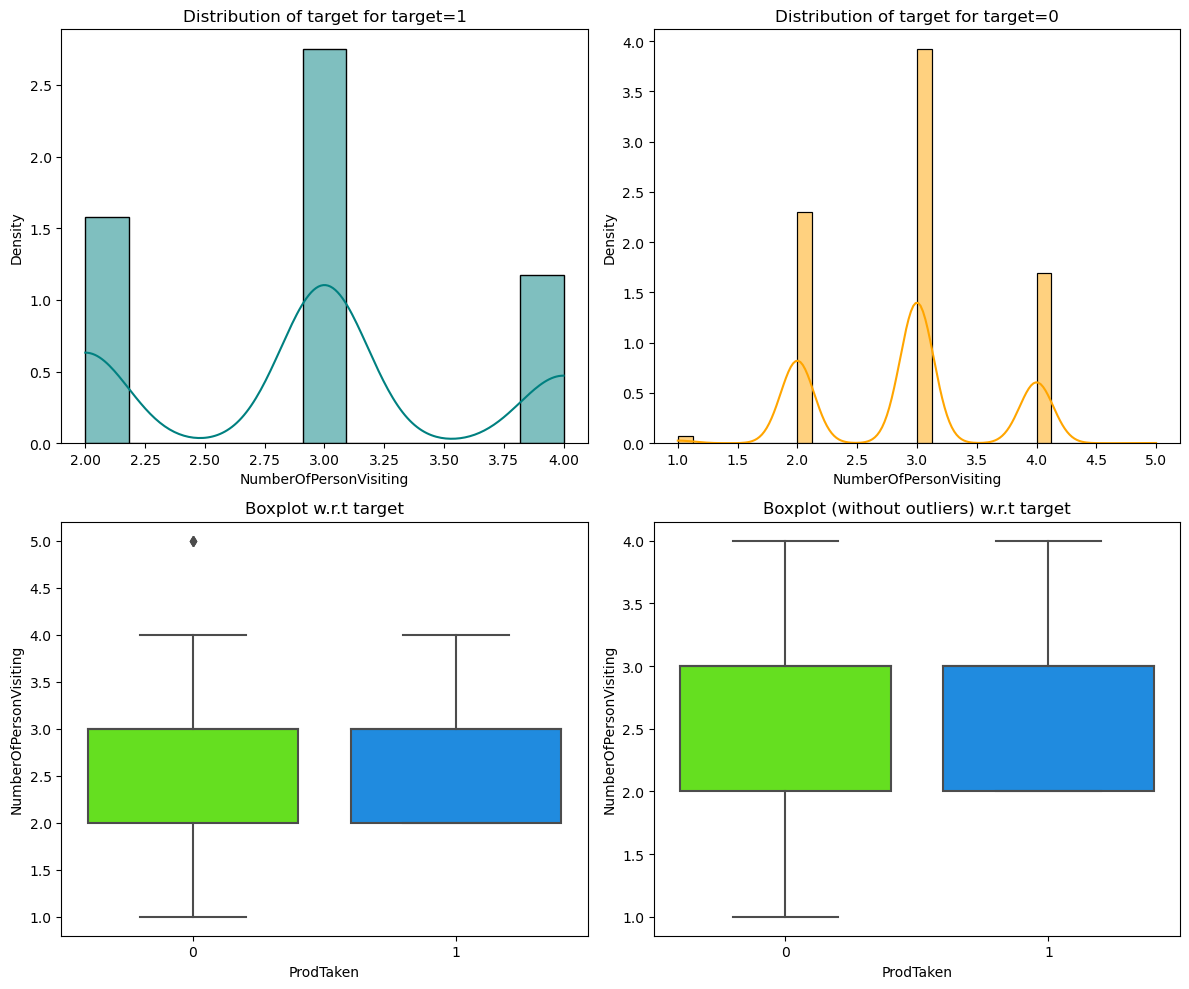

In [69]:
distribution_plot_wrt_target(data, "NumberOfPersonVisiting", "ProdTaken")

**Number of Followups vs ProdTaken**

ProdTaken             0    1   All
NumberOfFollowups                 
All                3817  886  4703
4.0                1632  367  1999
3.0                1187  234  1421
5.0                 557  188   745
6.0                  82   53   135
2.0                 204   24   228
1.0                 155   20   175
------------------------------------------------------------------------------------------------------------------------


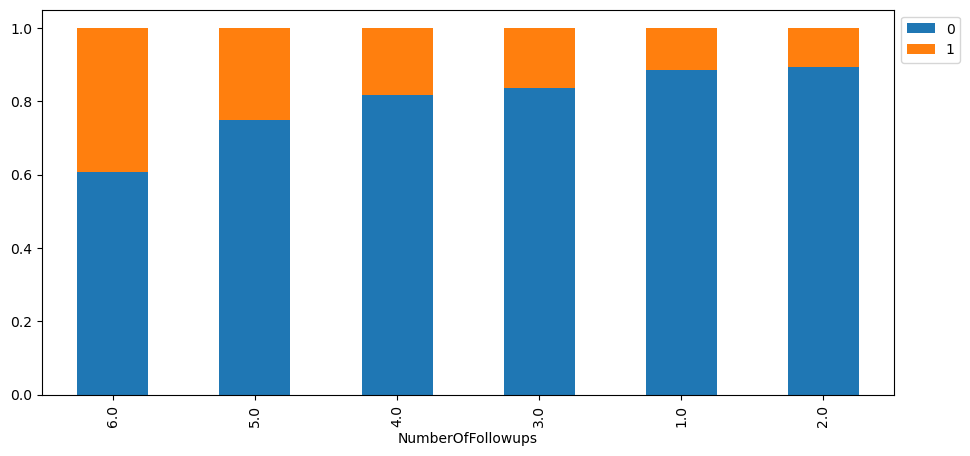

In [70]:
stacked_barplot(data, "NumberOfFollowups", "ProdTaken")

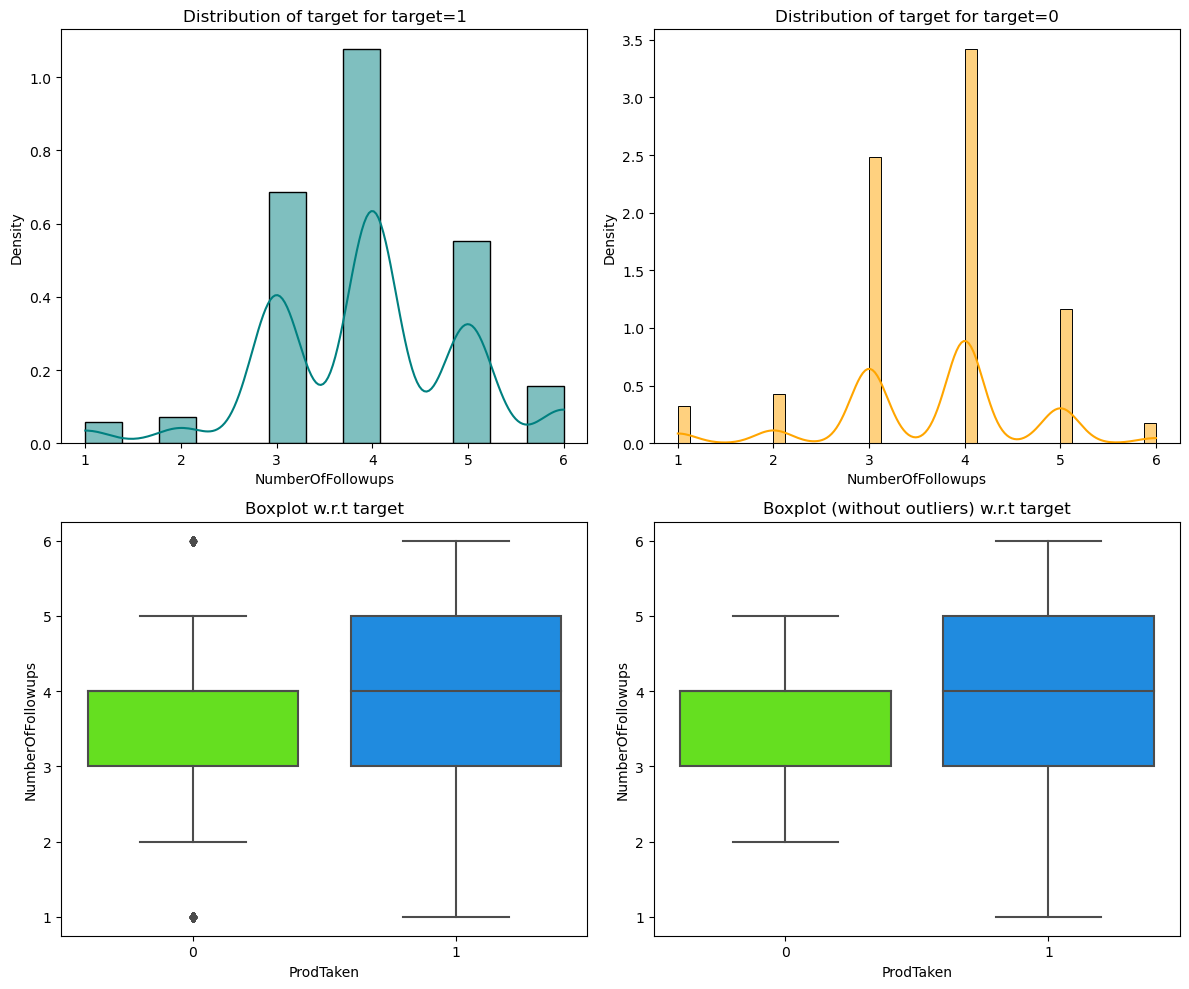

In [71]:
distribution_plot_wrt_target(data, "NumberOfFollowups", "ProdTaken")

**Product Pitched vs ProdTaken**

ProdTaken          0    1   All
ProductPitched                 
All             3853  894  4747
Basic           1260  540  1800
Deluxe          1486  198  1684
Standard         594  120   714
King             205   20   225
Super Deluxe     308   16   324
------------------------------------------------------------------------------------------------------------------------


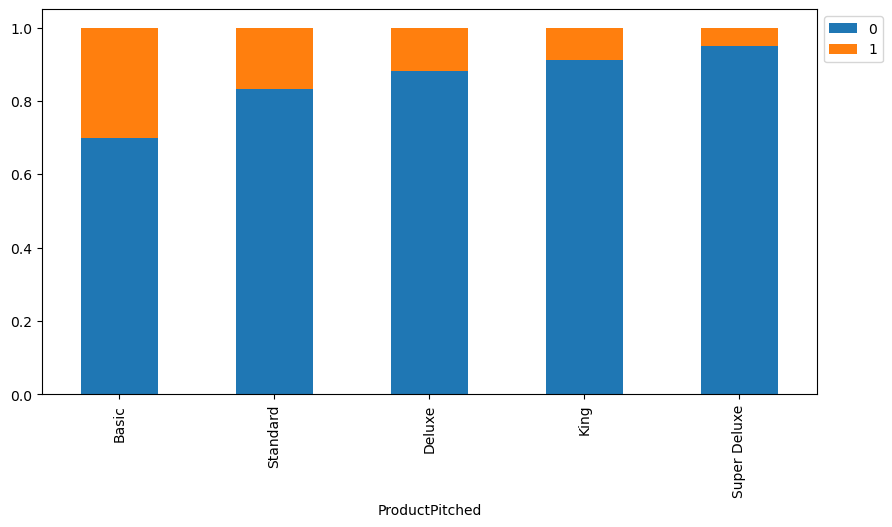

In [72]:
stacked_barplot(data, "ProductPitched", "ProdTaken")

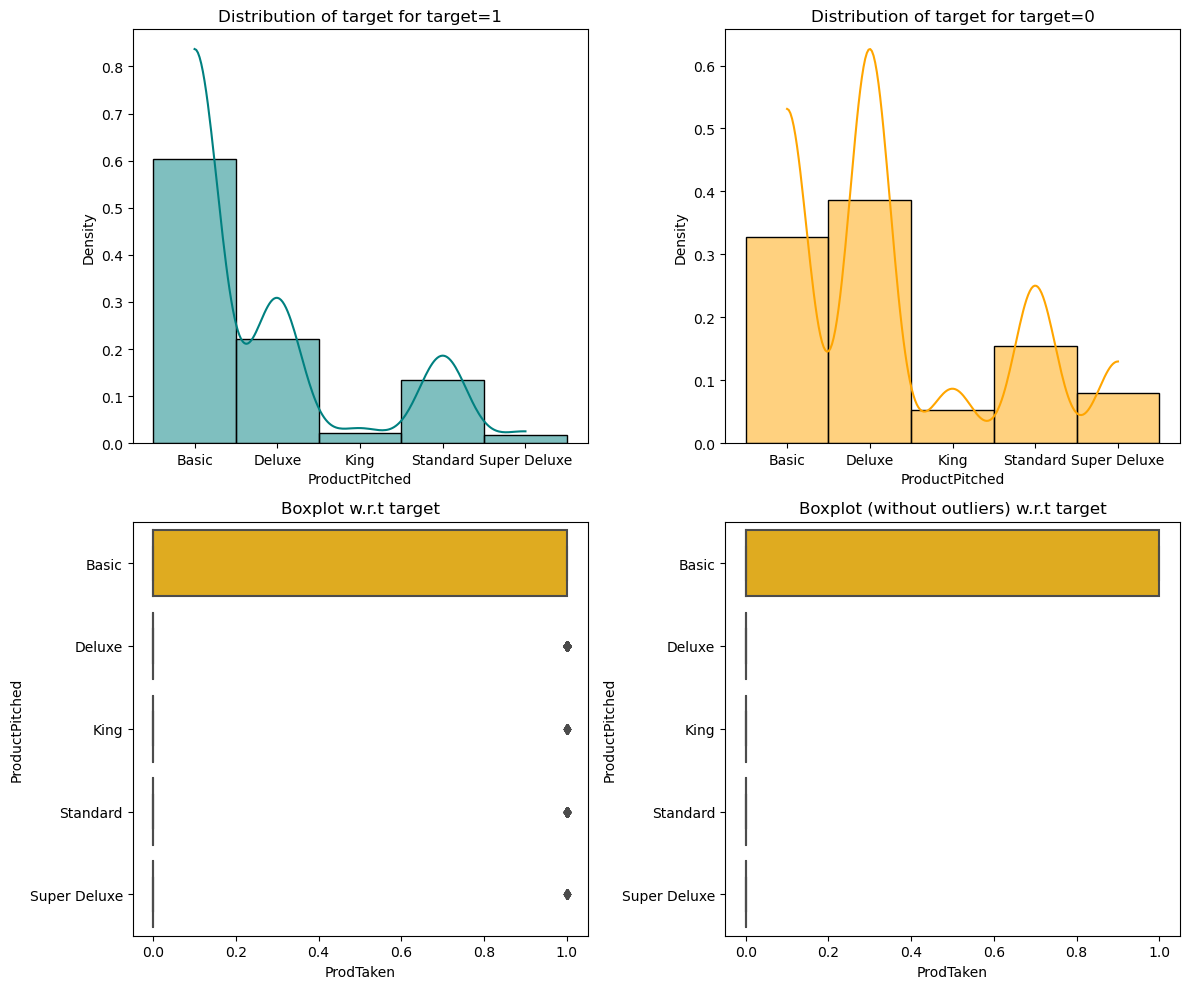

In [73]:
distribution_plot_wrt_target(data, "ProductPitched", "ProdTaken")

In [74]:
for i in data.columns:
    print("Unique values in", i, "are :")
    print(data.groupby(['ProductPitched','ProdTaken'])[i].value_counts())
    print("*" * 50)
    print(data.groupby(['ProductPitched','ProdTaken'])[i].value_counts(1))
    print("*" * 50)

Unique values in ProdTaken are :
ProductPitched  ProdTaken  ProdTaken
Basic           0          0            1260
                1          1             540
Deluxe          0          0            1486
                1          1             198
King            0          0             205
                1          1              20
Standard        0          0             594
                1          1             120
Super Deluxe    0          0             308
                1          1              16
Name: ProdTaken, dtype: int64
**************************************************
ProductPitched  ProdTaken  ProdTaken
Basic           0          0           1.000
                1          1           1.000
Deluxe          0          0           1.000
                1          1           1.000
King            0          0           1.000
                1          1           1.000
Standard        0          0           1.000
                1          1           1.000
Su

In [75]:
data[data['ProductPitched'] == 'Basic'].describe().T

count      mean      std       min       25%  \
ProdTaken                1800.000     0.300    0.458     0.000     0.000   
Age                      1661.000    33.023    8.646    18.000    27.000   
CityTier                 1800.000     1.354    0.726     1.000     1.000   
DurationOfPitch          1741.000    15.234    8.685     5.000     9.000   
NumberOfPersonVisiting   1800.000     2.937    0.717     1.000     2.000   
NumberOfFollowups        1787.000     3.691    1.026     1.000     3.000   
PreferredPropertyStar    1799.000     3.589    0.797     3.000     3.000   
NumberOfTrips            1795.000     3.103    1.795     1.000     2.000   
Passport                 1800.000     0.306    0.461     0.000     0.000   
PitchSatisfactionScore   1800.000     3.060    1.356     1.000     2.000   
OwnCar                   1800.000     0.590    0.492     0.000     0.000   
NumberOfChildrenVisiting 1799.000     1.205    0.861     0.000     1.000   
MonthlyIncome            1718.000 19940.013 3626.126 16009.000 17645.500   

                               50%       75%       max  
ProdTaken                    0.000     1.000     1.000  
Age                         32.000    37.000    60.000  
CityTier                     1.000     1.000     3.000  
DurationOfPitch             13.000    19.000   127.000  
NumberOfPersonVisiting       3.000     3.000     5.000  
NumberOfFollowups            4.000     4.000     6.000  
PreferredPropertyStar        3.000     4.000     5.000  
NumberOfTrips                3.000     4.000    20.000  
Passport                     0.000     1.000     1.000  
PitchSatisfactionScore       3.000     4.000     5.000  
OwnCar                       1.000     1.000     1.000  
NumberOfChildrenVisiting     1.000     2.000     3.000  
MonthlyIncome            20686.000 21405.250 98678.000

In [76]:
data[data['ProductPitched'] == 'Deluxe'].describe().T

count      mean      std      min       25%  \
ProdTaken                1684.000     0.118    0.322    0.000     0.000   
Age                      1608.000    37.315    7.757   21.000    32.000   
CityTier                 1684.000     1.932    0.987    1.000     1.000   
DurationOfPitch          1498.000    15.935    8.458    5.000     9.000   
NumberOfPersonVisiting   1684.000     2.899    0.727    1.000     2.000   
NumberOfFollowups        1653.000     3.702    1.024    1.000     3.000   
PreferredPropertyStar    1683.000     3.560    0.793    3.000     3.000   
NumberOfTrips            1682.000     3.271    1.912    1.000     2.000   
Passport                 1684.000     0.278    0.448    0.000     0.000   
PitchSatisfactionScore   1684.000     2.979    1.365    1.000     2.000   
OwnCar                   1684.000     0.607    0.489    0.000     0.000   
NumberOfChildrenVisiting 1683.000     1.185    0.856    0.000     1.000   
MonthlyIncome            1542.000 22659.488 2513.066 1000.000 20743.250   

                               50%       75%       max  
ProdTaken                    0.000     0.000     1.000  
Age                         36.000    42.000    61.000  
CityTier                     1.000     3.000     3.000  
DurationOfPitch             14.000    21.000    36.000  
NumberOfPersonVisiting       3.000     3.000     5.000  
NumberOfFollowups            4.000     4.000     6.000  
PreferredPropertyStar        3.000     4.000     5.000  
NumberOfTrips                3.000     4.000    22.000  
Passport                     0.000     1.000     1.000  
PitchSatisfactionScore       3.000     4.000     5.000  
OwnCar                       1.000     1.000     1.000  
NumberOfChildrenVisiting     1.000     2.000     3.000  
MonthlyIncome            22939.000 24233.250 38525.000

In [77]:
data[data['ProductPitched'] == 'King'].describe().T

count      mean      std       min       25%  \
ProdTaken                225.000     0.089    0.285     0.000     0.000   
Age                      225.000    48.142    6.137    27.000    43.000   
CityTier                 225.000     1.453    0.779     1.000     1.000   
DurationOfPitch          225.000    12.009    5.771     5.000     8.000   
NumberOfPersonVisiting   225.000     2.858    0.693     2.000     2.000   
NumberOfFollowups        225.000     3.787    0.930     1.000     3.000   
PreferredPropertyStar    202.000     3.490    0.735     3.000     3.000   
NumberOfTrips            144.000     3.347    1.875     1.000     2.000   
Passport                 225.000     0.258    0.438     0.000     0.000   
PitchSatisfactionScore   225.000     3.218    1.437     1.000     2.000   
OwnCar                   225.000     0.716    0.452     0.000     0.000   
NumberOfChildrenVisiting 205.000     1.356    0.837     0.000     1.000   
MonthlyIncome            225.000 35880.431 2475.591 17517.000 34202.000   

                               50%       75%       max  
ProdTaken                    0.000     0.000     1.000  
Age                         49.000    53.000    61.000  
CityTier                     1.000     2.000     3.000  
DurationOfPitch             10.000    14.000    33.000  
NumberOfPersonVisiting       3.000     3.000     4.000  
NumberOfFollowups            4.000     4.000     6.000  
PreferredPropertyStar        3.000     4.000     5.000  
NumberOfTrips                3.000     5.000     8.000  
Passport                     0.000     1.000     1.000  
PitchSatisfactionScore       3.000     5.000     5.000  
OwnCar                       1.000     1.000     1.000  
NumberOfChildrenVisiting     1.000     2.000     3.000  
MonthlyIncome            34999.000 37880.000 38677.000

In [78]:
data[data['ProductPitched'] == 'Standard'].describe().T

count      mean      std       min       25%  \
ProdTaken                714.000     0.168    0.374     0.000     0.000   
Age                      713.000    40.742    8.358    19.000    35.000   
CityTier                 714.000     1.784    0.966     1.000     1.000   
DurationOfPitch          713.000    16.031    8.314     5.000     9.000   
NumberOfPersonVisiting   714.000     2.926    0.735     1.000     2.000   
NumberOfFollowups        714.000     3.786    0.927     1.000     3.000   
PreferredPropertyStar    713.000     3.651    0.841     3.000     3.000   
NumberOfTrips            713.000     3.318    1.790     1.000     2.000   
Passport                 714.000     0.280    0.449     0.000     0.000   
PitchSatisfactionScore   714.000     3.022    1.389     1.000     2.000   
OwnCar                   714.000     0.644    0.479     0.000     0.000   
NumberOfChildrenVisiting 713.000     1.188    0.873     0.000     1.000   
MonthlyIncome            714.000 26664.751 2812.166 17372.000 24885.000   

                               50%       75%       max  
ProdTaken                    0.000     0.000     1.000  
Age                         39.000    46.000    61.000  
CityTier                     1.000     3.000     3.000  
DurationOfPitch             14.000    22.000    36.000  
NumberOfPersonVisiting       3.000     3.000     5.000  
NumberOfFollowups            4.000     4.000     6.000  
PreferredPropertyStar        3.000     4.000     5.000  
NumberOfTrips                3.000     5.000     8.000  
Passport                     0.000     1.000     1.000  
PitchSatisfactionScore       3.000     4.000     5.000  
OwnCar                       1.000     1.000     1.000  
NumberOfChildrenVisiting     1.000     2.000     3.000  
MonthlyIncome            26505.500 28753.750 38395.000

In [79]:
data[data['ProductPitched'] == 'Super Deluxe'].describe().T

count      mean      std       min       25%  \
ProdTaken                324.000     0.049    0.217     0.000     0.000   
Age                      324.000    48.040    6.340    29.000    43.000   
CityTier                 324.000     1.741    0.951     1.000     1.000   
DurationOfPitch          324.000    16.324    9.520     6.000     9.000   
NumberOfPersonVisiting   324.000     2.846    0.743     1.000     2.000   
NumberOfFollowups        324.000     3.565    1.046     1.000     3.000   
PreferredPropertyStar    324.000     3.583    0.800     3.000     3.000   
NumberOfTrips            275.000     3.575    1.865     1.000     2.000   
Passport                 324.000     0.306    0.461     0.000     0.000   
PitchSatisfactionScore   324.000     3.333    1.338     1.000     3.000   
OwnCar                   324.000     0.701    0.459     0.000     0.000   
NumberOfChildrenVisiting 287.000     1.073    0.856     0.000     0.000   
MonthlyIncome            324.000 32232.494 2877.320 17705.000 30832.000   

                               50%       75%       max  
ProdTaken                    0.000     0.000     1.000  
Age                         49.000    53.000    60.000  
CityTier                     1.000     3.000     3.000  
DurationOfPitch             13.000    23.000    36.000  
NumberOfPersonVisiting       3.000     3.000     4.000  
NumberOfFollowups            4.000     4.000     6.000  
PreferredPropertyStar        3.000     4.000     5.000  
NumberOfTrips                3.000     5.000     8.000  
Passport                     0.000     1.000     1.000  
PitchSatisfactionScore       3.000     5.000     5.000  
OwnCar                       1.000     1.000     1.000  
NumberOfChildrenVisiting     1.000     2.000     3.000  
MonthlyIncome            32181.000 34817.000 37502.000

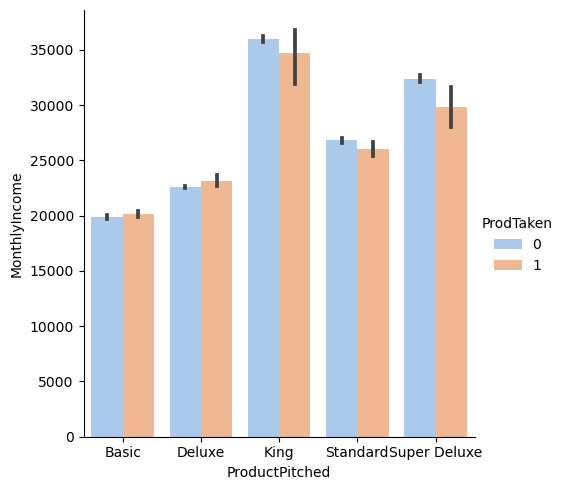

In [80]:
sns.catplot(data=data, x="ProductPitched", y="MonthlyIncome", hue="ProdTaken", kind='bar', palette='pastel');

**Inferences**

* The Basic Package: A majority of customers who choose this package have a monthly income less than 25000, an age between 26-30, hold an executive position and reside in a tier 1 city. They are either single males or married individuals. They made the initial contact with the company.

* The Deluxe Package: Customers who opt for this package have a monthly income less than 25000, are between 31-40 years old, hold a managerial position and reside in a tier 3 city. They are mostly married and have small businesses. The company was contacted by these customers, but tier 1 and divorced individuals also prefer this package.

* The King Package: The majority of customers who purchase this package have a monthly income between 30000-35000, are between 51-60 years old, hold a VP position and reside in a tier 1 city. They are single females and run small businesses. Women are more likely to buy this package compared to men.

* The Super Deluxe Package: Customers who select this package have a monthly income less than 35000, are between 41-50 years old, hold an AVP position and reside in a tier 3 city. They are single, male, salaried individuals and were mostly invited by the company.

* The Standard Package: Customers who choose this package have a monthly income less than 30000, are between 31-40 years old, hold a senior managerial position, are married, reside in a tier 3 city and have small businesses. The majority of these customers made their own inquiry.

**Preferred Property Star vs Prod Taken**

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3833  888  4721
3.0                    2435  470  2905
5.0                     696  242   938
4.0                     702  176   878
------------------------------------------------------------------------------------------------------------------------


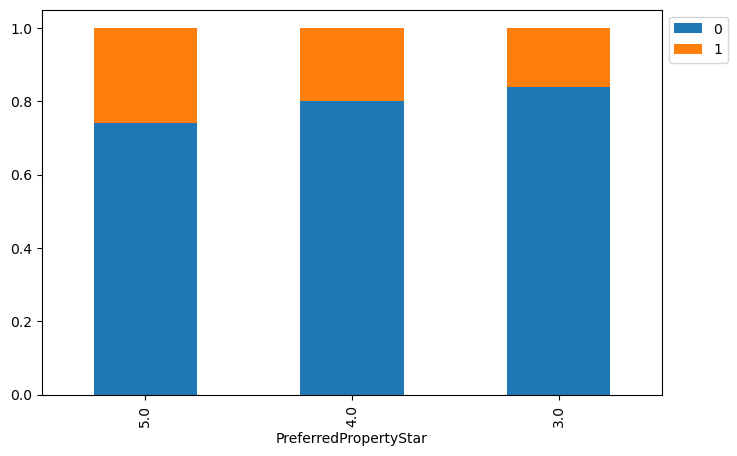

In [81]:
stacked_barplot(data, "PreferredPropertyStar", "ProdTaken")

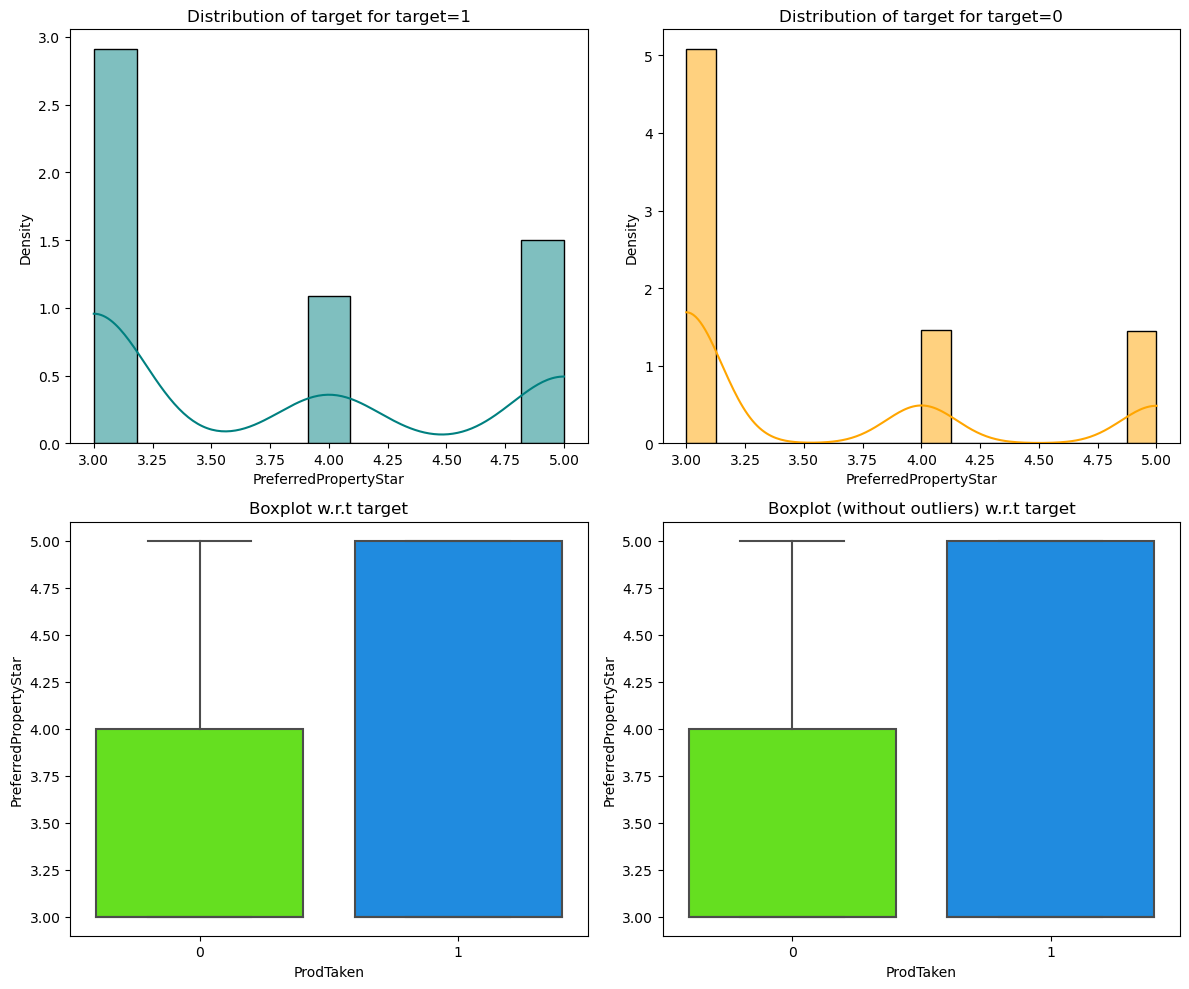

In [82]:
distribution_plot_wrt_target(data, "PreferredPropertyStar", "ProdTaken")

**Marital Status vs ProdTaken**

ProdTaken         0    1   All
MaritalStatus                 
All            3853  894  4747
Married        1965  314  2279
Single          578  297   875
Unmarried       484  159   643
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


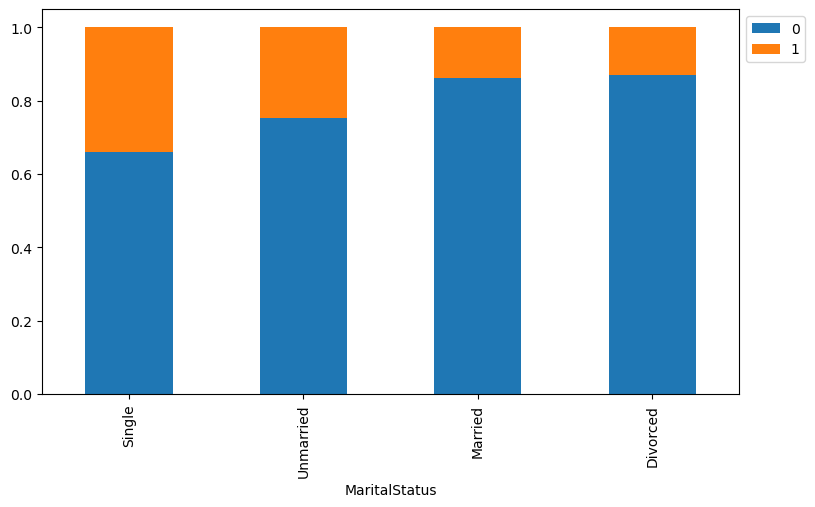

In [83]:
stacked_barplot(data, "MaritalStatus", "ProdTaken")

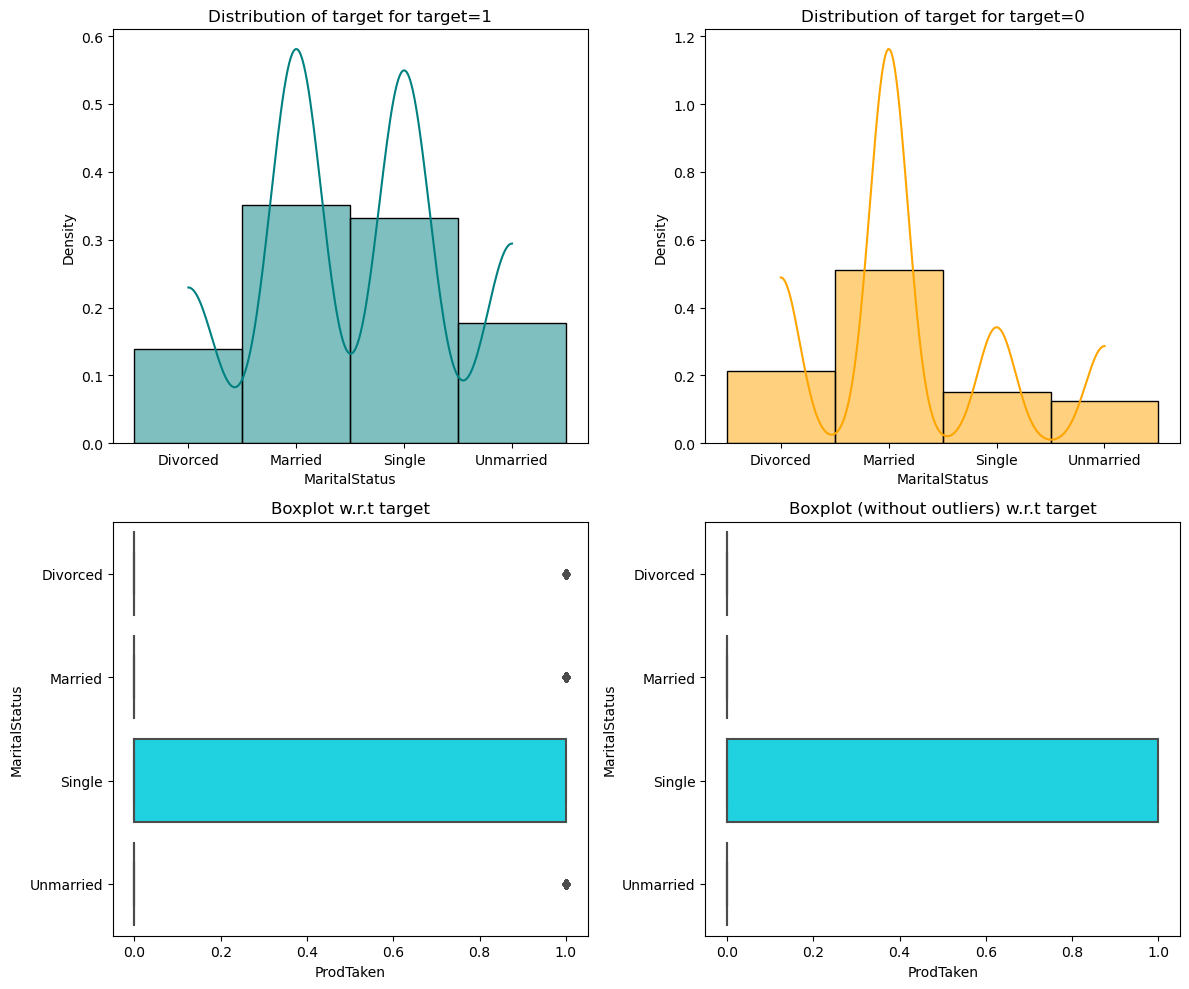

In [84]:
distribution_plot_wrt_target(data, "MaritalStatus", "ProdTaken")

**Number of Trips vs ProdTaken**

ProdTaken         0    1   All
NumberOfTrips                 
All            3727  882  4609
2.0            1134  288  1422
3.0             838  213  1051
1.0             496  105   601
6.0             244   63   307
5.0             382   61   443
7.0             150   61   211
4.0             408   60   468
8.0              73   29   102
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


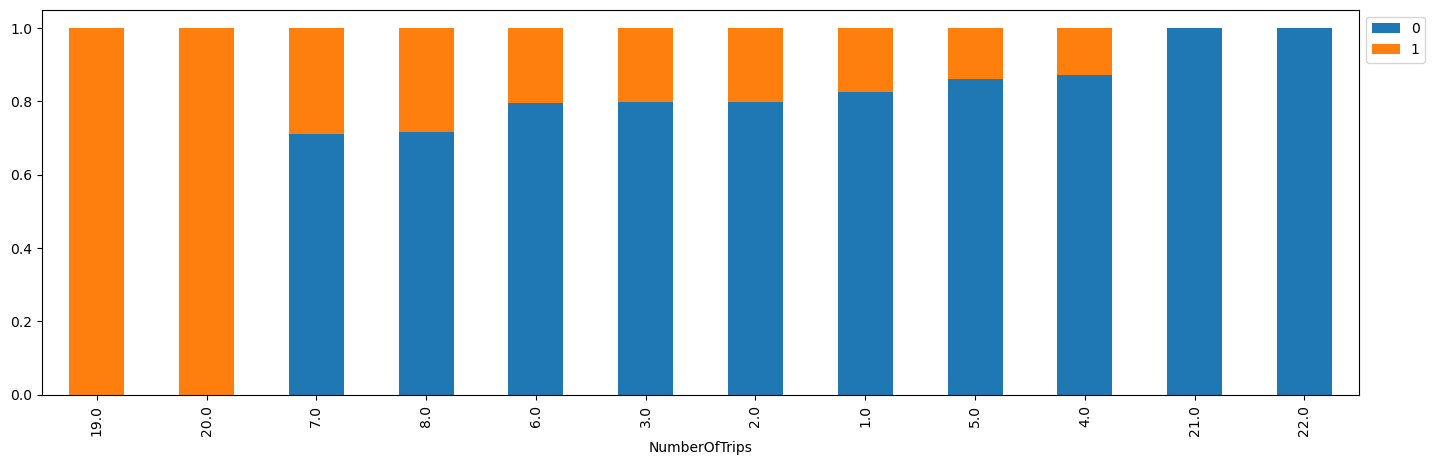

In [85]:
stacked_barplot(data, "NumberOfTrips", "ProdTaken")

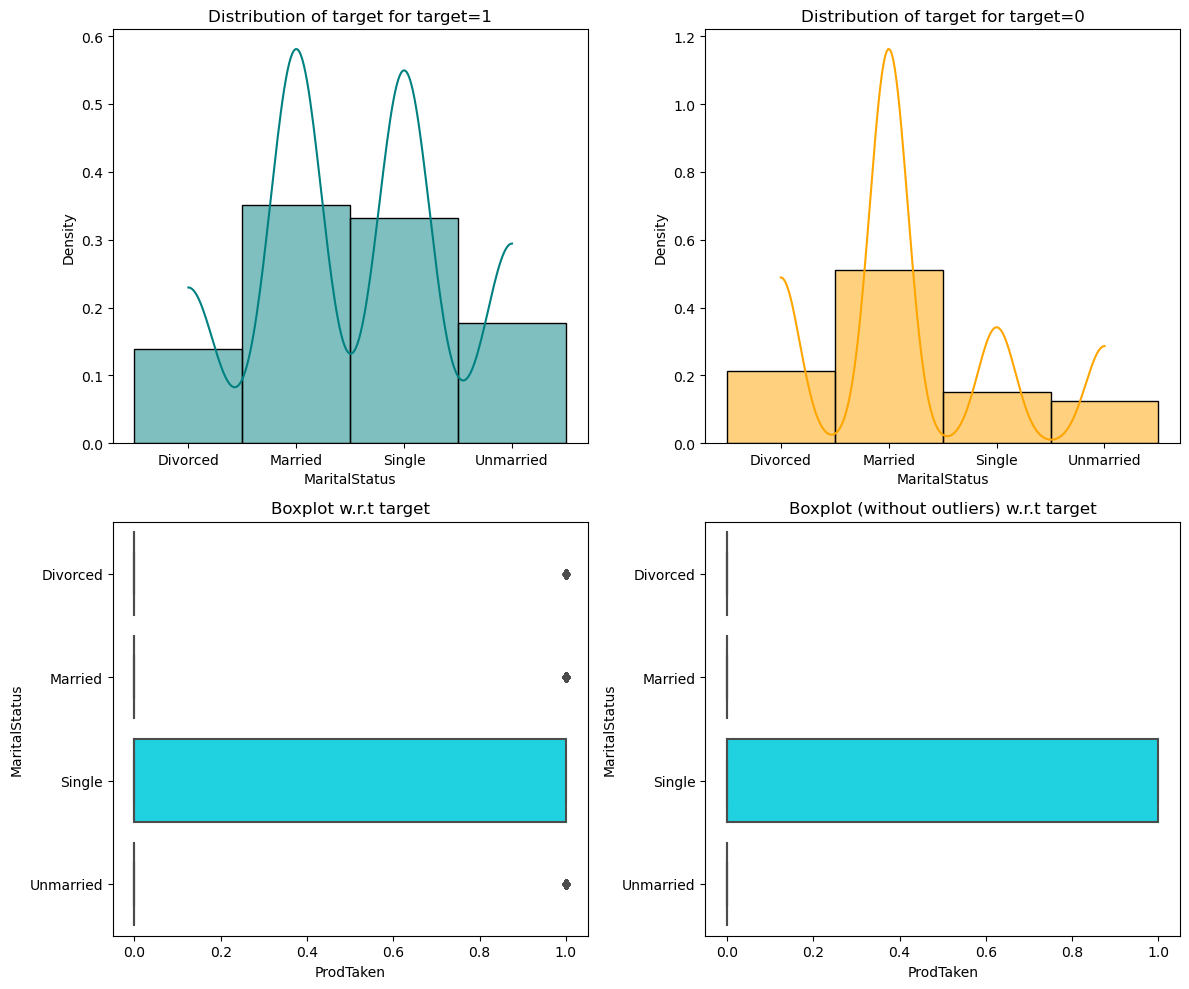

In [86]:
distribution_plot_wrt_target(data, "MaritalStatus", "ProdTaken")

**Passport vs ProdTaken**

ProdTaken     0    1   All
Passport                  
All        3853  894  4747
1           895  480  1375
0          2958  414  3372
------------------------------------------------------------------------------------------------------------------------


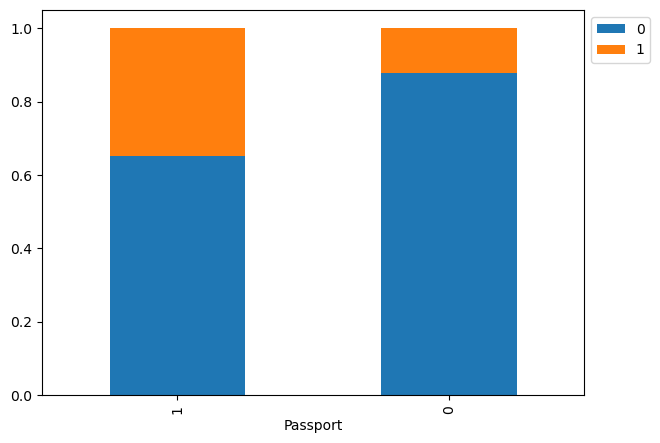

In [87]:
stacked_barplot(data, "Passport", "ProdTaken")

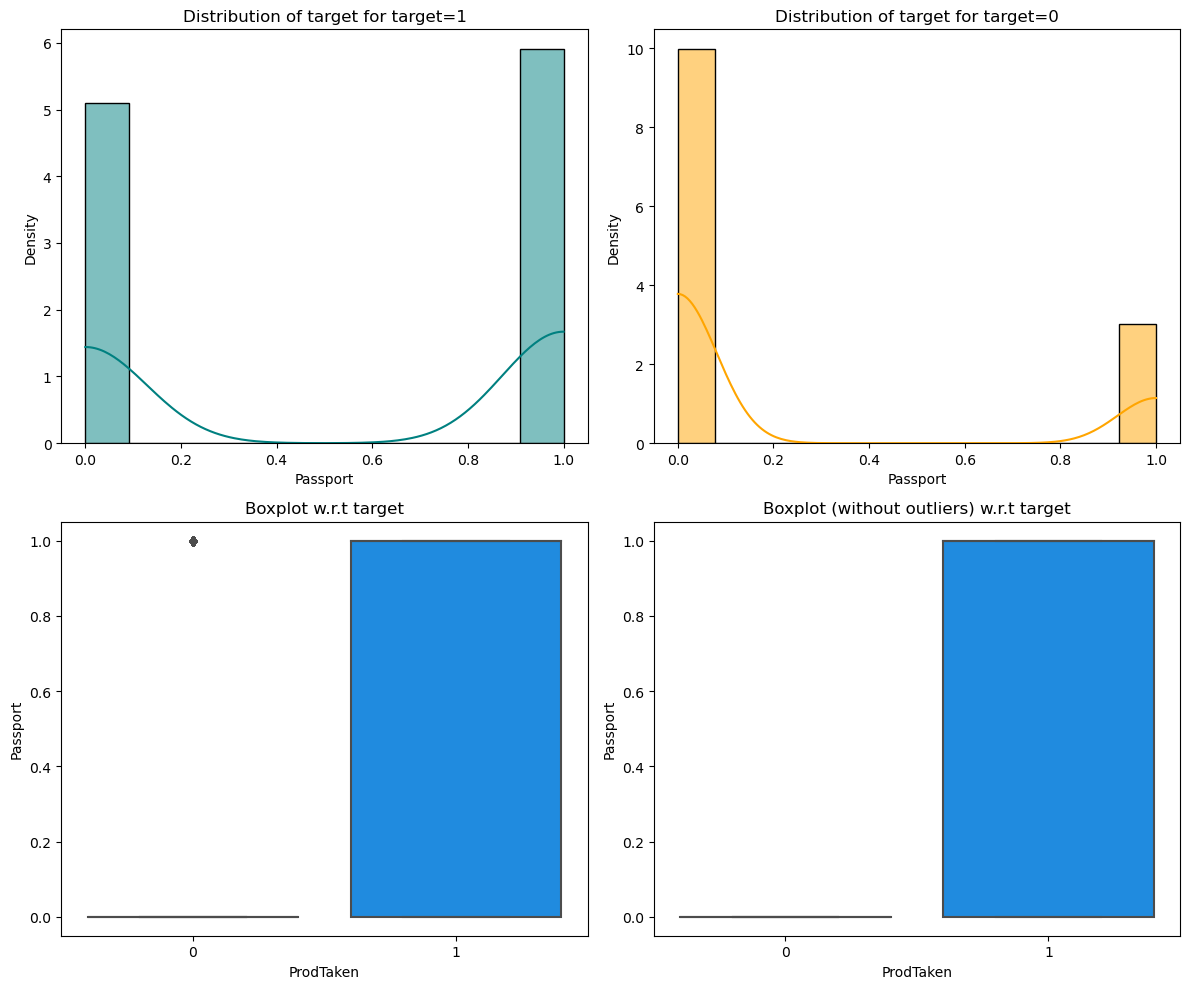

In [88]:
distribution_plot_wrt_target(data, "Passport", "ProdTaken")

**Pitch Satisfaction Score vs ProdTaken**

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3853  894  4747
3                       1123  304  1427
5                        725  198   923
4                        709  160   869
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


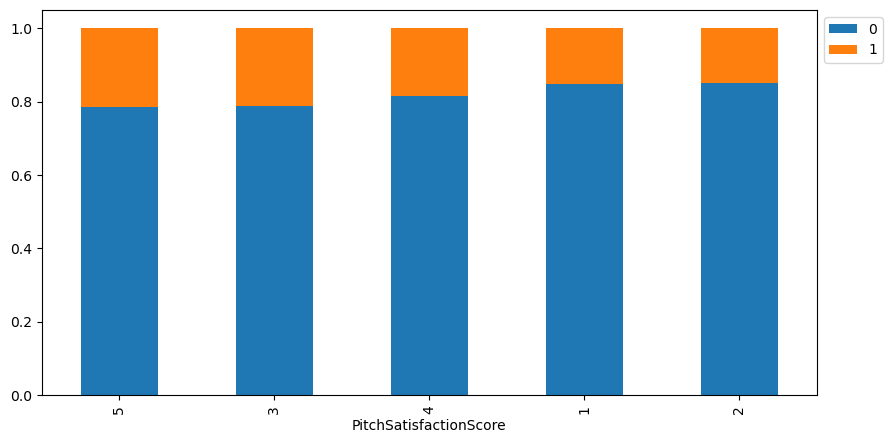

In [89]:
stacked_barplot(data, "PitchSatisfactionScore", "ProdTaken")

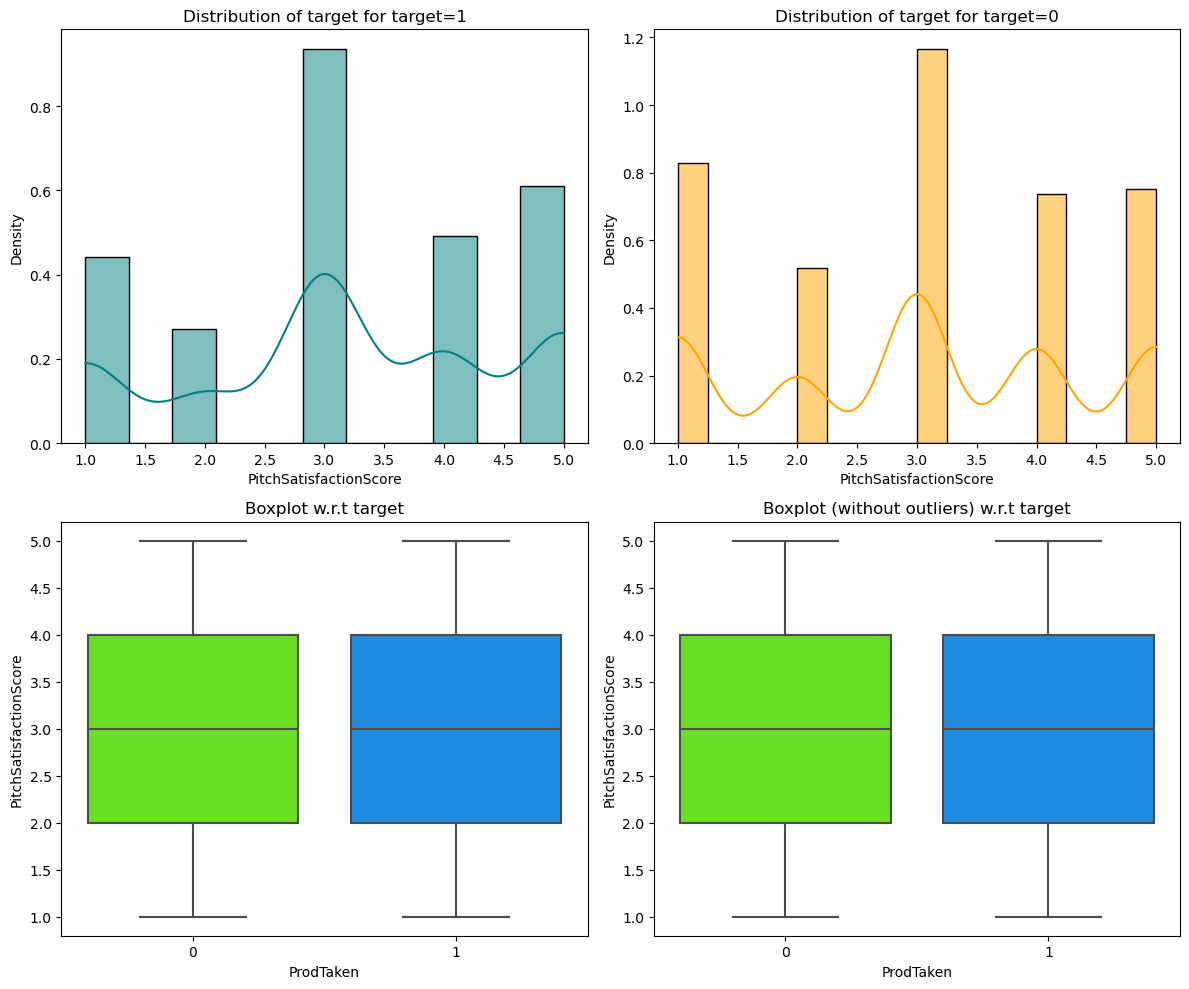

In [90]:
distribution_plot_wrt_target(data, "PitchSatisfactionScore", "ProdTaken")

**Own Car vs ProdTaken**

ProdTaken     0    1   All
OwnCar                    
All        3853  894  4747
1          2390  542  2932
0          1463  352  1815
------------------------------------------------------------------------------------------------------------------------


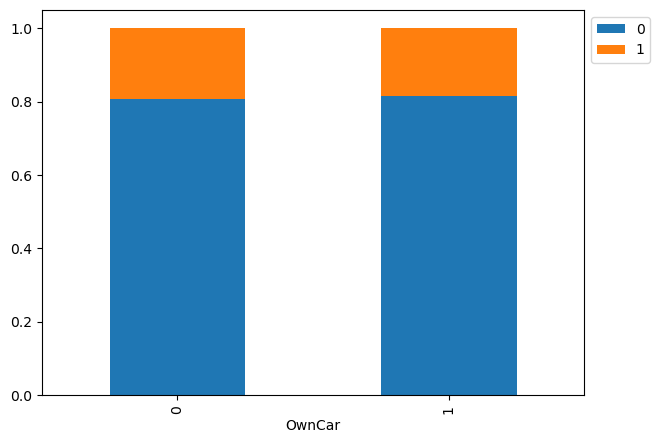

In [91]:
stacked_barplot(data, "OwnCar", "ProdTaken")

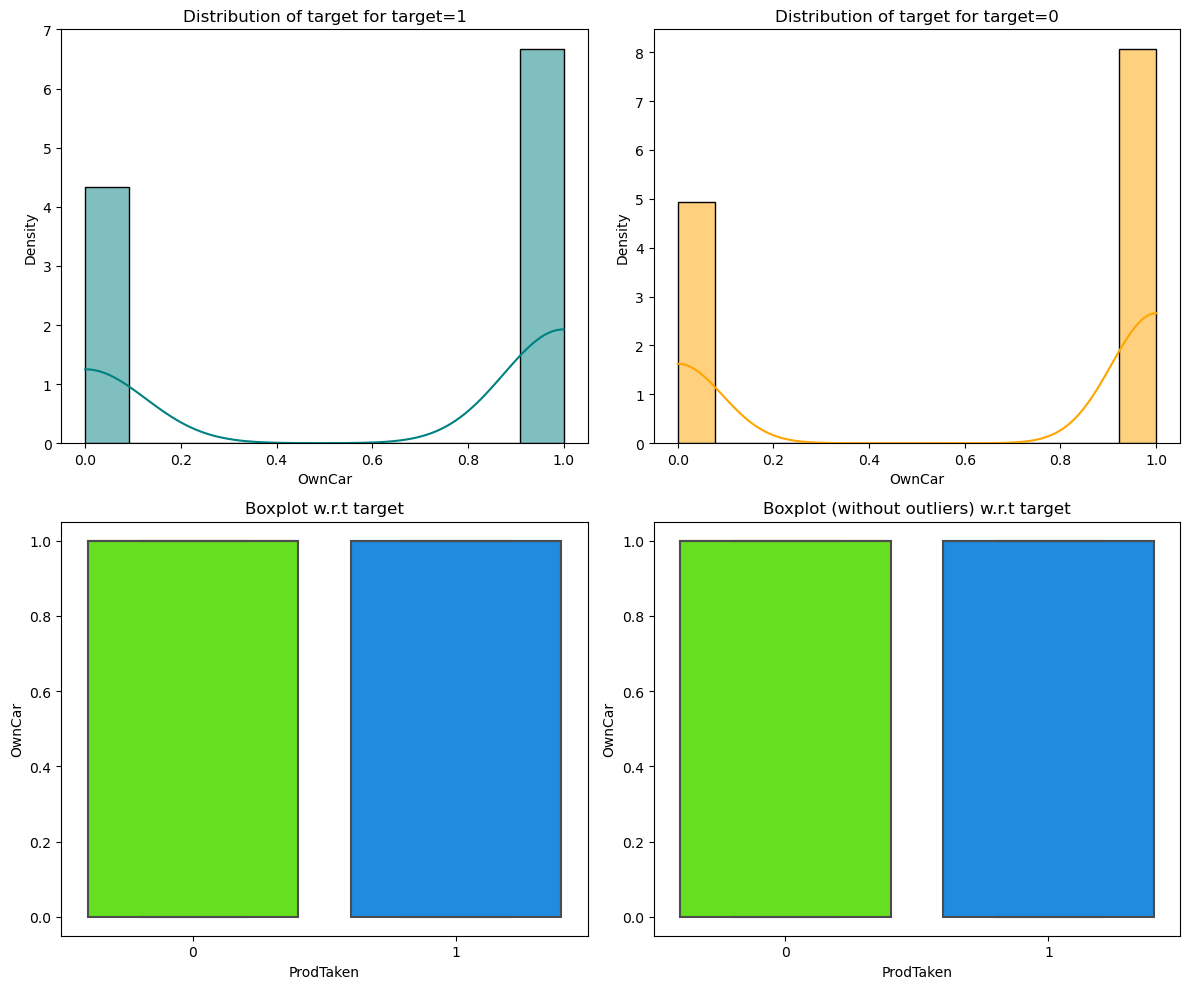

In [92]:
distribution_plot_wrt_target(data, "OwnCar", "ProdTaken")

**Number Of Children Visiting vs ProdTaken**

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3800  887  4687
1.0                       1635  379  2014
2.0                       1056  248  1304
0.0                        851  194  1045
3.0                        258   66   324
------------------------------------------------------------------------------------------------------------------------


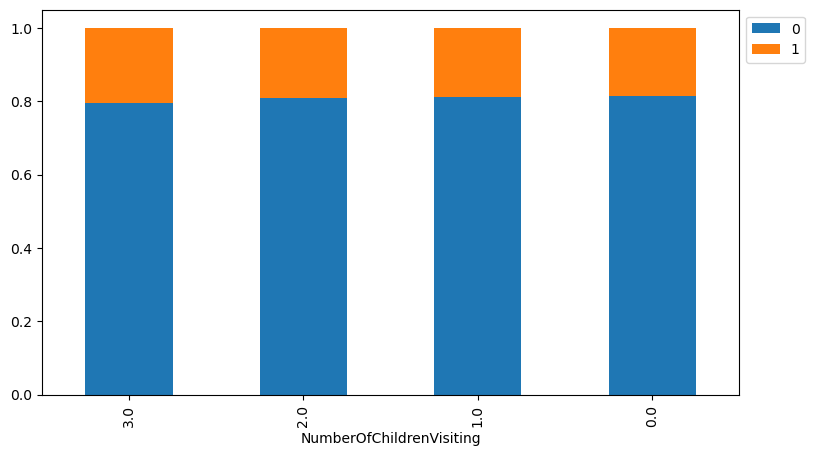

In [93]:
stacked_barplot(data, "NumberOfChildrenVisiting", "ProdTaken")

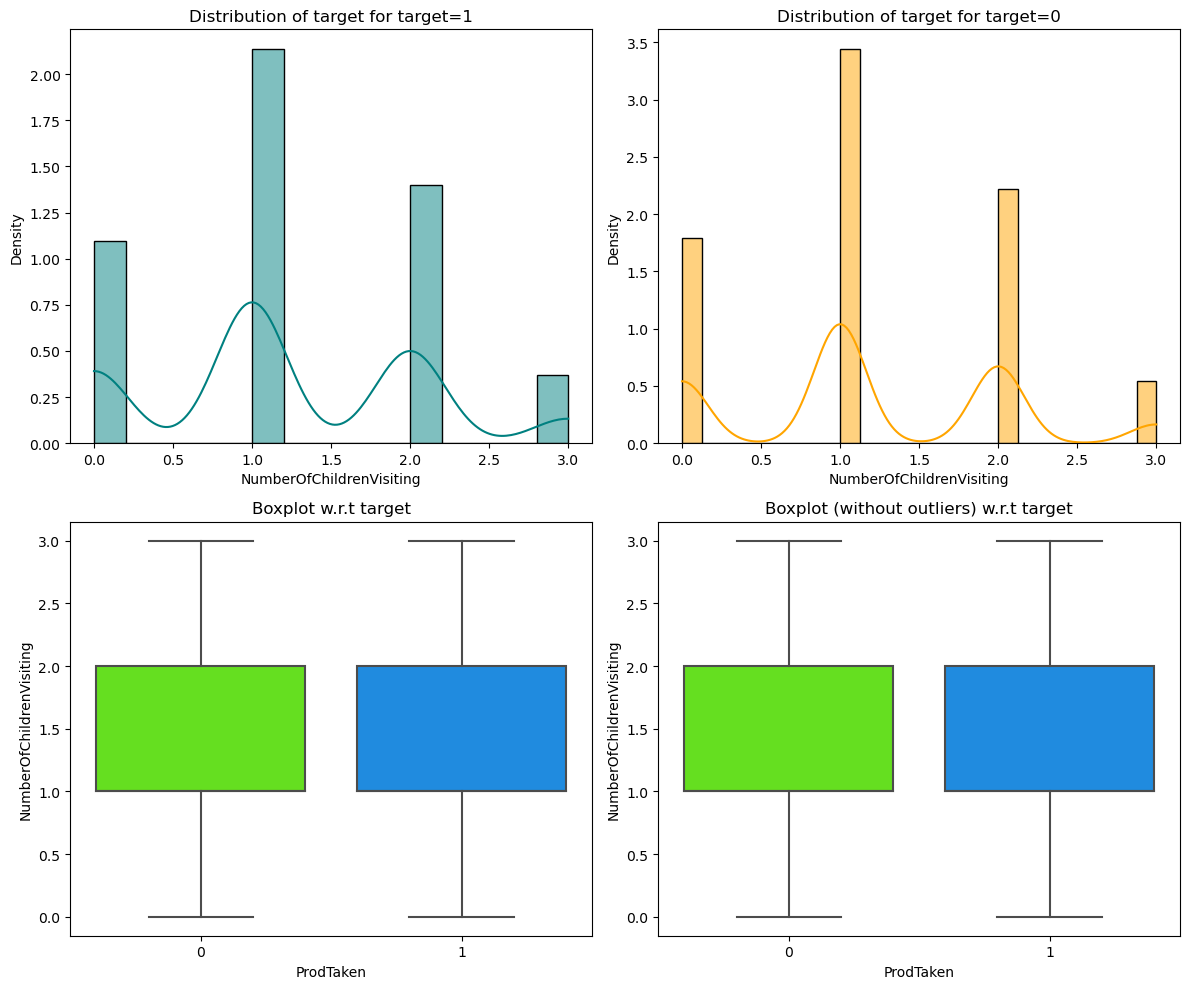

In [94]:
distribution_plot_wrt_target(data, "NumberOfChildrenVisiting", "ProdTaken")

**Designation vs ProdTaken**

ProdTaken          0    1   All
Designation                    
All             3853  894  4747
Executive       1260  540  1800
Manager         1486  198  1684
Senior Manager   594  120   714
VP               205   20   225
AVP              308   16   324
------------------------------------------------------------------------------------------------------------------------


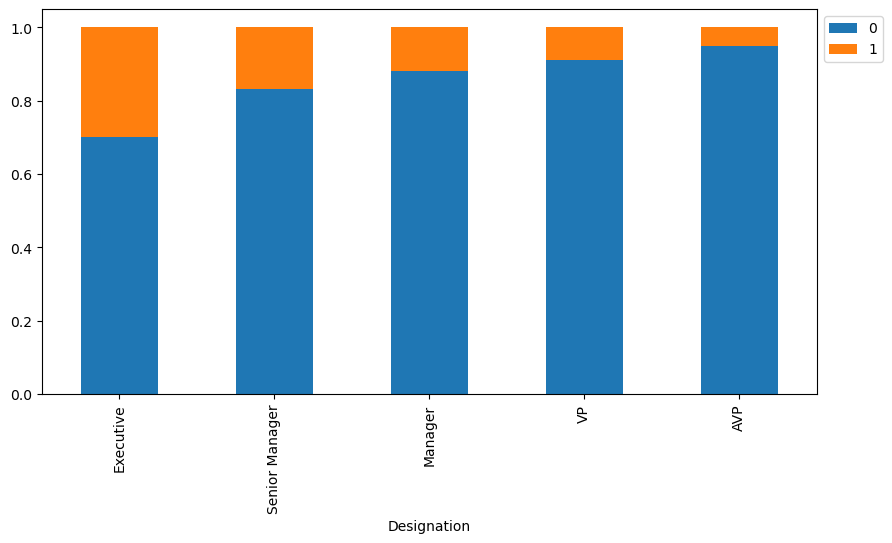

In [95]:
stacked_barplot(data, "Designation", "ProdTaken")

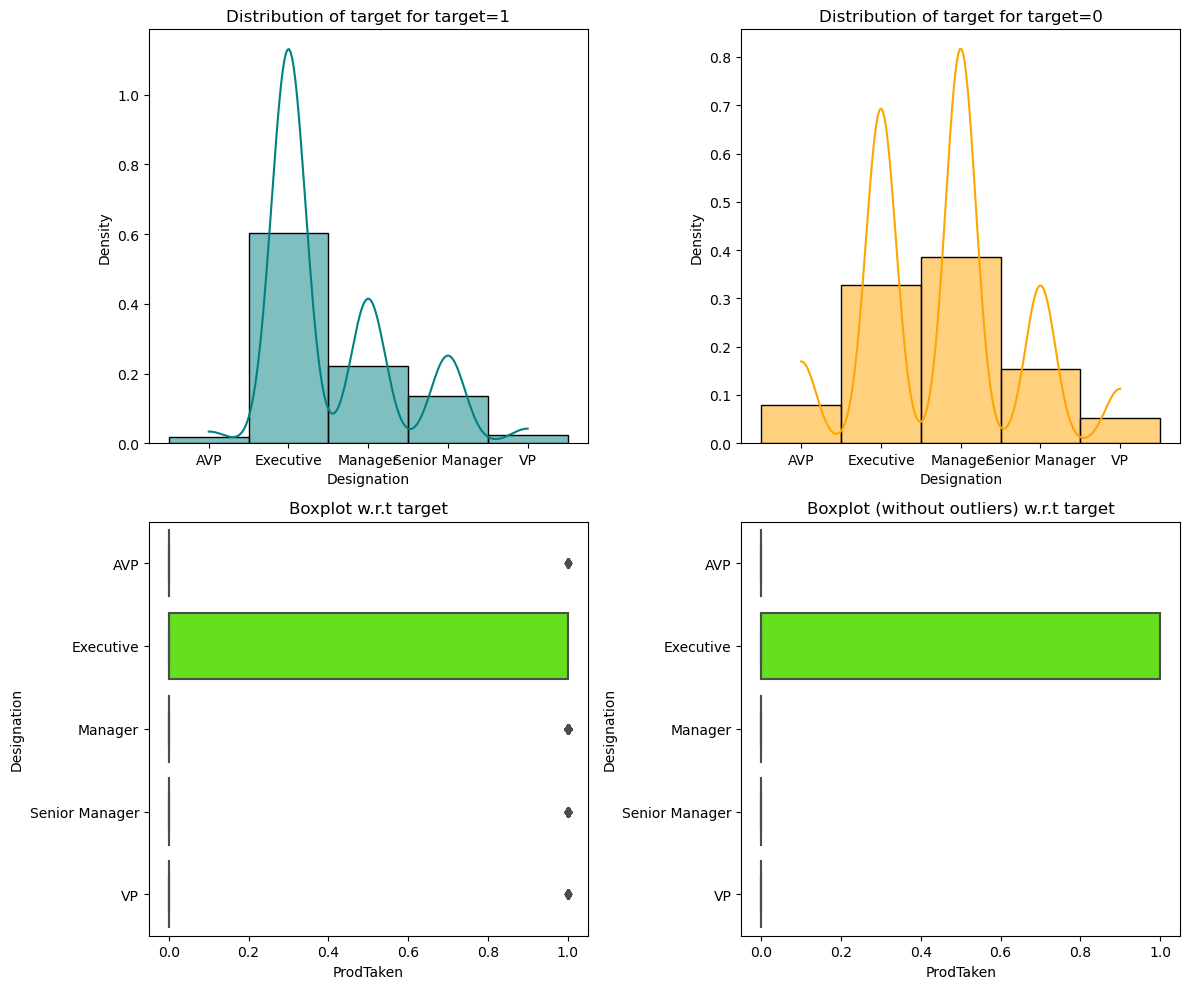

In [96]:
distribution_plot_wrt_target(data, "Designation", "ProdTaken")

**Monthly Income vs ProdTaken**

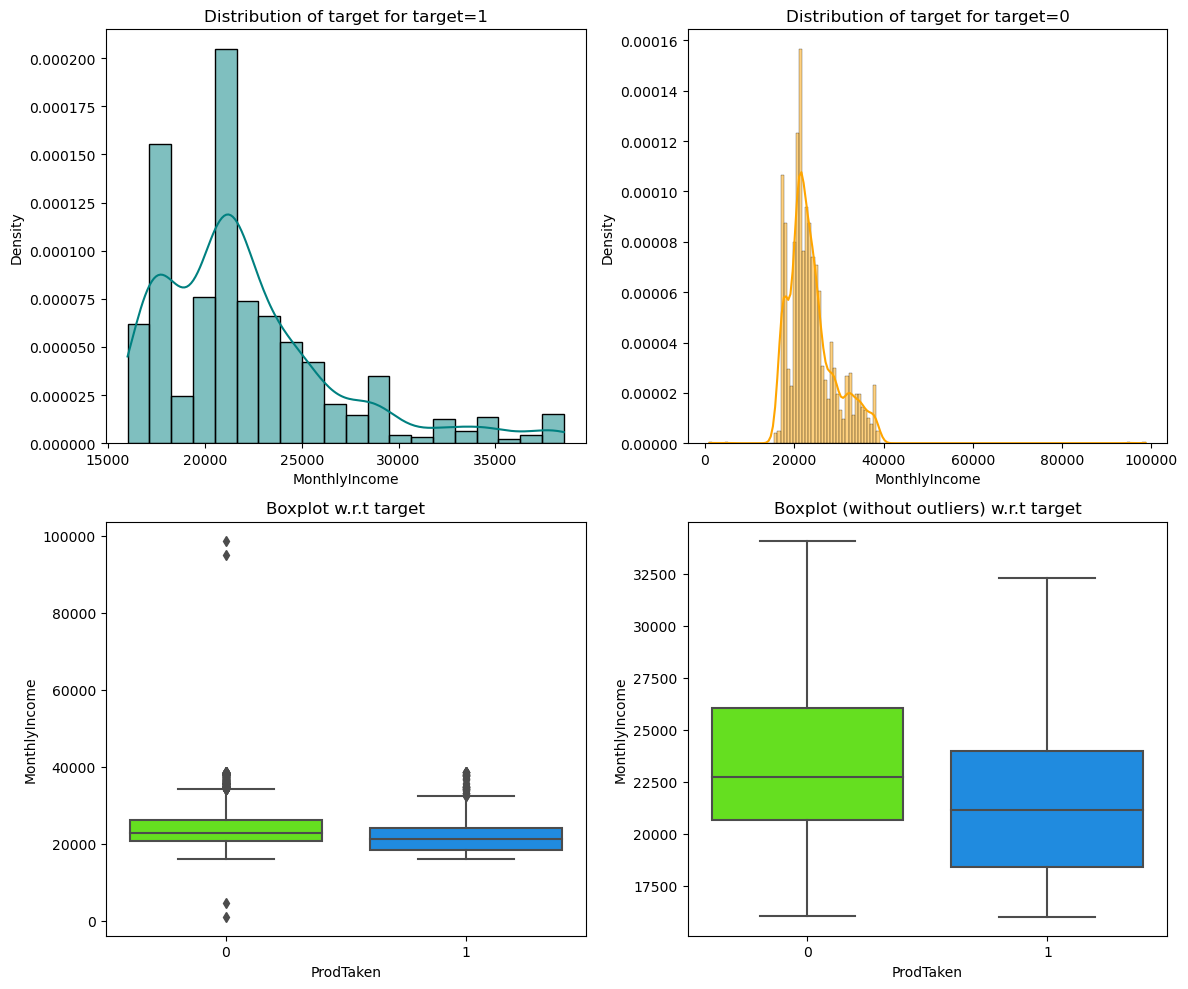

In [97]:
distribution_plot_wrt_target(data, "MonthlyIncome", "ProdTaken")

**Inferences**

* 70.5% of customers self-enquired about the packages.
* Most customers traveled with only one child.
* About 49% of customers have a salaried occupation.
* Approximately 35% of customers are in the age range of 31-40. The majority of customers are in the age range of 26-50.
* The majority of customers have a monthly income in the range of 20000-25000, with most falling in the range of 15000-30000.
* The majority of customers traveled with a group of 3 people.
* Approximately 38% of customers are classified as Executives, with 35% being managers.
* The duration of the pitch was surprisingly short, ranging from 10-40 minutes, for customers who purchased the product. There were some outliers in the duration of the pitch for customers who did not purchase the product.
* Of the customers, 18% accepted the product offered to them on the previous occasion.
* The basic package was offered to approximately 38% of customers, with 35% being offered the deluxe package.
* Most customers take 2 trips per year, although there have been some outliers with 22 trips.
* The number of trips taken by customers has some outliers, ranging from 17-20.
* The monthly income of customers has some extreme outliers. On average, customers who purchased the product have a monthly income in the range of 18000-23000.
* 61% of customers prefer properties that are rated 3 stars.
* Customers who purchased the product are mostly in the age range of 28-35.
* 62% of customers own a car.
* 48% of customers are married.
* 29% of customers have a passport.
* The majority of customers, around 65%, are from Tier 1 cities.
* The majority of customers were followed up 4 times.
* 60% of the customers are male.

**Correlation Check**

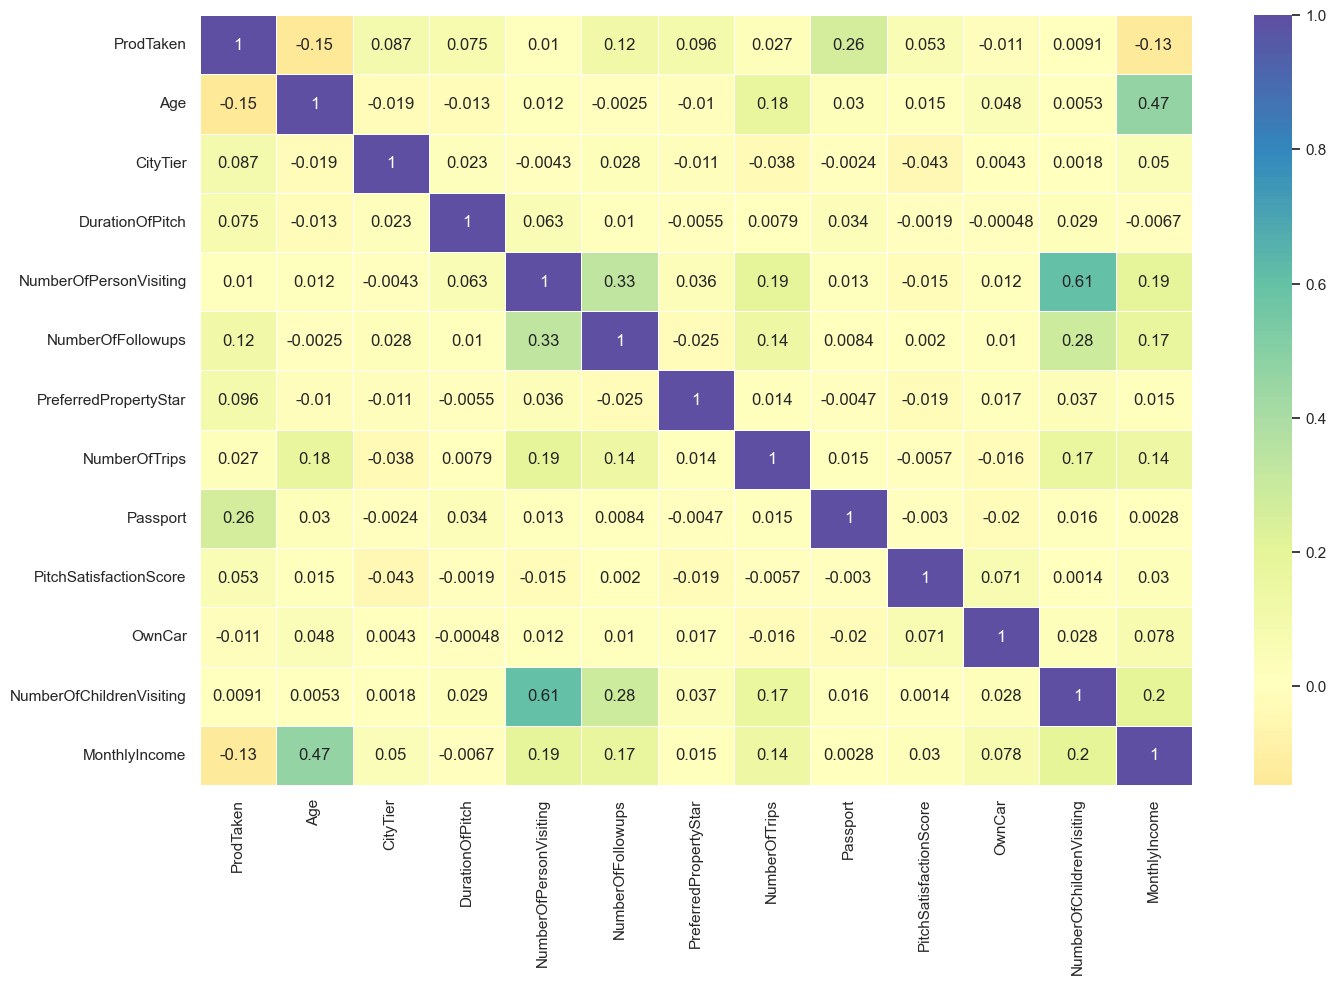

In [98]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cmap="Spectral")
plt.show()

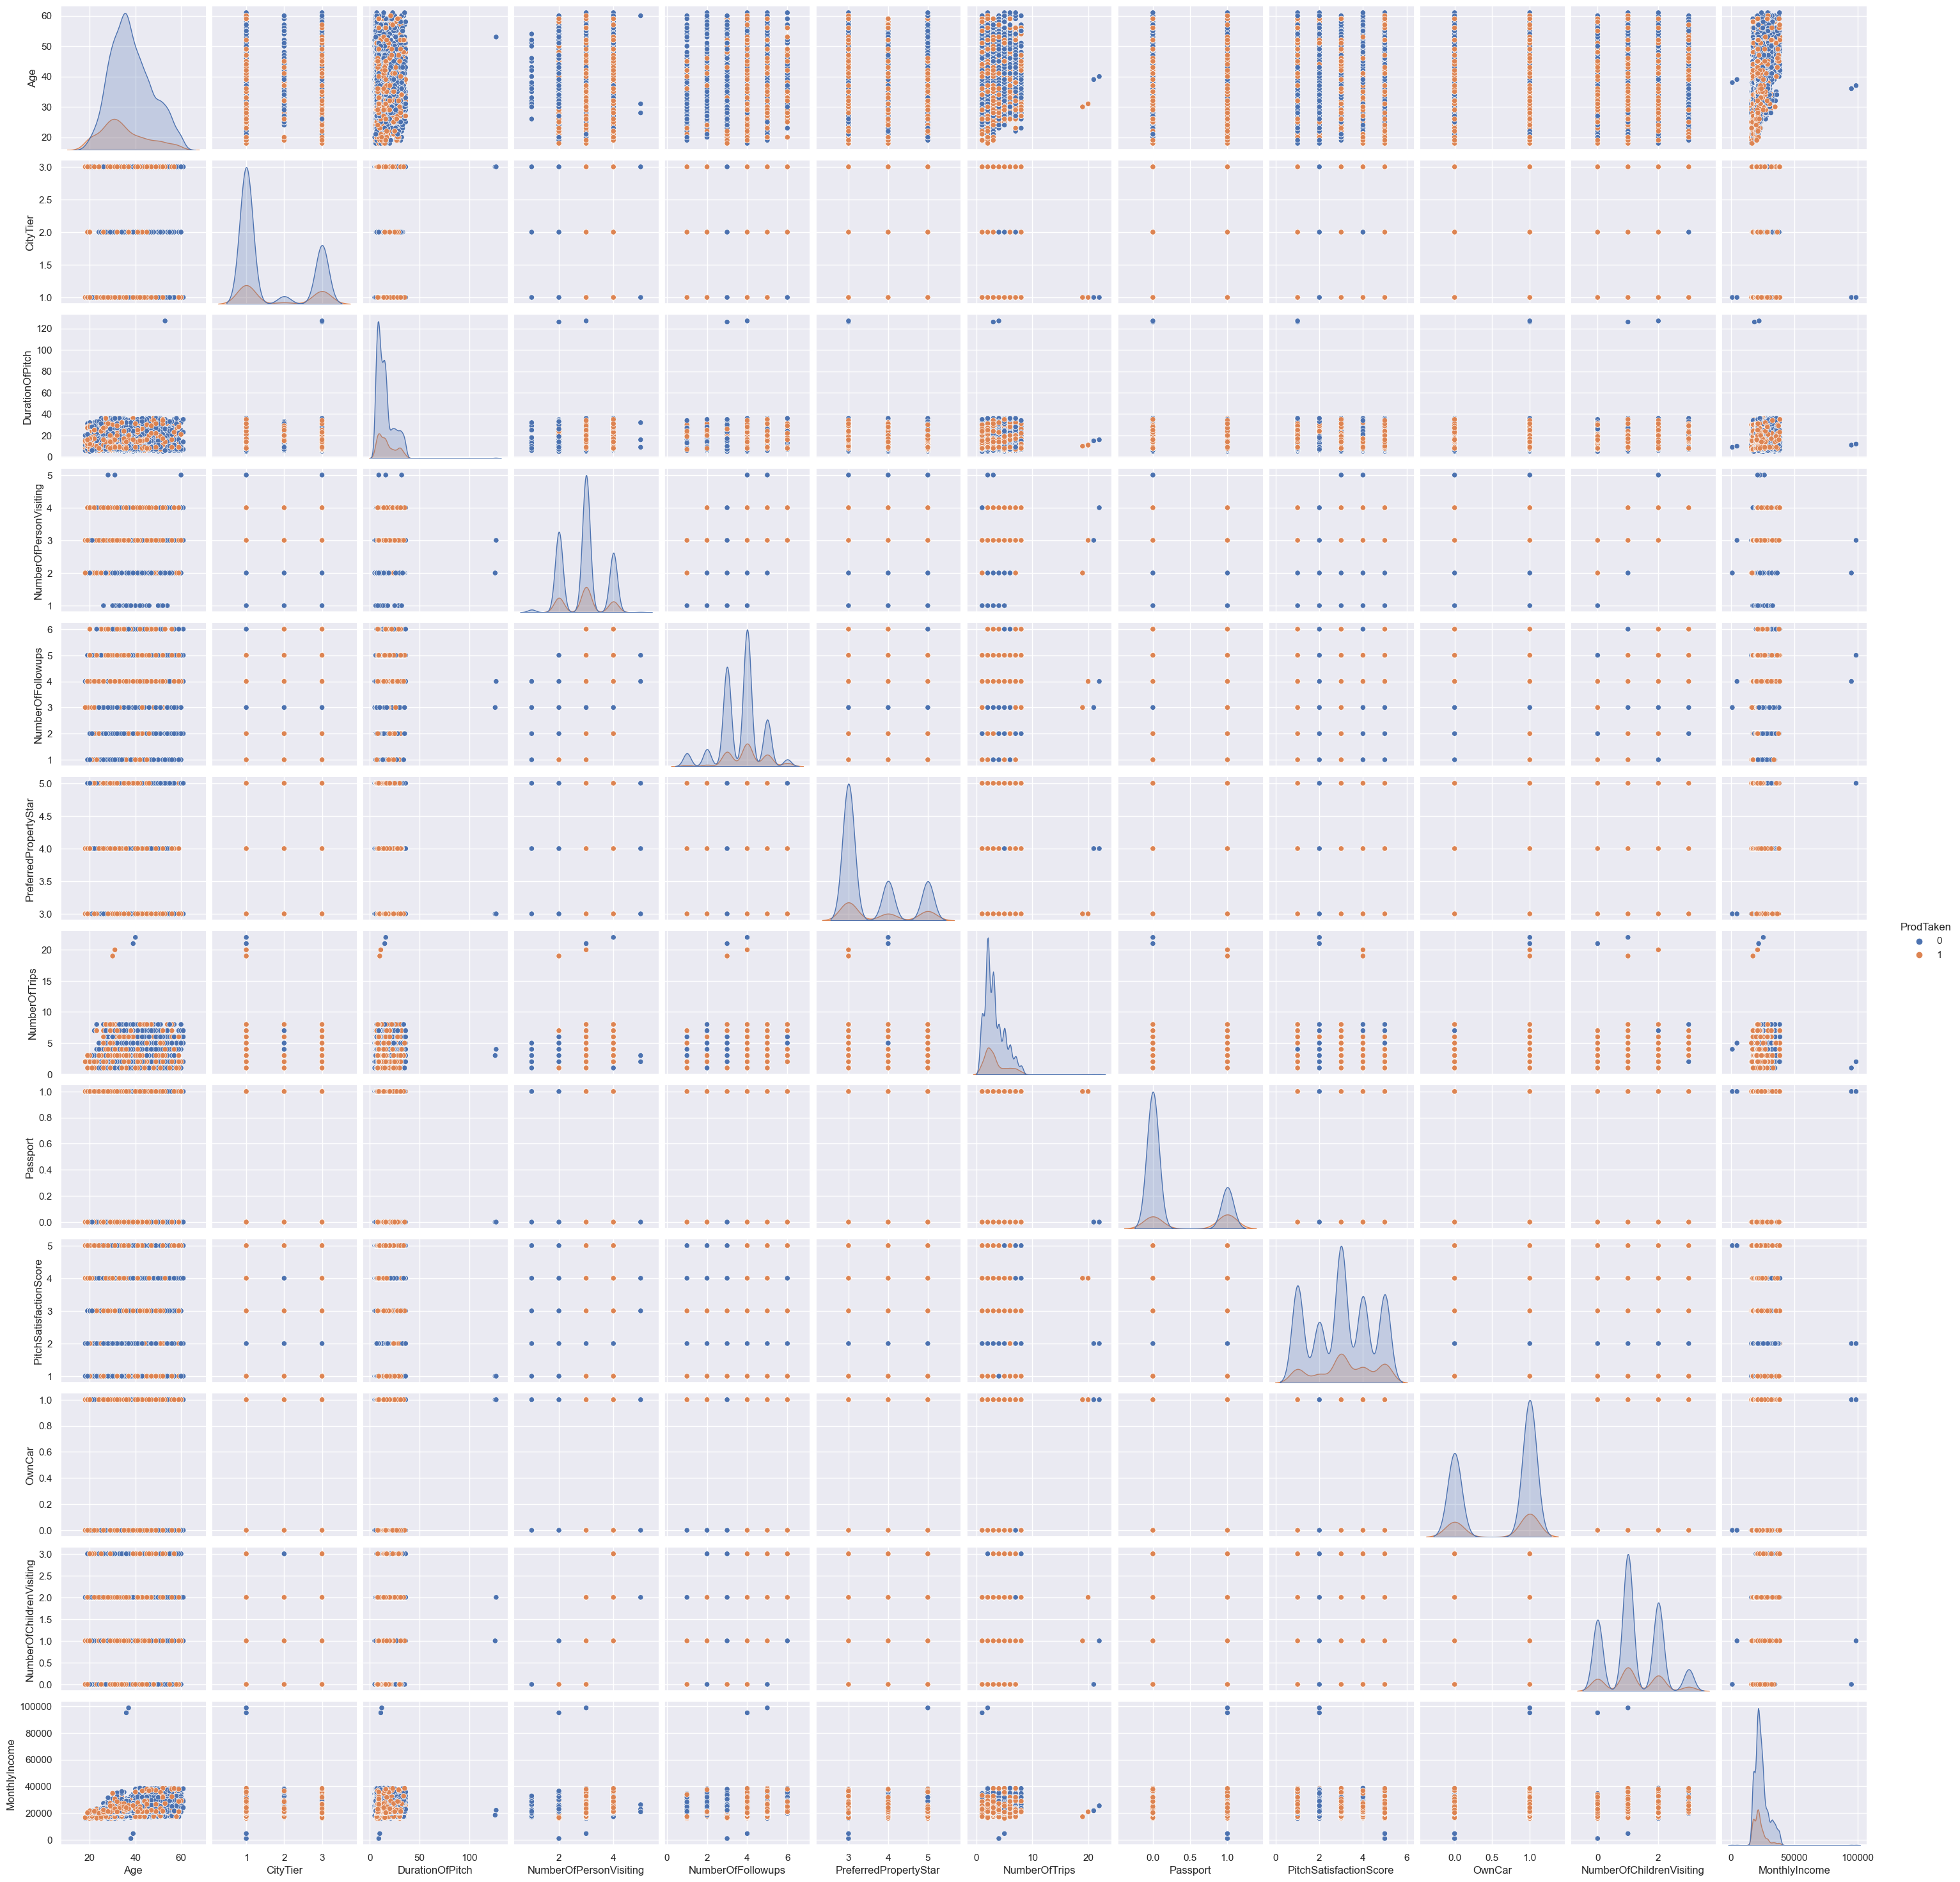

In [99]:
sns.pairplot(data,hue='ProdTaken')
plt.show()

**Inferences**

* A large proportion of customers who purchased the product held a passport, and single or unmarried individuals were more likely to buy the travel package.
* The majority of customers who made a purchase were executives or senior managers, and customers who were followed up 6 times had a higher likelihood of making a purchase.
* Customers who took 7 to 8 trips also had a higher probability of purchasing the packages.
* Gender, number of children traveling, and car ownership seemed to have little impact on purchasing the package.
* Customers with a monthly income in the range of 15000-20000 had the highest rate of purchasing the product, followed by those in the range of 20000-25000.
* The age group of 18-25 had the highest rate of purchasing the product, followed by 26-30.
* Customers who were offered the basic package had the highest rate of purchasing, followed by those who were pitched the standard package. This may be due to its lower cost.
* The majority of customers who purchased the product had 2 to 4 travelers in their group, and most of these customers were invited by the company and preferred 5-star rated properties, mostly from Tier 2 or Tier 3 cities.
* Freelancers and large business owners had a higher probability of purchasing the travel package, but more data is needed to confirm this.
* Customers were more likely to purchase the travel package when they were followed up by the marketing team with a high number of follow-ups, a longer duration of the pitch, and were pitched the basic product.


## Data Preprocessing

### Missing value treatment

In [100]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             246
MonthlyIncome               224
Age                         216
NumberOfTrips               138
NumberOfChildrenVisiting     60
NumberOfFollowups            44
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [101]:
data['TypeofContact'].mode()

0    Self Enquiry
Name: TypeofContact, dtype: category
Categories (2, object): ['Company Invited', 'Self Enquiry']

In [102]:
data['TypeofContact']=data['TypeofContact'].fillna('Self Enquiry')

In [103]:
data.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()

Occupation      Designation     Gender
Free Lancer     AVP             Female         NaN
                                Male           NaN
                Executive       Female         NaN
                                Male     18929.000
                Manager         Female         NaN
                                Male           NaN
                Senior Manager  Female         NaN
                                Male           NaN
                VP              Female         NaN
                                Male           NaN
Large Business  AVP             Female   31872.000
                                Male     29959.000
                Executive       Female   20748.000
                                Male     20736.000
                Manager         Female   22198.500
                                Male     22379.000
                Senior Manager  Female   28266.000
                                Male     26838.500
                VP              Female   36

In [104]:
data["MonthlyIncome"]=data.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

In [105]:
data['PreferredPropertyStar']=data.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

In [106]:
numeric_cols = [
    "Age",
    "NumberOfTrips",
    "NumberOfChildrenVisiting",
    "NumberOfFollowups",
    "DurationOfPitch",
]

for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

data.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

In [107]:
data.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4747 non-null   float64 
 2   TypeofContact             4747 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4747 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4747 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4747 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4747 non-null   float64 
 13  Passport                  4747 non-null   int64 

### Outlier Detection and Treatment

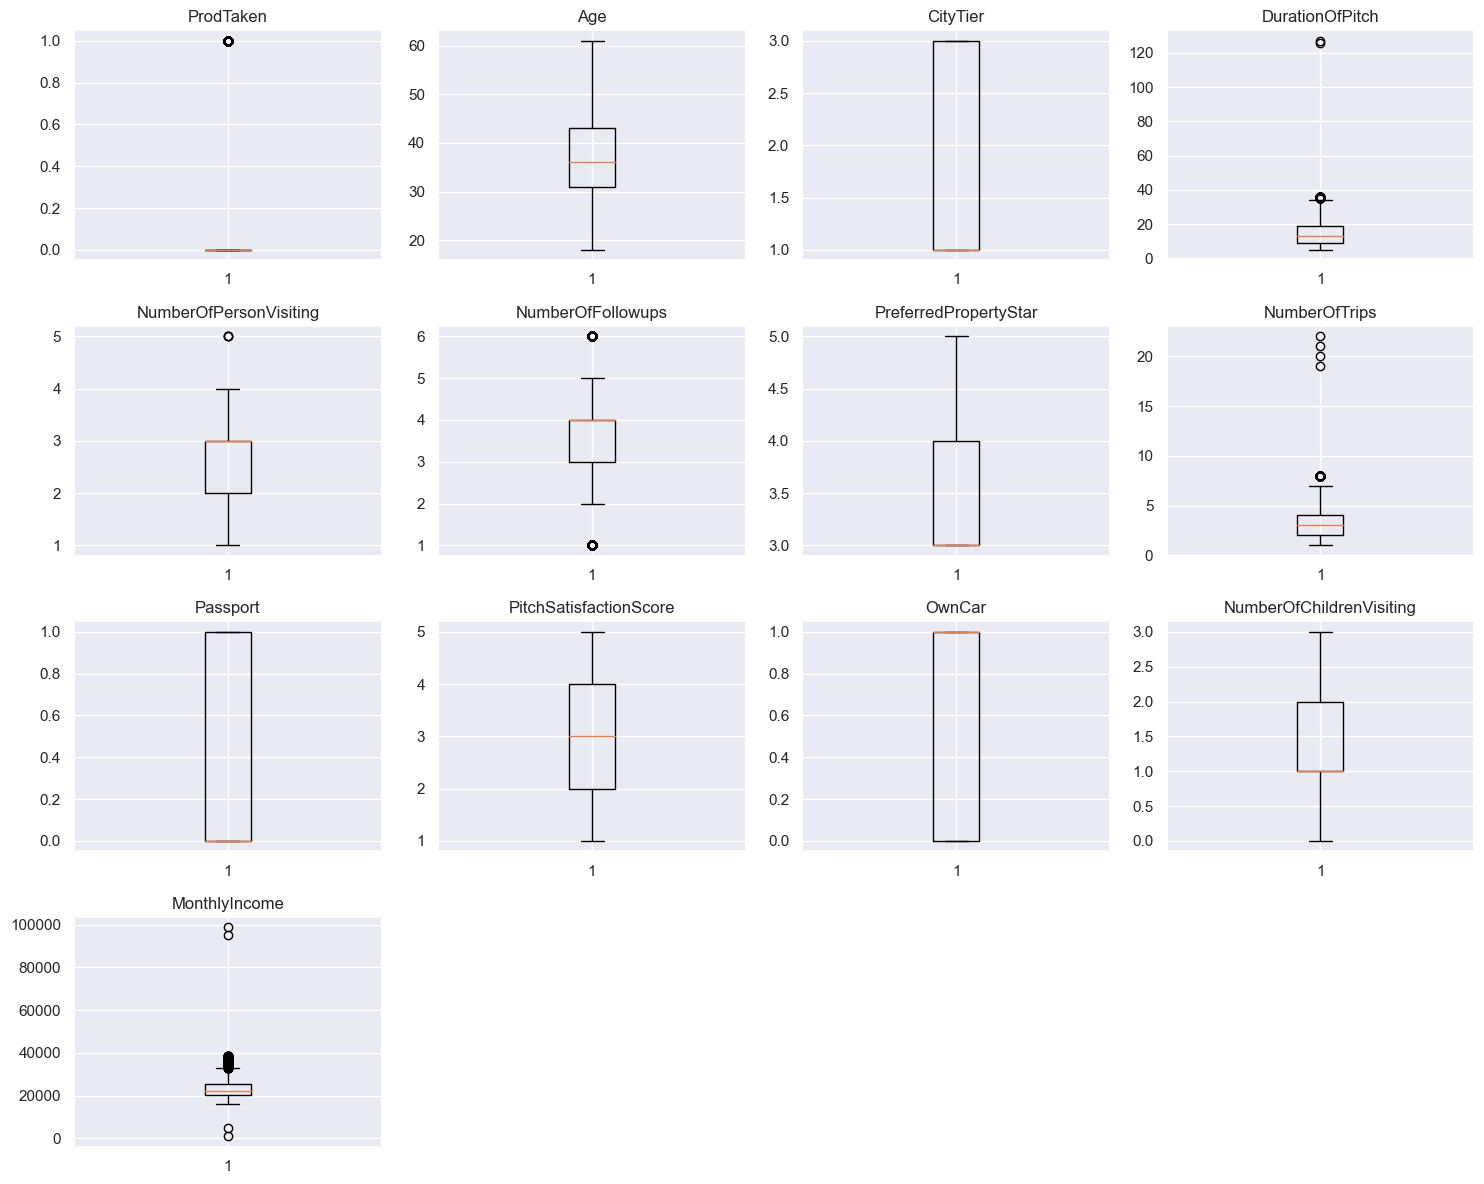

In [109]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [110]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [111]:
((data.select_dtypes(include=["float64", "int64"]) < lower)|(data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

ProdTaken                  18.833
Age                         0.000
CityTier                    0.000
DurationOfPitch             2.275
NumberOfPersonVisiting      0.063
NumberOfFollowups           6.530
PreferredPropertyStar       0.000
NumberOfTrips               2.233
Passport                    0.000
PitchSatisfactionScore      0.000
OwnCar                      0.000
NumberOfChildrenVisiting    0.000
MonthlyIncome               7.584
dtype: float64

In [112]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

In [113]:

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)

### Data Preparataion for model building

In [114]:
#Removing customer interaction data from independent variables
X = data.drop(["ProdTaken", 'PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'], axis=1)
y = data["ProdTaken"]

In [115]:
X = pd.get_dummies(X, 
                   columns=[
                       "TypeofContact",
                       "Occupation",
                       "Gender",
                       "MaritalStatus",
                       "Designation"
                   ], 
                   drop_first=True)

In [116]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [117]:
X_train.shape, X_test.shape

((3318, 21), (1423, 21))

In [118]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3318, 21)
Shape of test set :  (1423, 21)
Percentage of classes in training set:
0   0.807
1   0.193
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0   0.824
1   0.176
Name: ProdTaken, dtype: float64


In [119]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [120]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
        
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
        cols = ['Metric', 'Score']
        records = [(name, score) for name, score in zip(metric_names, score_list)]
        display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)

    return score_list # returning the list with train and test scores

### Model evaluation criterion

### Model can make wrong predictions as:

* False Positive: Predicting a customer will take the tour package but in reality the customer will not take the tour package - Loss of resources
* False Negative: Predicting a customer will NOT take the tour package but in reality the customer will take the tour package - Loss of buisness opportunity

### Which case is more important? 
* Losing a potential customer by predicting that the customer will NOT take the tour package but in reality the customer will take the tour package - False Negative.

### How to reduce this loss i.e need to reduce False Negatives?

* Tourism company would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

## Bagging Classifier

### Decision Tree Model

In [121]:
#Fitting the model
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

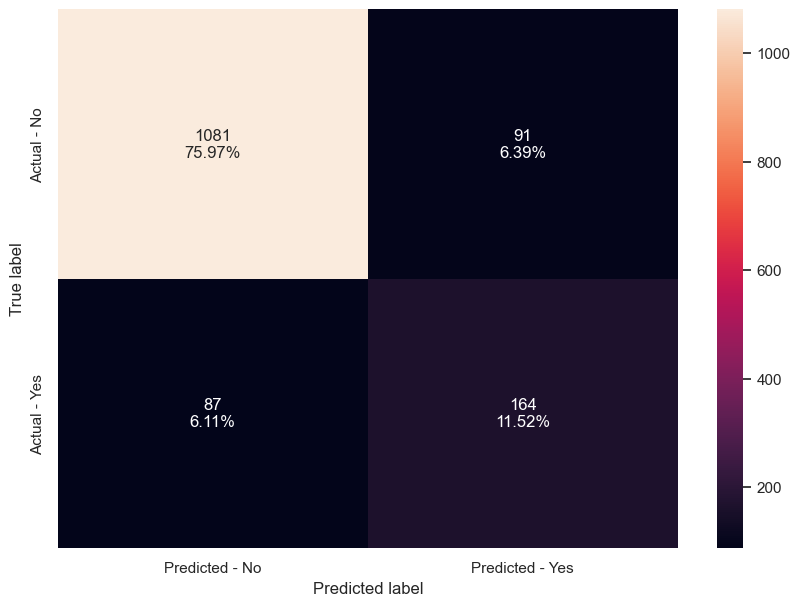

In [122]:
make_confusion_matrix(dtree,y_test)

In [123]:
get_metrics_score(dtree)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            1.000          0.875         1.000        0.653   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             1.000           0.643           1.000          0.648

[1.0,
 0.8749121574139143,
 1.0,
 0.6533864541832669,
 1.0,
 0.6431372549019608,
 1.0,
 0.6482213438735178]

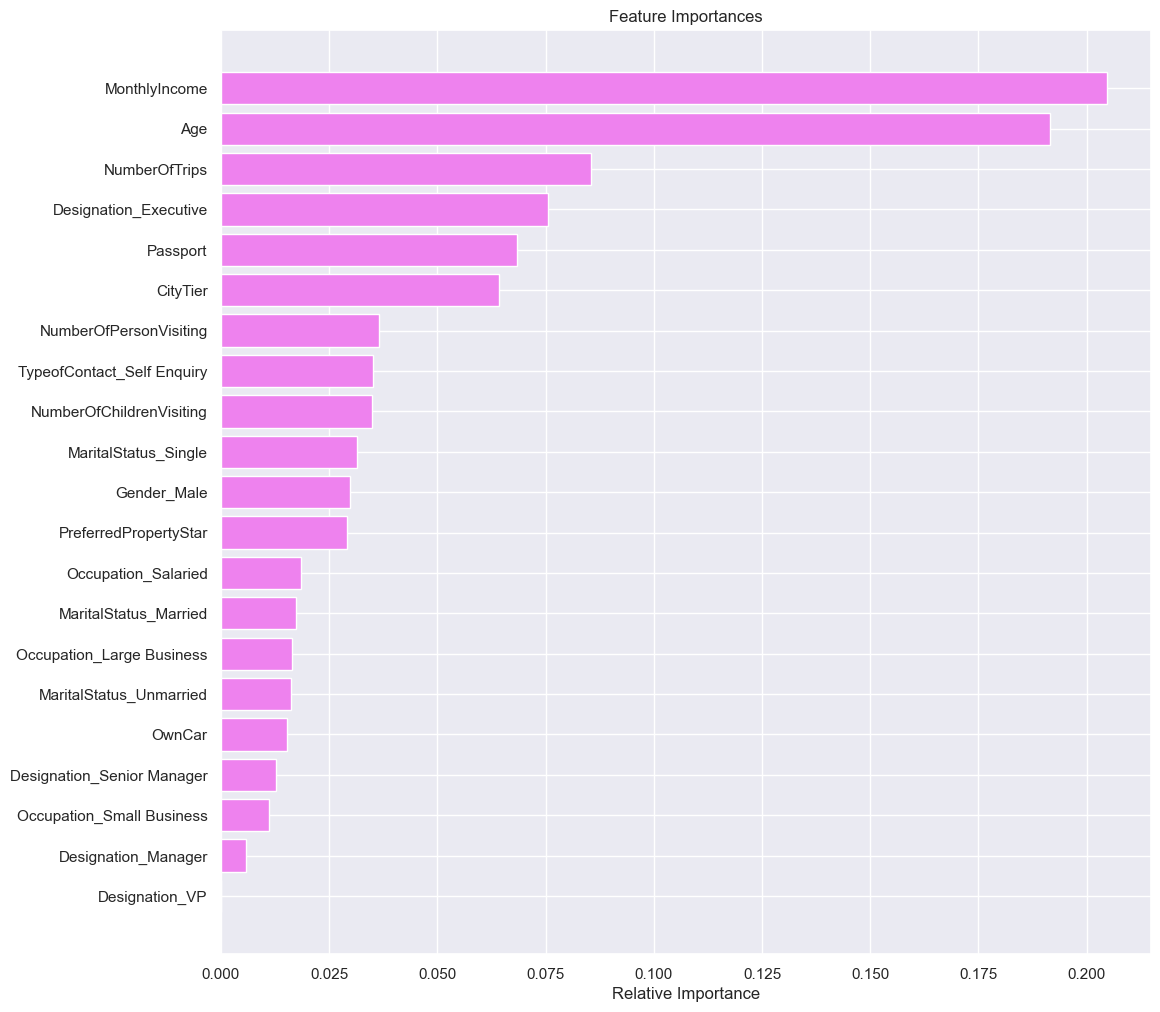

In [124]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [125]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'CityTier', 'NumberOfPersonVisiting', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


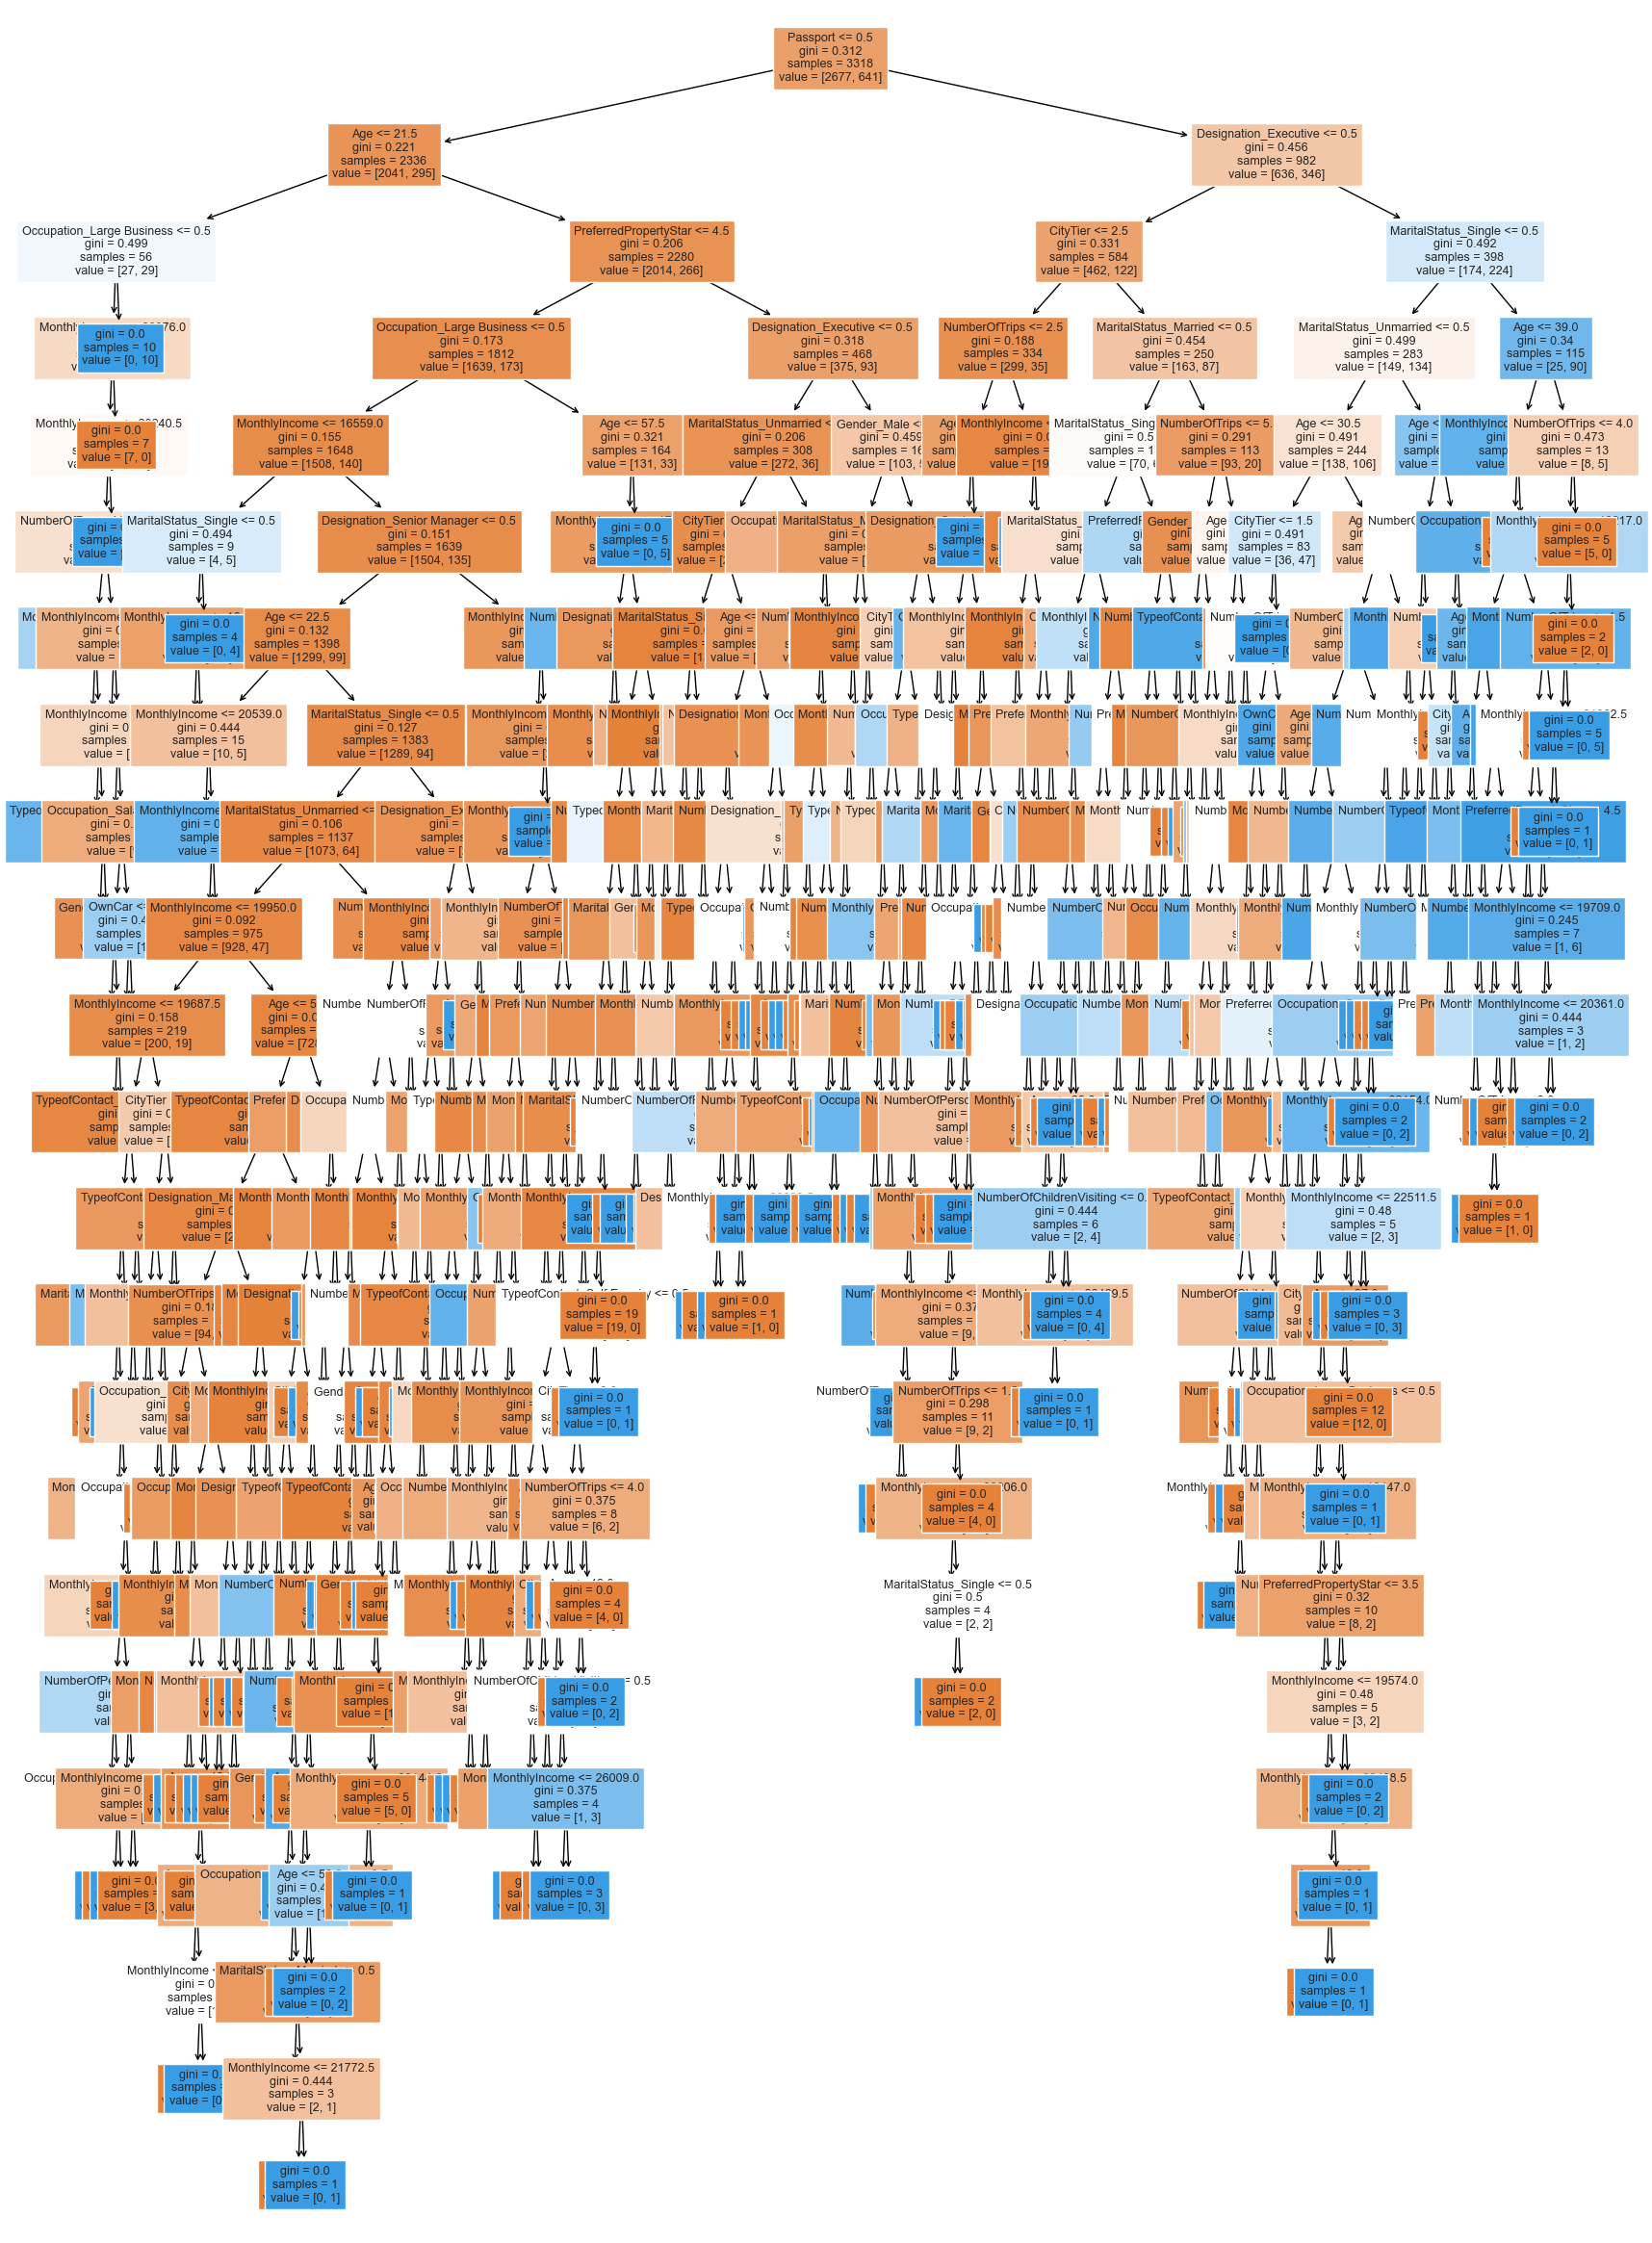

In [126]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Random Forest Model

In [127]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

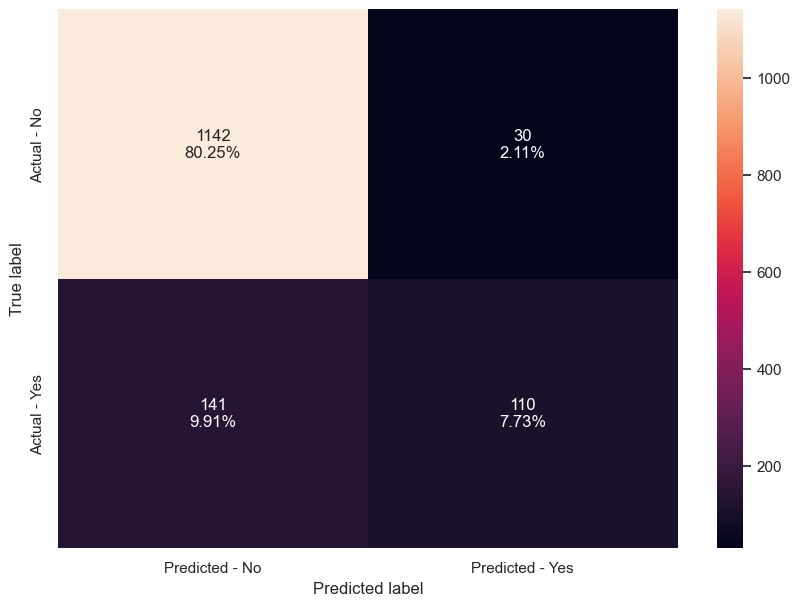

In [128]:
make_confusion_matrix(rf,y_test)

In [129]:
get_metrics_score(rf)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            1.000          0.880         1.000        0.438   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             1.000           0.786           1.000          0.563

[1.0,
 0.8798313422347154,
 1.0,
 0.43824701195219123,
 1.0,
 0.7857142857142857,
 1.0,
 0.5626598465473146]

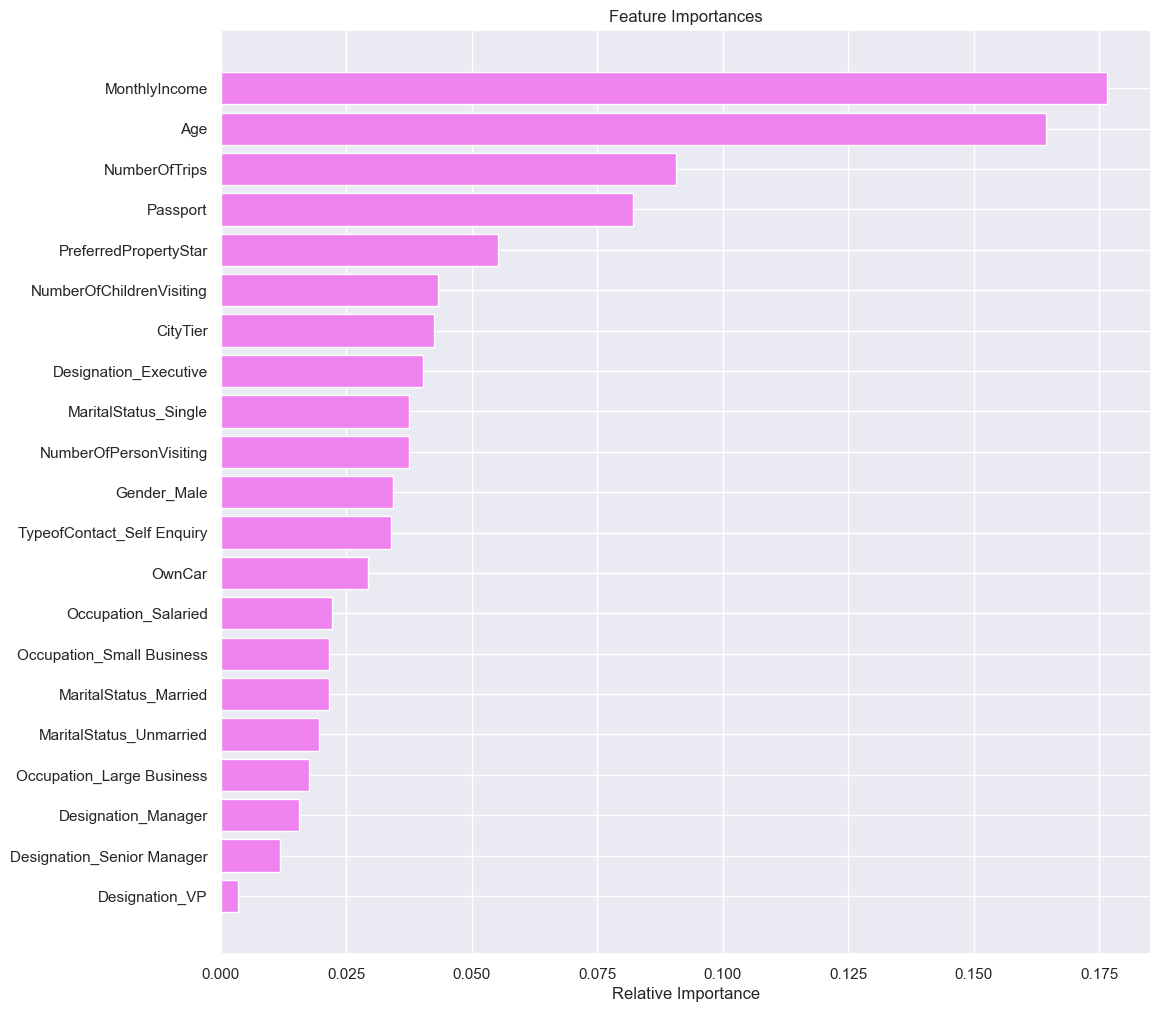

In [130]:
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Bagging Classifier

In [131]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

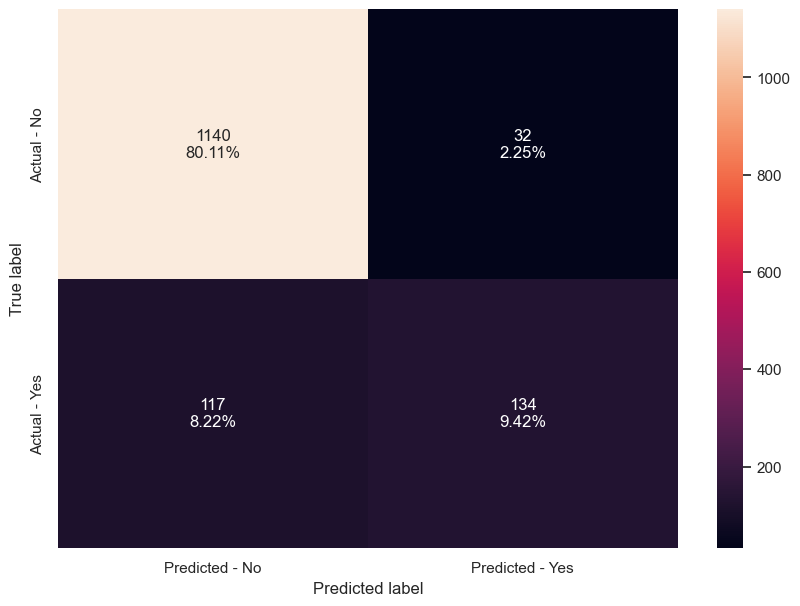

In [132]:
make_confusion_matrix(bagging,y_test)

In [133]:
get_metrics_score(bagging)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.988          0.895         0.944        0.534   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.993           0.807           0.968          0.643

[0.9879445449065702,
 0.8952916373858046,
 0.9438377535101404,
 0.5338645418326693,
 0.993431855500821,
 0.8072289156626506,
 0.9680000000000001,
 0.6426858513189448]

### Hyperparameter Tuning - Decision Tree Model

In [134]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.185,1:0.815},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.185, 1: 0.815}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

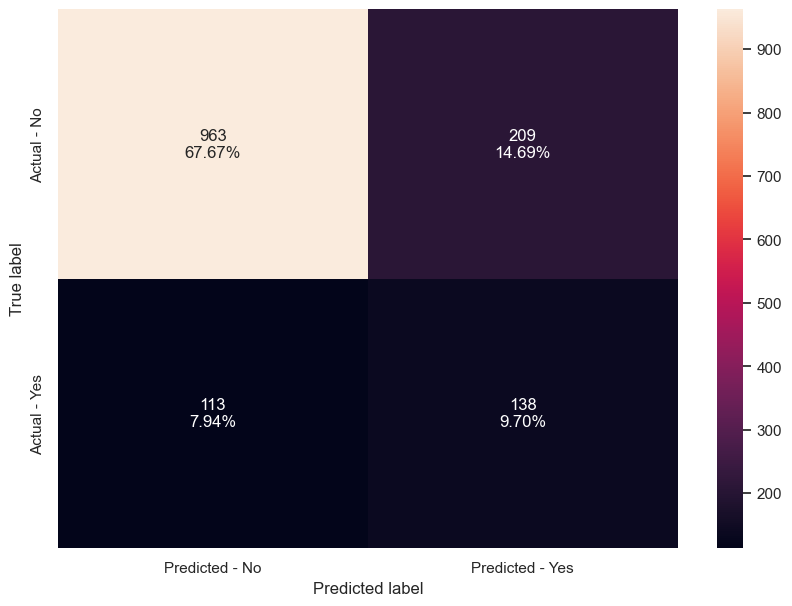

In [135]:
make_confusion_matrix(dtree_tuned,y_test)

In [136]:
get_metrics_score(dtree_tuned)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.780          0.774         0.621        0.550   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.450           0.398           0.522          0.462

[0.7802893309222423,
 0.7737174982431483,
 0.6209048361934477,
 0.549800796812749,
 0.4502262443438914,
 0.3976945244956772,
 0.5219672131147541,
 0.4615384615384615]

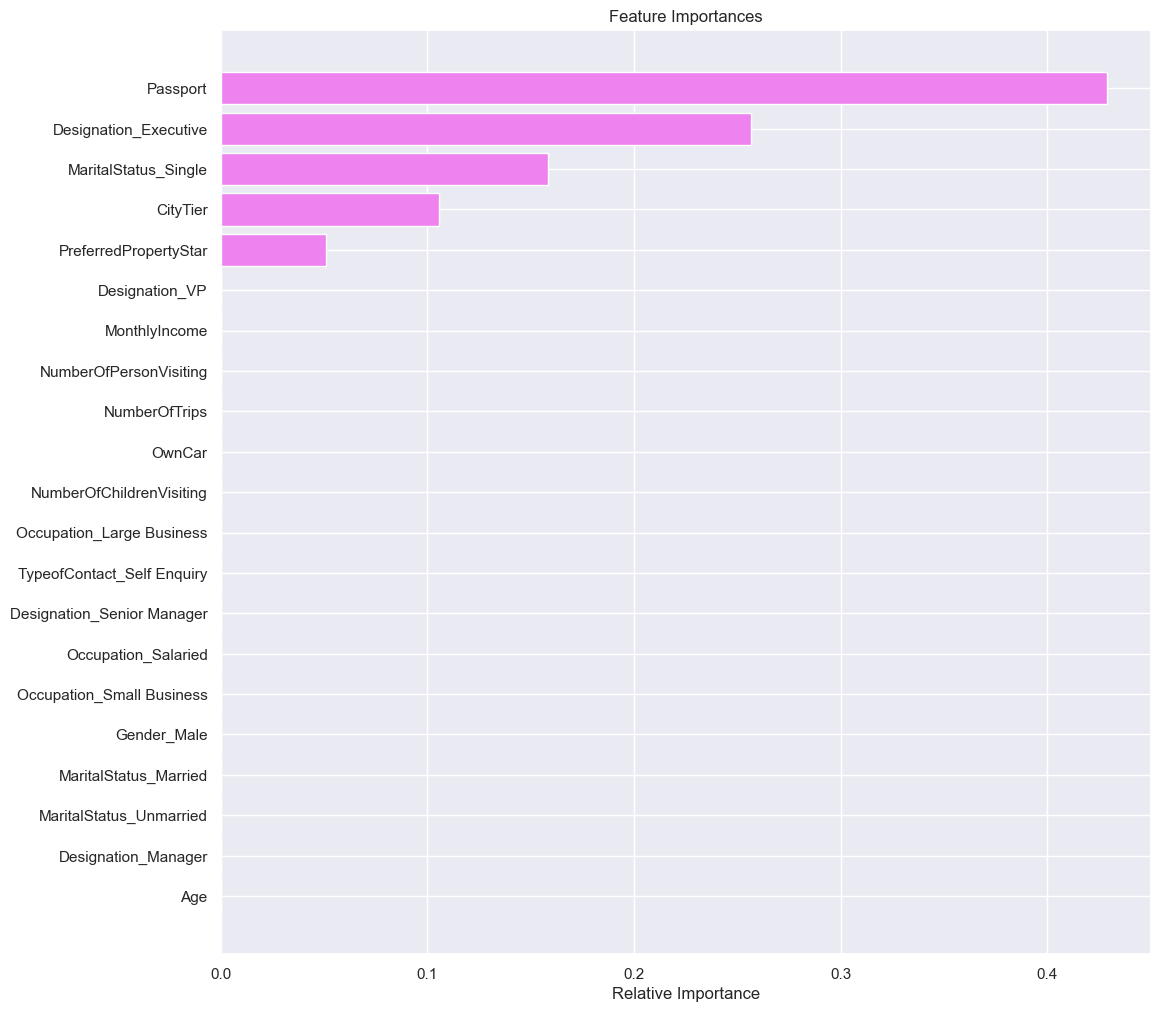

In [137]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

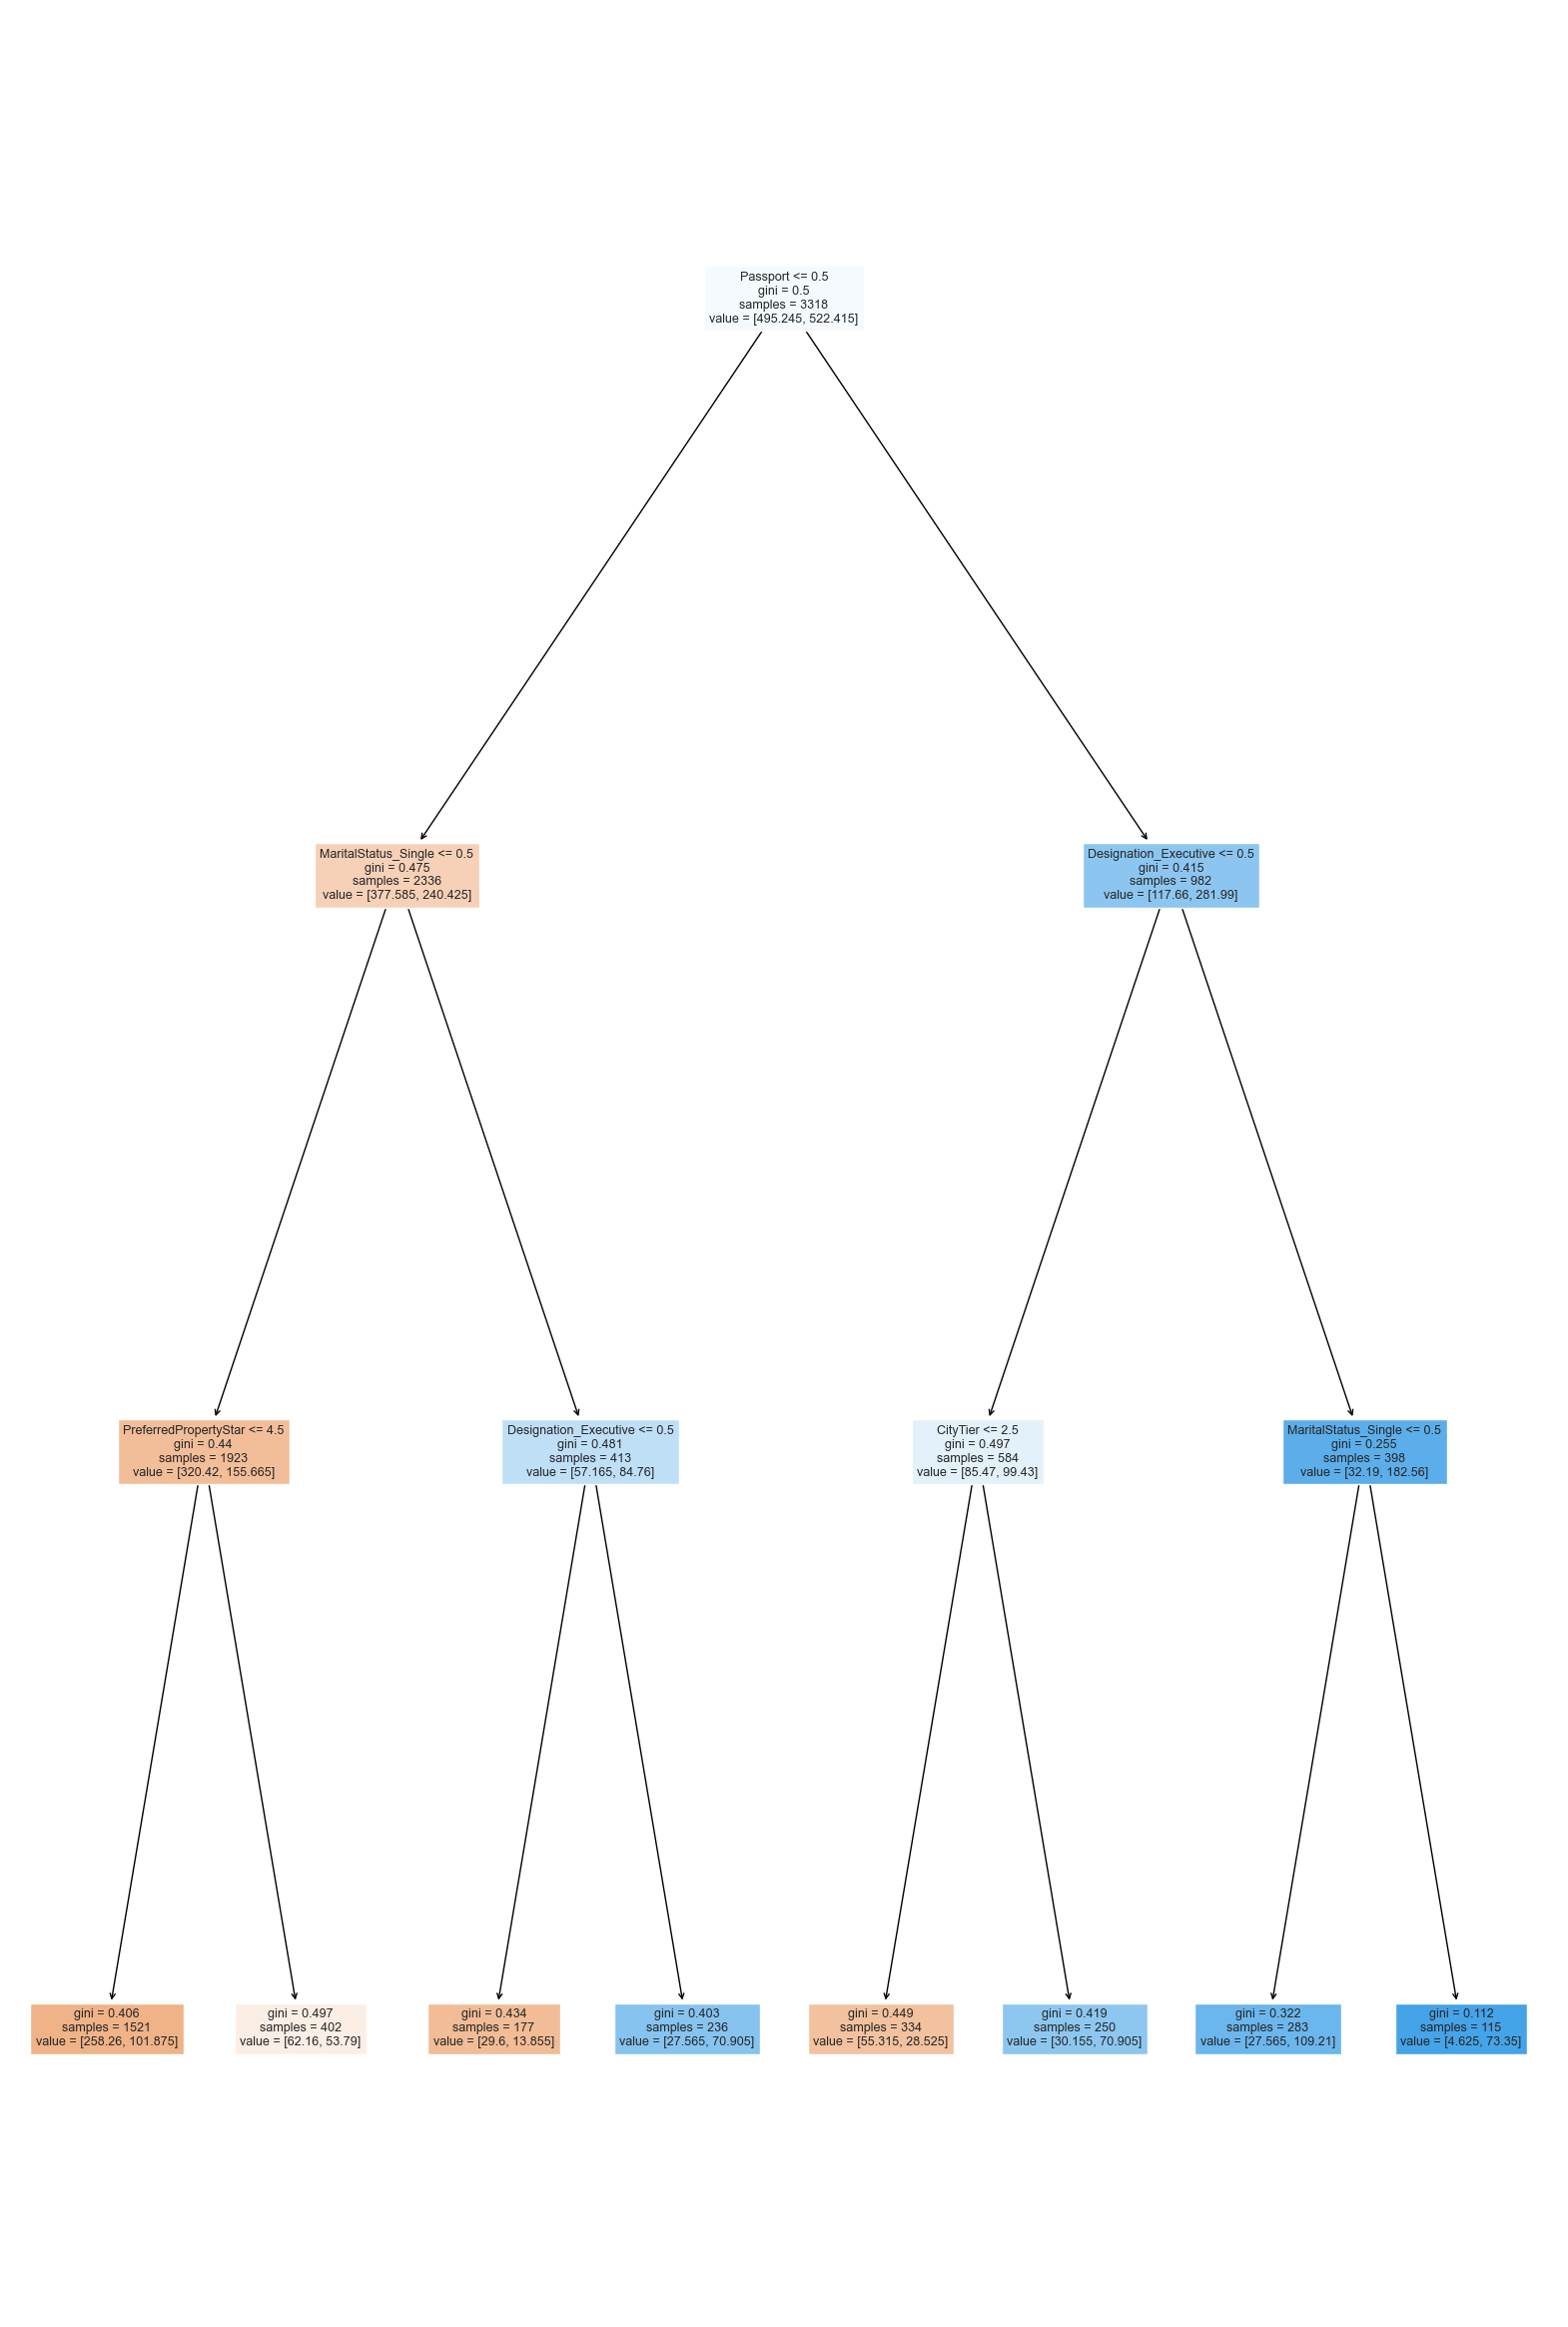

In [138]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Hyperparameter Tuning - Random Forest Model

In [139]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=20,
                       max_features=None, min_samples_split=7, n_estimators=50,
                       oob_score=True, random_state=1)

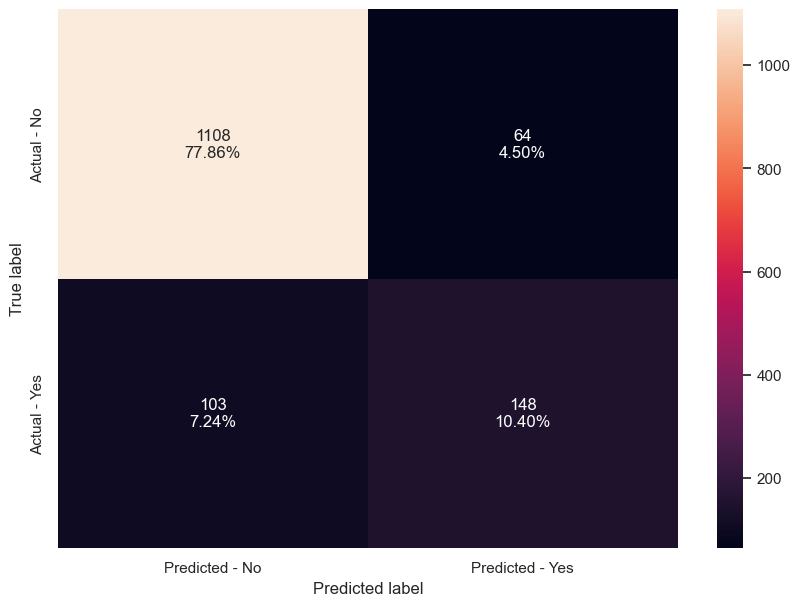

In [140]:
make_confusion_matrix(rf_tuned,y_test)

In [141]:
get_metrics_score(rf_tuned)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.987          0.883         0.992        0.590   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.945           0.698           0.968          0.639

[0.9873417721518988,
 0.8826423049894588,
 0.9921996879875195,
 0.5896414342629482,
 0.9450222882615156,
 0.6981132075471698,
 0.9680365296803652,
 0.6393088552915767]

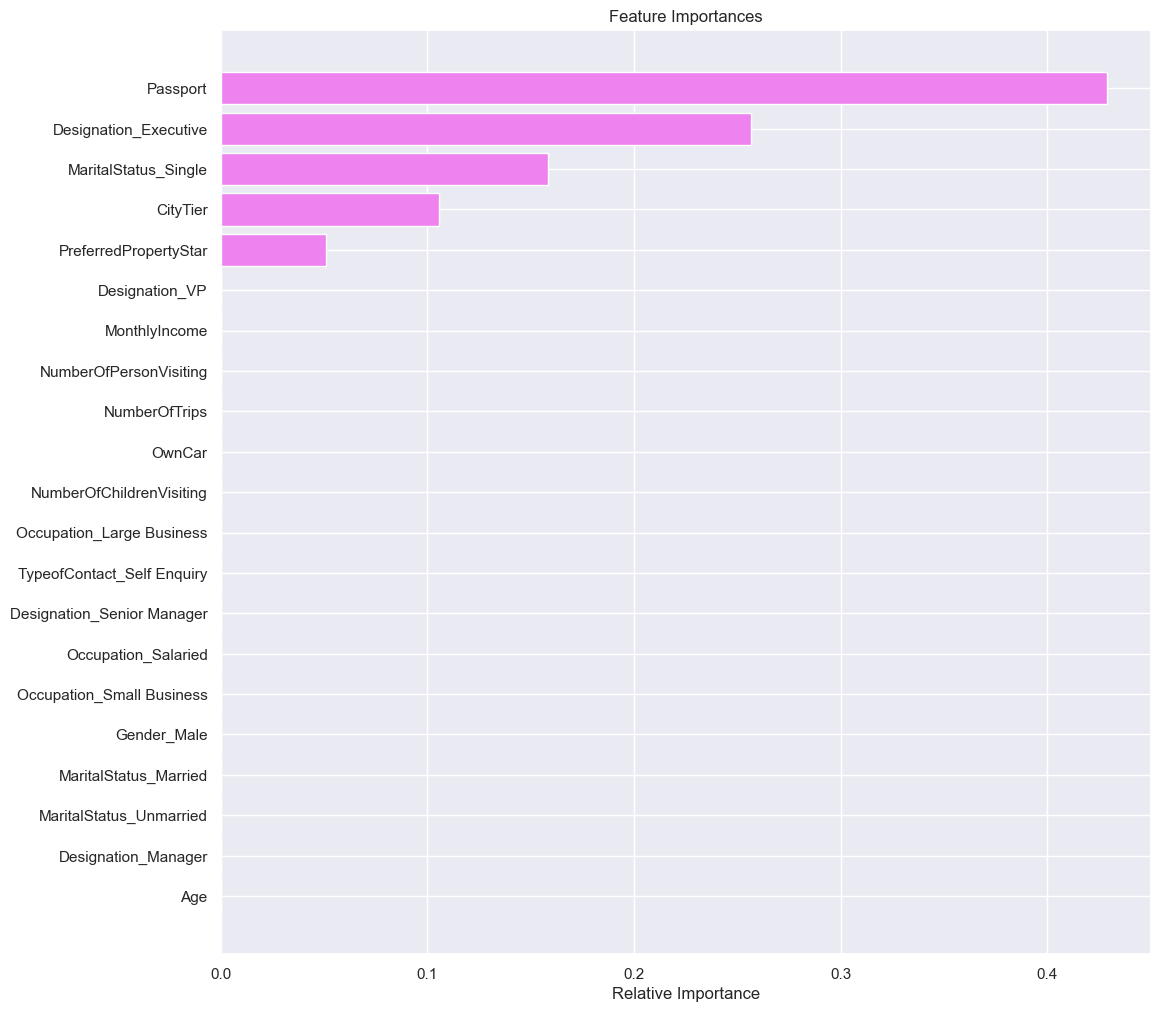

In [142]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [143]:
print(len(feature_names))

21


In [144]:
print(len(indices))

21


### Hyperparameter Tuning - Bagging Classifier

In [145]:
# Choose the type of classifier. 
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

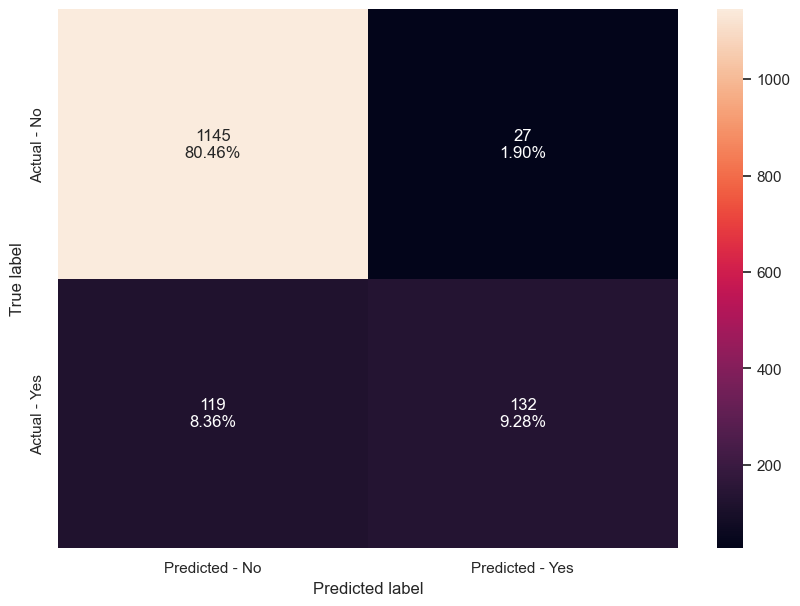

In [146]:
make_confusion_matrix(bagging_tuned,y_test)

In [147]:
get_metrics_score(bagging_tuned)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.996          0.897         0.983        0.526   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.998           0.830           0.991          0.644

[0.9963833634719711,
 0.8973998594518623,
 0.982839313572543,
 0.5258964143426295,
 0.9984152139461173,
 0.8301886792452831,
 0.9905660377358491,
 0.6439024390243903]

## Boosting Classifier

### Ada Booster Classifier

In [148]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

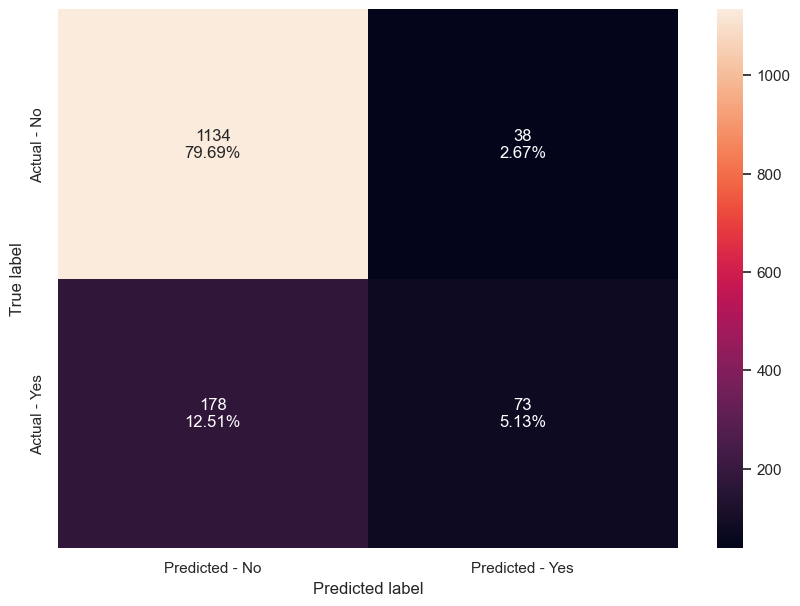

In [149]:
make_confusion_matrix(abc,y_test)

In [150]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(abc)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.838          0.848         0.292        0.291   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.693           0.658           0.411          0.403

[0.8381555153707052,
 0.848208011243851,
 0.2917316692667707,
 0.2908366533864542,
 0.6925925925925925,
 0.6576576576576577,
 0.4105378704720088,
 0.40331491712707185]

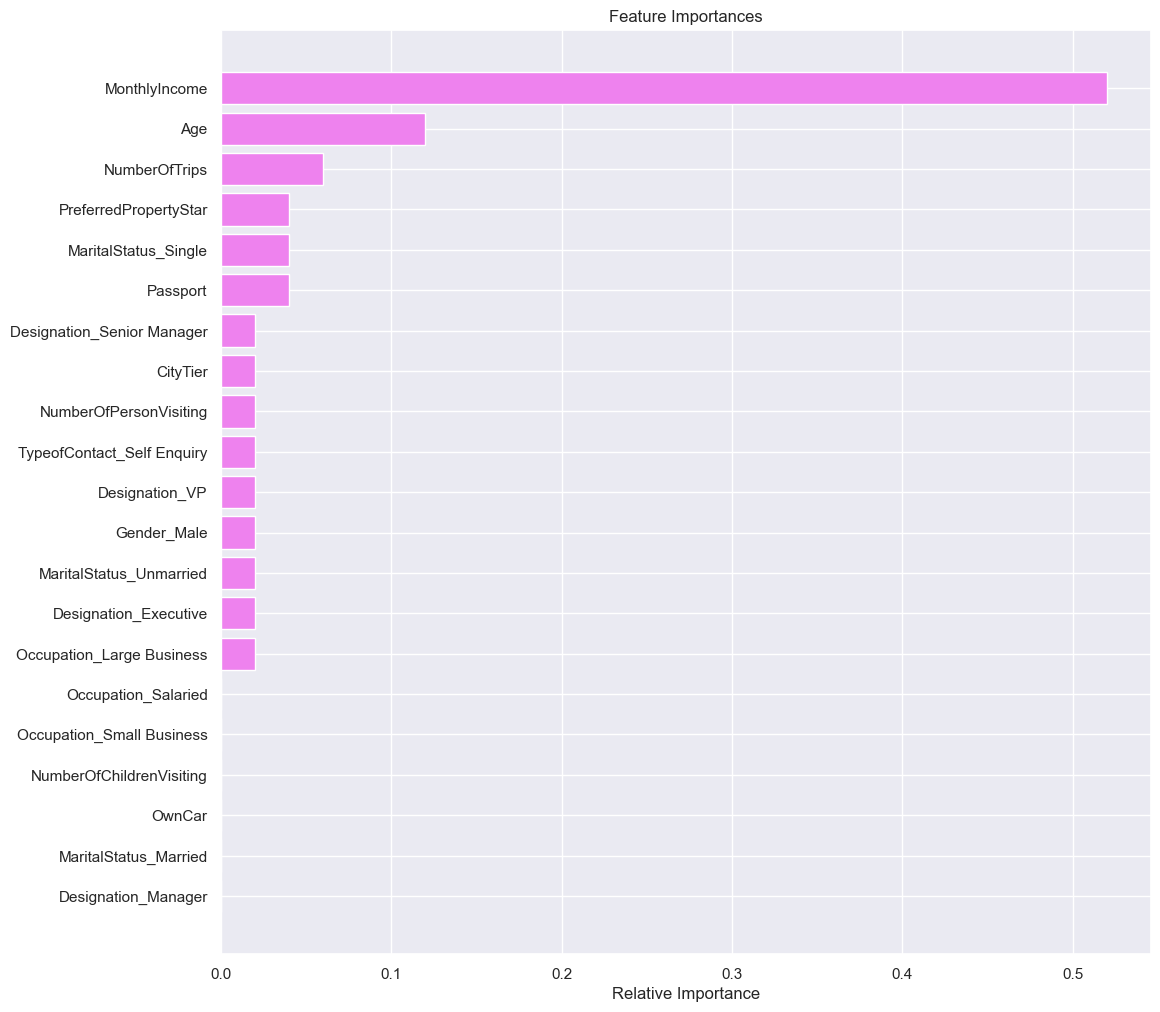

In [151]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier 

In [152]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

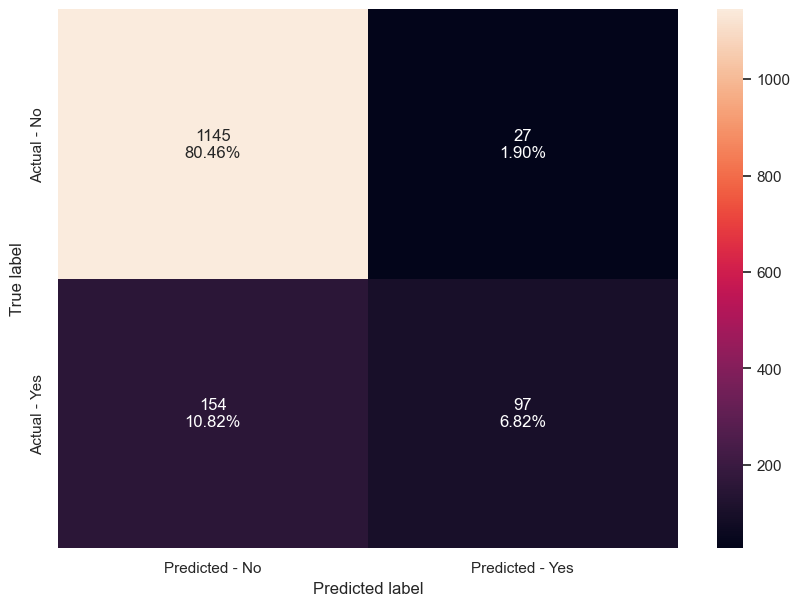

In [153]:
make_confusion_matrix(gbc,y_test)

In [154]:
get_metrics_score(gbc)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.883          0.873         0.460        0.386   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.875           0.782           0.603          0.517

[0.8830620855937311,
 0.8728039353478566,
 0.46021840873634945,
 0.38645418326693226,
 0.8753709198813057,
 0.782258064516129,
 0.6032719836400818,
 0.5173333333333332]

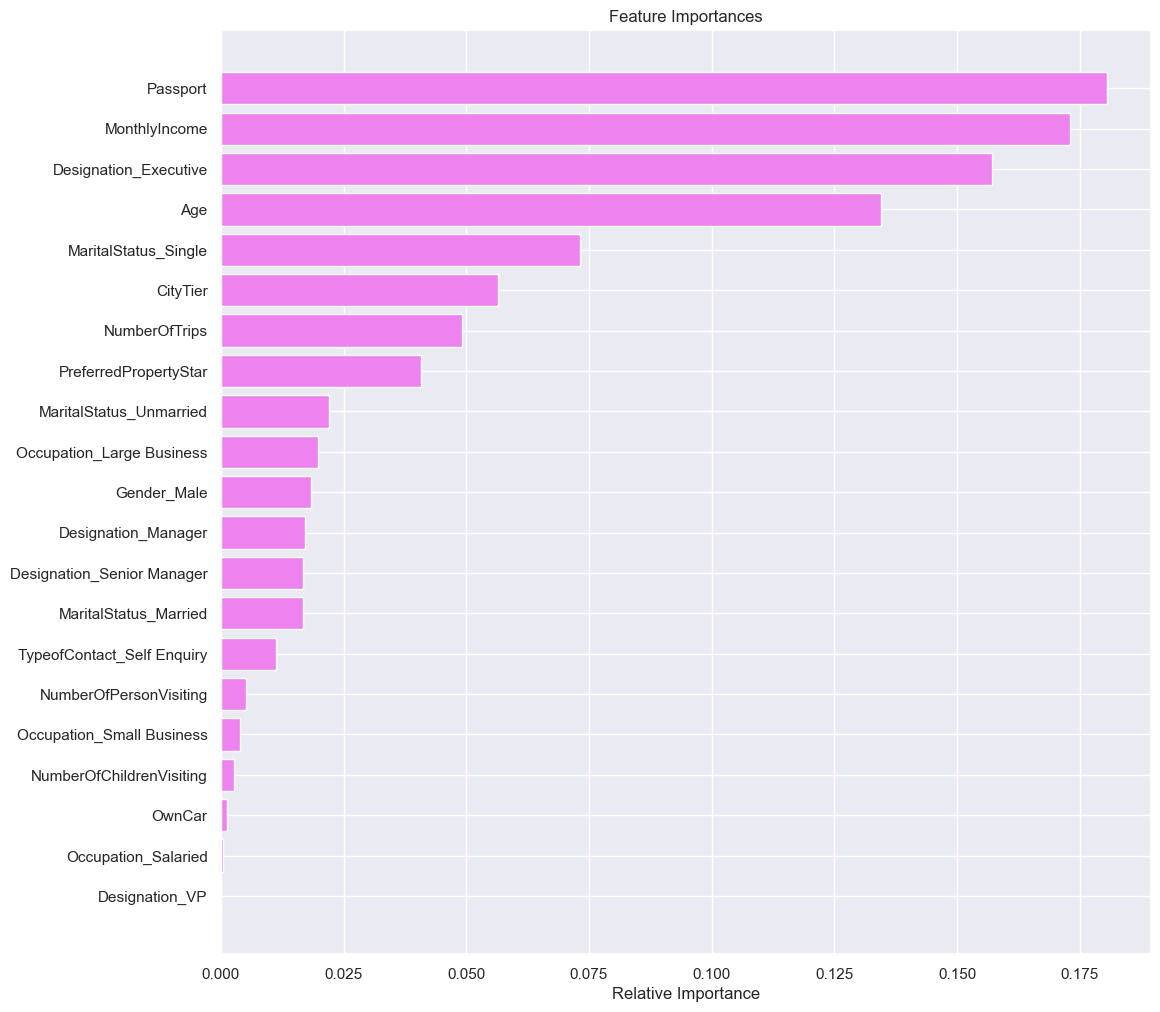

In [155]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

In [156]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

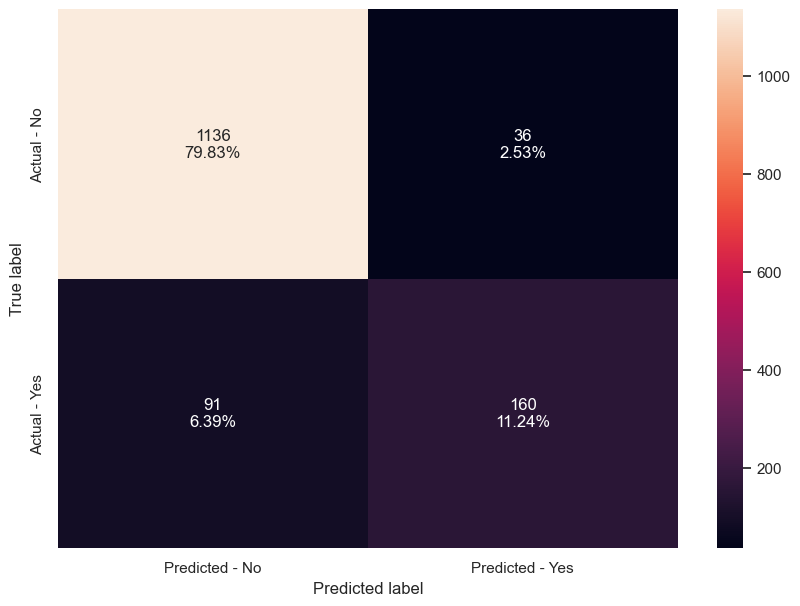

In [157]:
make_confusion_matrix(xgb,y_test)

In [158]:
get_metrics_score(xgb)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.998          0.911         0.989        0.637   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             1.000           0.816           0.995          0.716

[0.9978902953586498,
 0.9107519325368939,
 0.9890795631825273,
 0.6374501992031872,
 1.0,
 0.8163265306122449,
 0.9945098039215686,
 0.7158836689038032]

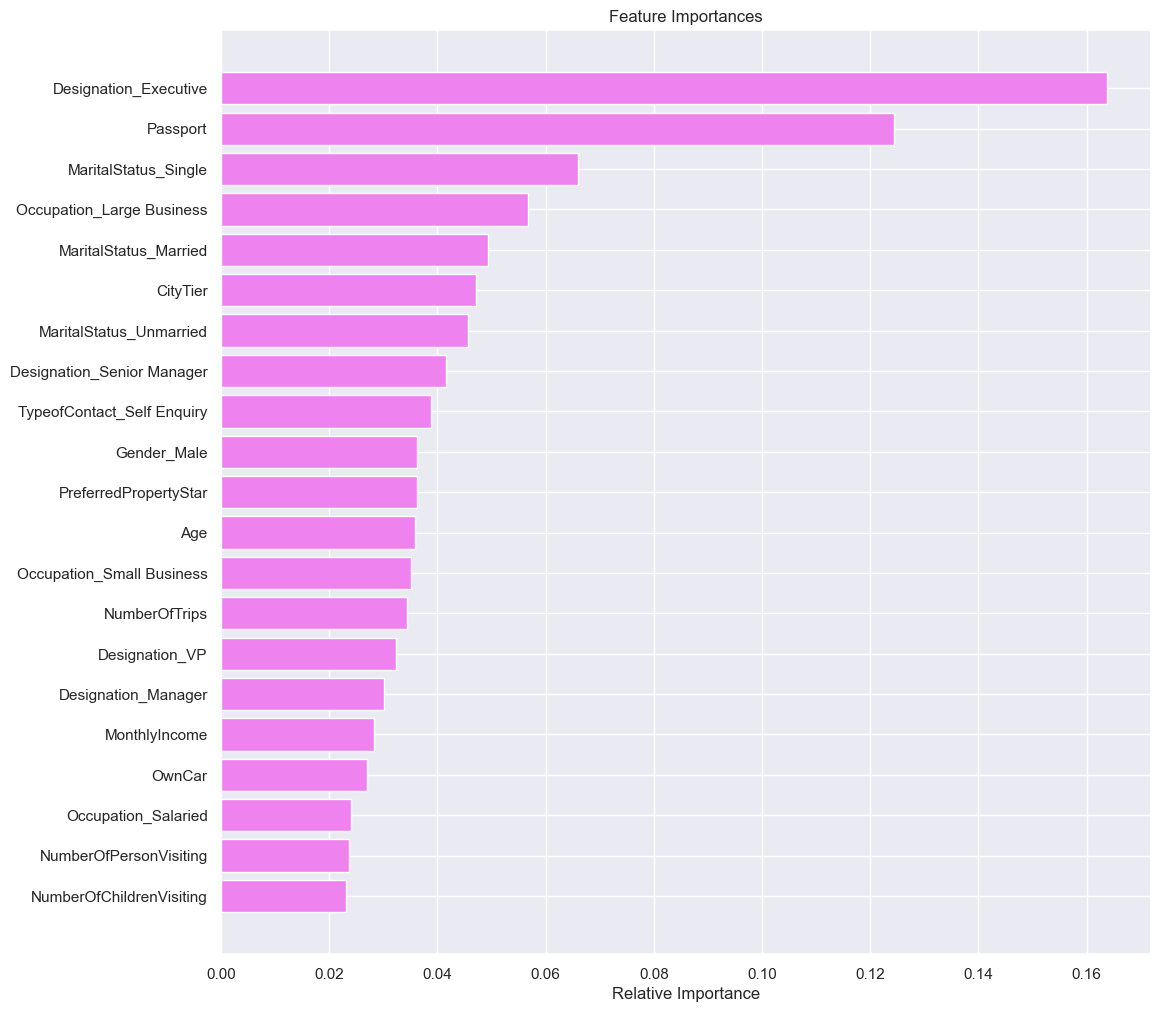

In [159]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning - Ada Boosting Classifier 

In [160]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   n_estimators=100, random_state=1)

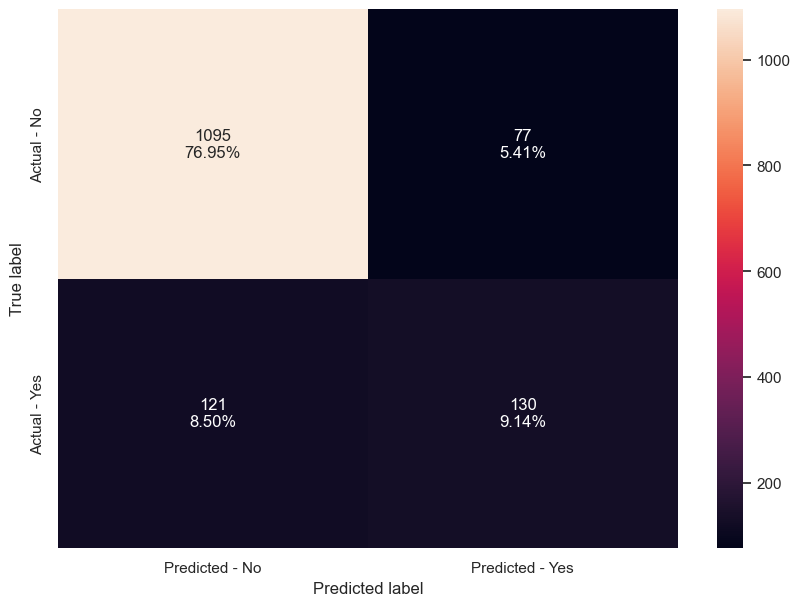

In [161]:
make_confusion_matrix(abc_tuned,y_test)

In [162]:
get_metrics_score(abc_tuned)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.978          0.861         0.913        0.518   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.972           0.628           0.941          0.568

[0.9779987944544907,
 0.8608573436401967,
 0.9126365054602185,
 0.5179282868525896,
 0.9717607973421927,
 0.6280193236714976,
 0.9412711182622688,
 0.5676855895196506]

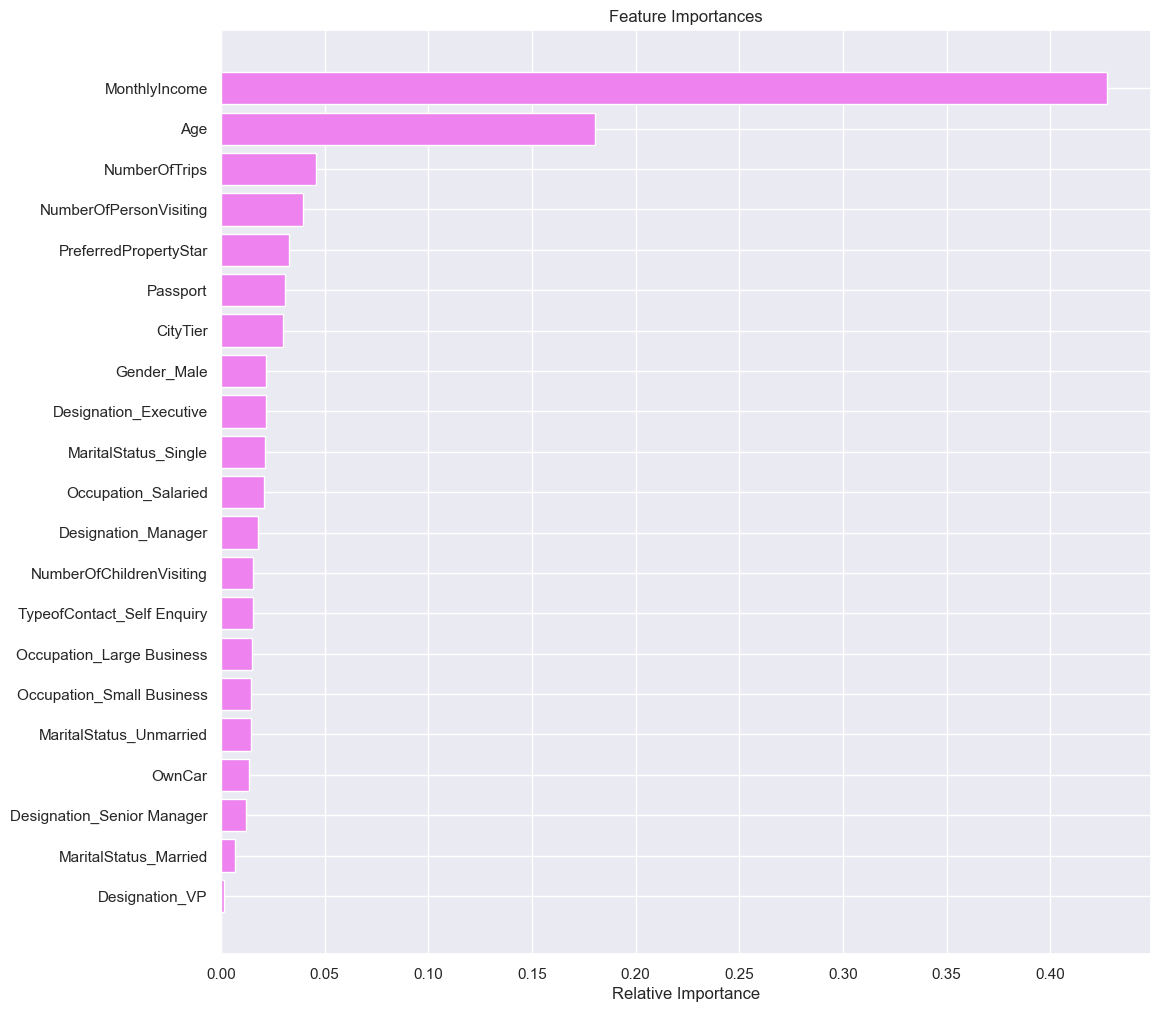

In [163]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning - Gradient Boosting Classifier 


In [164]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

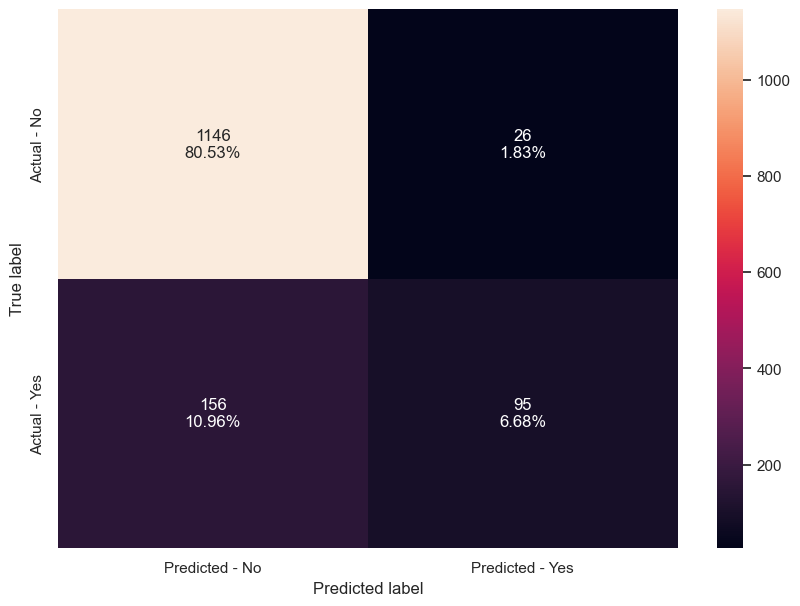

In [165]:
make_confusion_matrix(gbc_init,y_test)

In [166]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.880          0.872         0.445        0.378   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.874           0.785           0.589          0.511

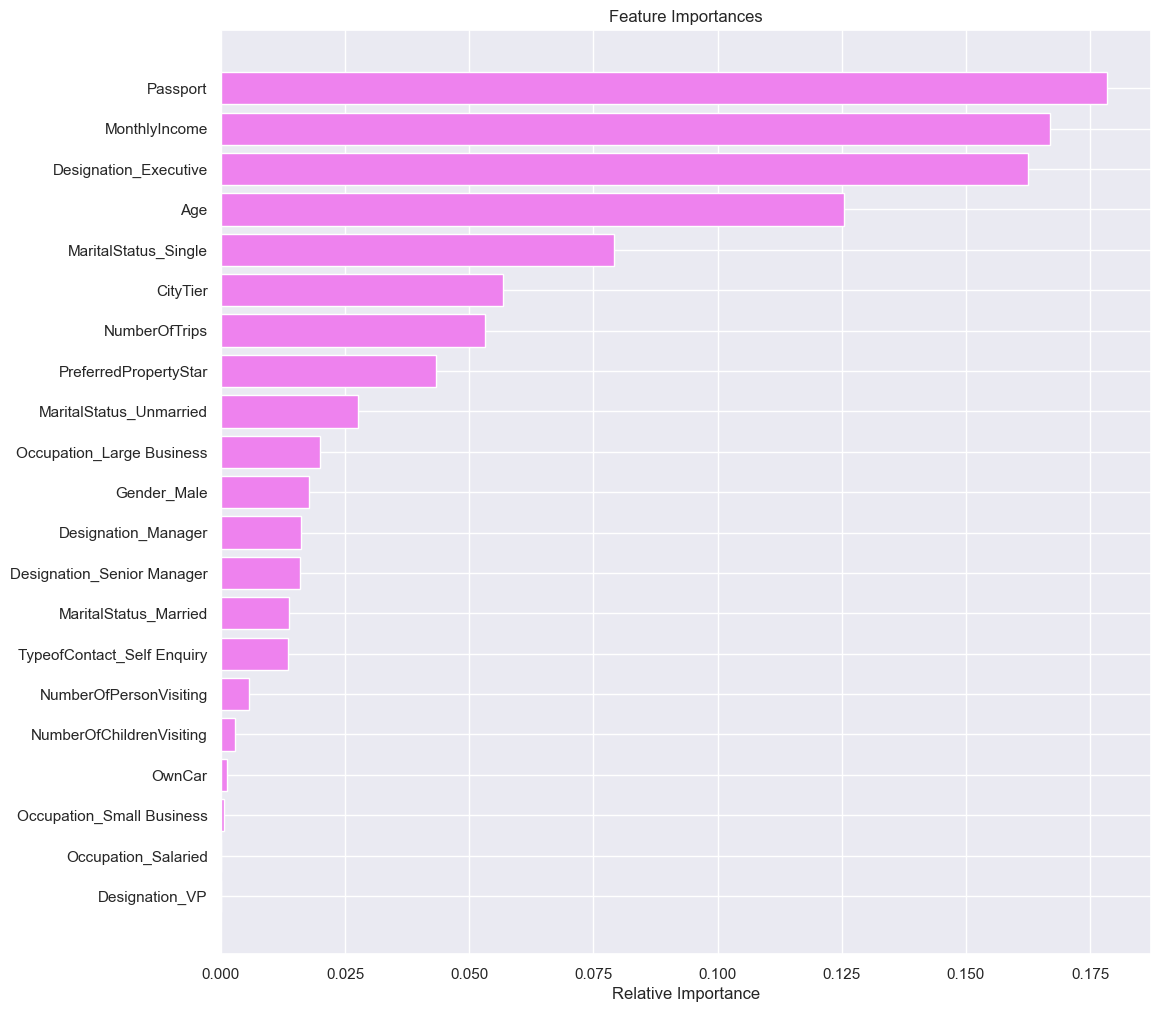

In [167]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [168]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

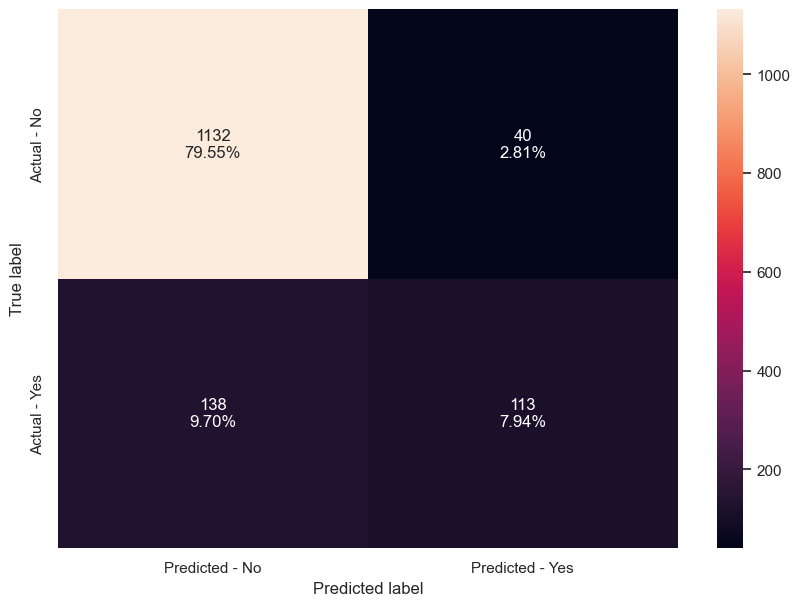

In [169]:
make_confusion_matrix(gbc_tuned,y_test)

In [170]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(gbc_tuned)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score            0.912          0.875         0.601        0.450   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score             0.917           0.739           0.726          0.559

[0.9122965641952984,
 0.8749121574139143,
 0.6006240249609984,
 0.450199203187251,
 0.9166666666666666,
 0.738562091503268,
 0.7257304429783223,
 0.5594059405940593]

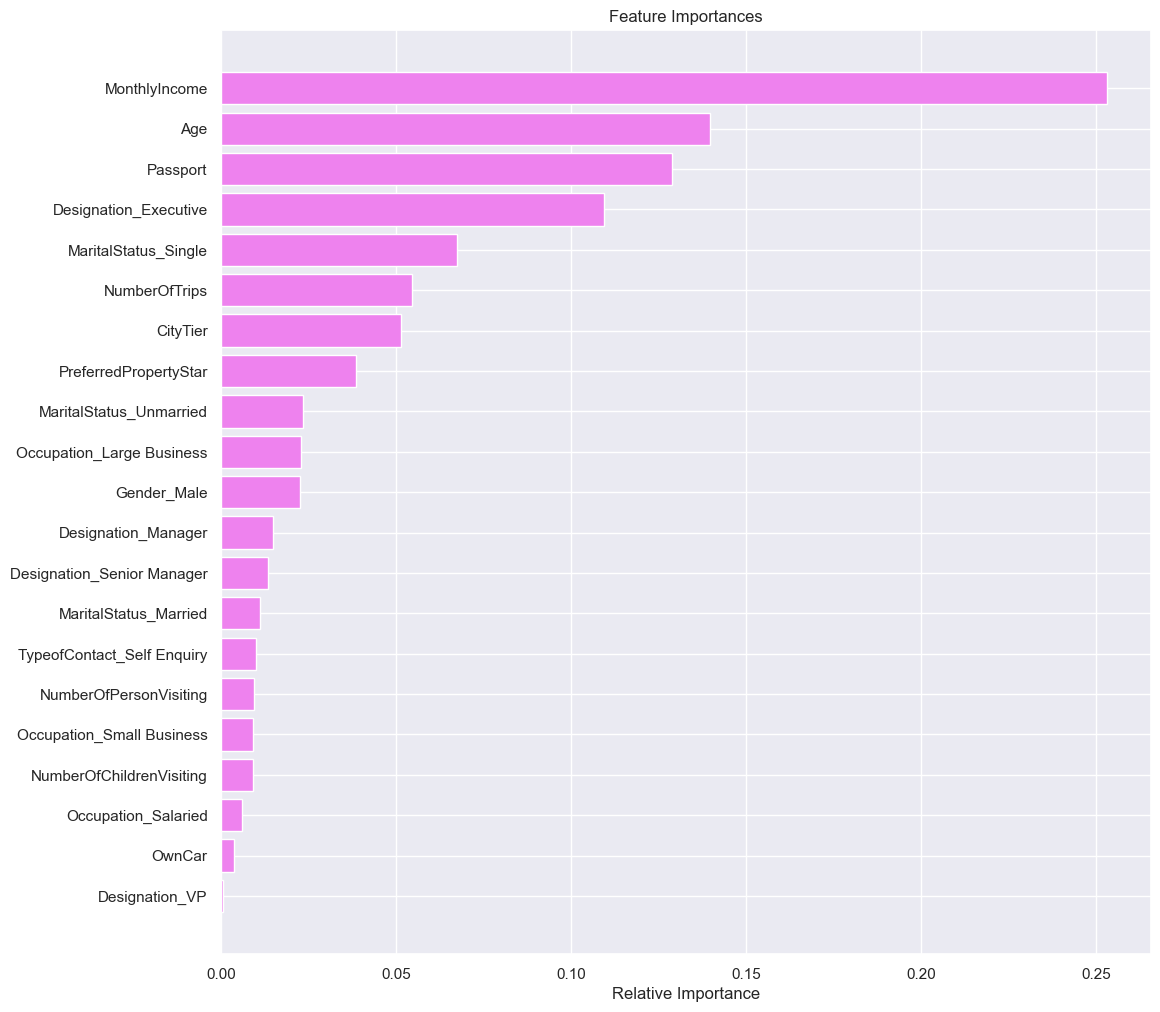

In [171]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning - XG Boost Classifier 

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(xgb_tuned)

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing all models

In [ ]:
# defining list of models
models = [dtree, dtree_tuned, rf, rf_tuned, bagging, bagging_tuned, abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision tree with default paramters',"Decision tree tuned", 'Random forest with default paramters','Random forest tuned','Bagging with default paramters','Bagging tuned','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test, 'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

**Inferences**

* XGBoost tuned has the better recall at 70% of all the 13 classifier models studied. 
* This model is NOT very overfitting as test recall is at 88% and train recall is 70%. 
* XG Boost tuned can de deployed
* Passport is the single most important feature and designation as exceutive and followed by single marital status


### Stacking Model

In [ ]:
estimators=[('Decision Tree tuned' , dtree_tuned), ('Random Forest tuned',rf_tuned),('Ada boosting tuned', abc_tuned),('Gradient boosting tuned', gbc_tuned)]
final_estimator=xgb_tuned

In [ ]:
stacking_classifier=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_classifier.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(stacking_classifier,y_test)

In [ ]:
get_metrics_score(stacking_classifier)

**Inferences**
* Stacking classifier built on Decision tree tuned, Random Forest tuned, Ada boosting tuned, Gradient boosting tuned as estimators and xgb tuned as final estimator is over fitting

## Business Insights

* Upon examining the significance of the features, it was determined that Designation, Passport, Tier City, Martial Status, and Occupation were the most crucial factors. Income also merits consideration, as some other models have deemed it to be of high importance. 

* However, factors such as Gender, the number of children visiting, and car ownership appeared to have minimal impact.

* Most important features that have an impact on Product taken: Desgination, Passport,TierCity,Martialstatus,occupation. 

* Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.

* Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

* Based on EDA ,Factors from customer interaction data which can help in increasing the chances of the customer buying the travel package are:
    Having a higher duration of pitch by salesman to the customer.
    Getting a PitchSatisfactionScore of 3 or 5.
    Having multiple follow ups with the customers.
* Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.
* Mostly Single customers are accpeting a package , reason may be married couples might has kids. 